# Clustering Assignment: Crime Data

Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States

Assualt- Assualt rate in different places of United States

UrbanPop - urban population in different places of United States

Rape - Rape rate in different places of United States


# Introduction

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('crime_data.csv')
data.head()

Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6

In [5]:
data.rename({'Unnamed: 0': 'States'}, axis =1, inplace = True)
data.head(10)

States  Murder  Assault  UrbanPop  Rape
0      Alabama    13.2      236        58  21.2
1       Alaska    10.0      263        48  44.5
2      Arizona     8.1      294        80  31.0
3     Arkansas     8.8      190        50  19.5
4   California     9.0      276        91  40.6
5     Colorado     7.9      204        78  38.7
6  Connecticut     3.3      110        77  11.1
7     Delaware     5.9      238        72  15.8
8      Florida    15.4      335        80  31.9
9      Georgia    17.4      211        60  25.8

# Exploratory Data Analysis

In [6]:
data.describe()

Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [8]:
data.isnull().sum()

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

Therefore, we can say that the present data has no missing values.

In [9]:
data.duplicated().sum()

0

Therefore, there are also not any duplicate values present in the data.

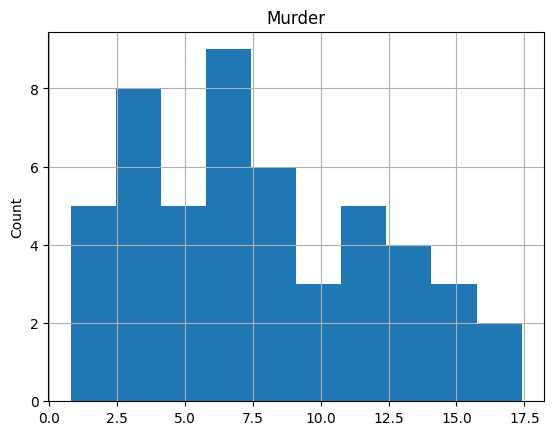

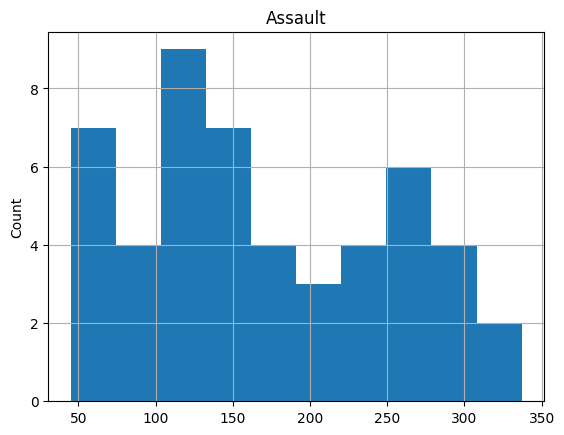

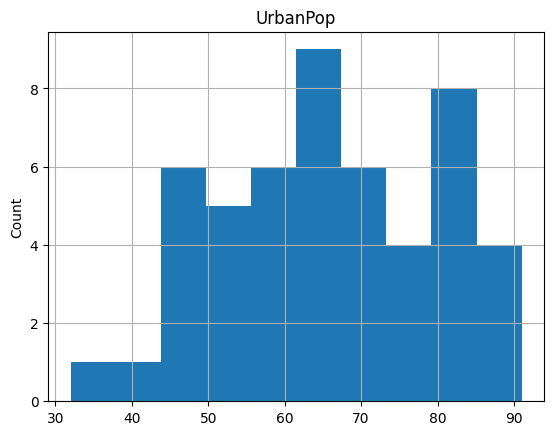

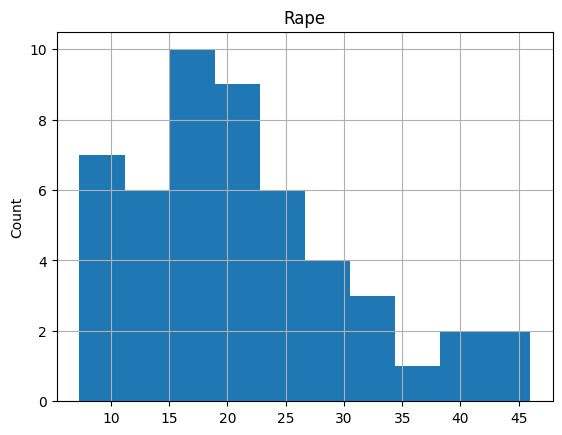

In [25]:
numeric_features = data.select_dtypes(include = ['int64','float64']).columns

for feature in numeric_features:
    data[feature].hist(bins = 10)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

Murder


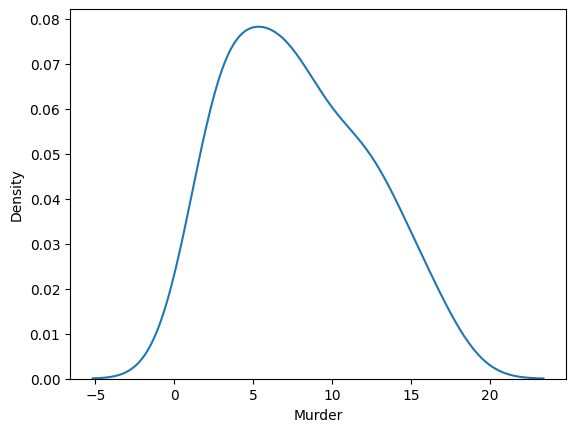

Assault


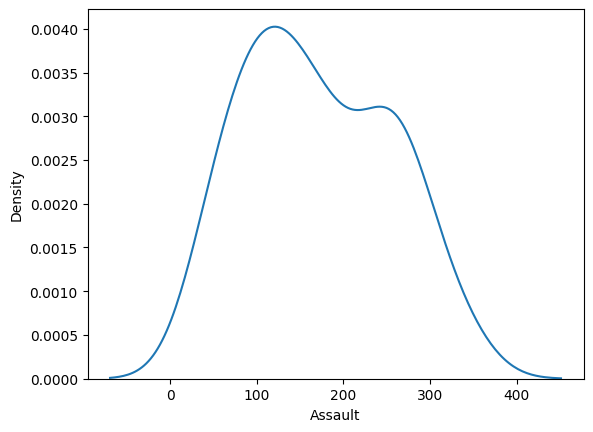

UrbanPop


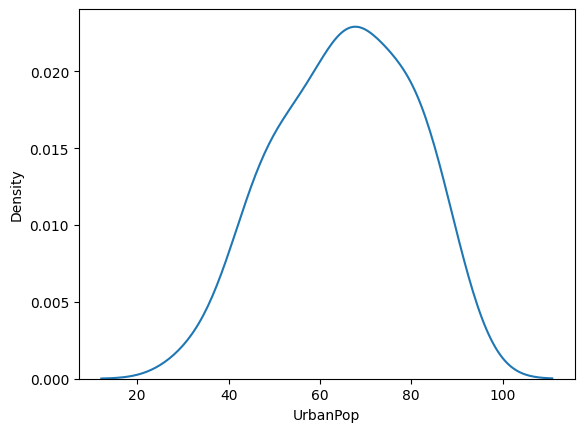

Rape


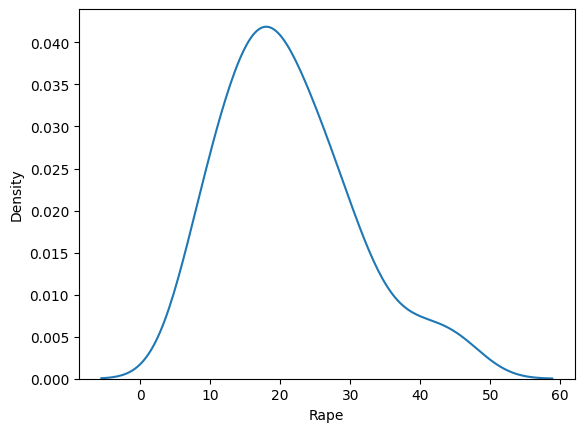

In [26]:
for n in numeric_features:
    print(n)
    sns.kdeplot(data[n])
    plt.show()

## Outliers Detection

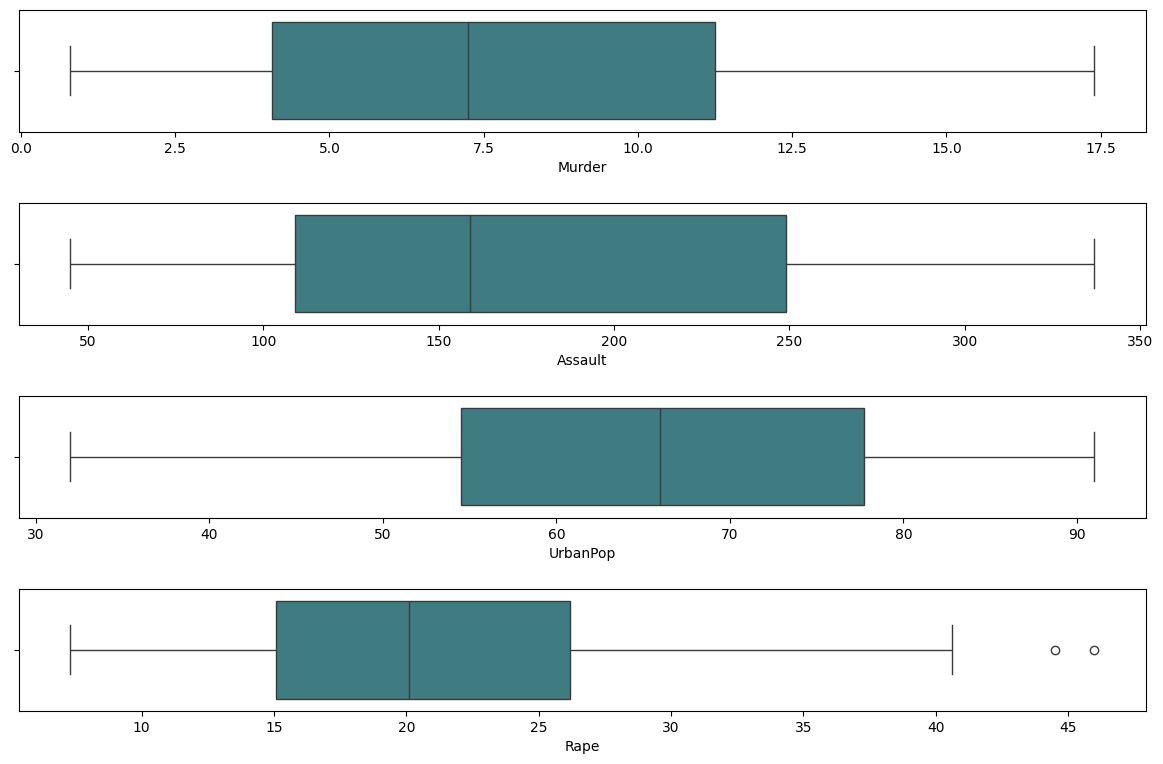

In [27]:
fig, axes = plt.subplots(4,1,figsize = (12,8), sharex = False, sharey = False)

i = 0
for n in numeric_features:
    sns.boxplot(x = n, data = data, palette = 'crest', ax = axes[i])
    i+=1
plt.tight_layout(pad = 2.0)

<Axes: >

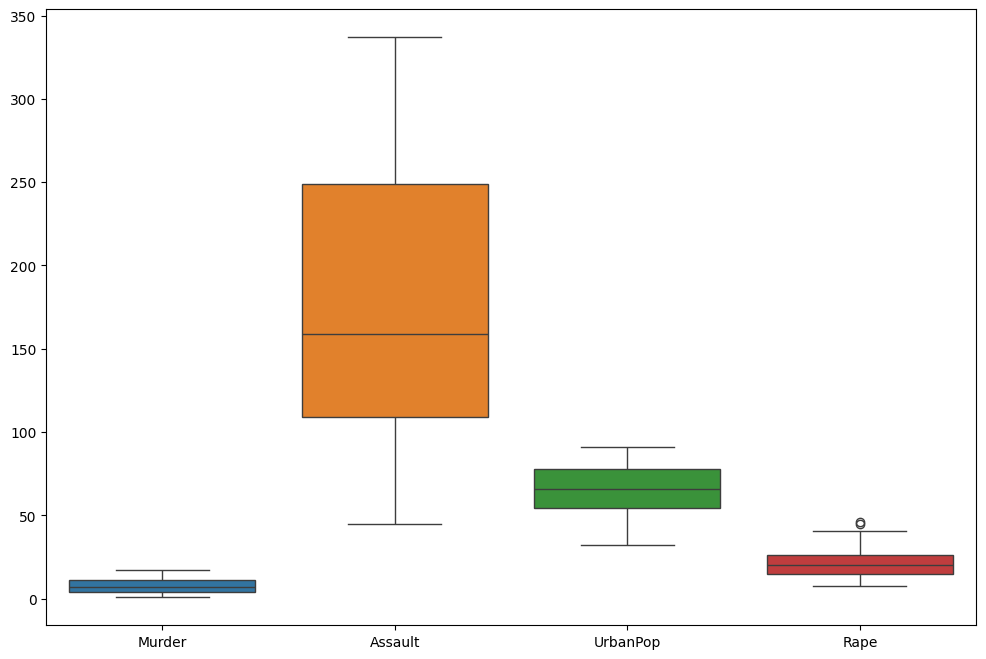

In [28]:
plt.figure(figsize = (12,8))
sns.boxplot(data = data)

<Axes: >

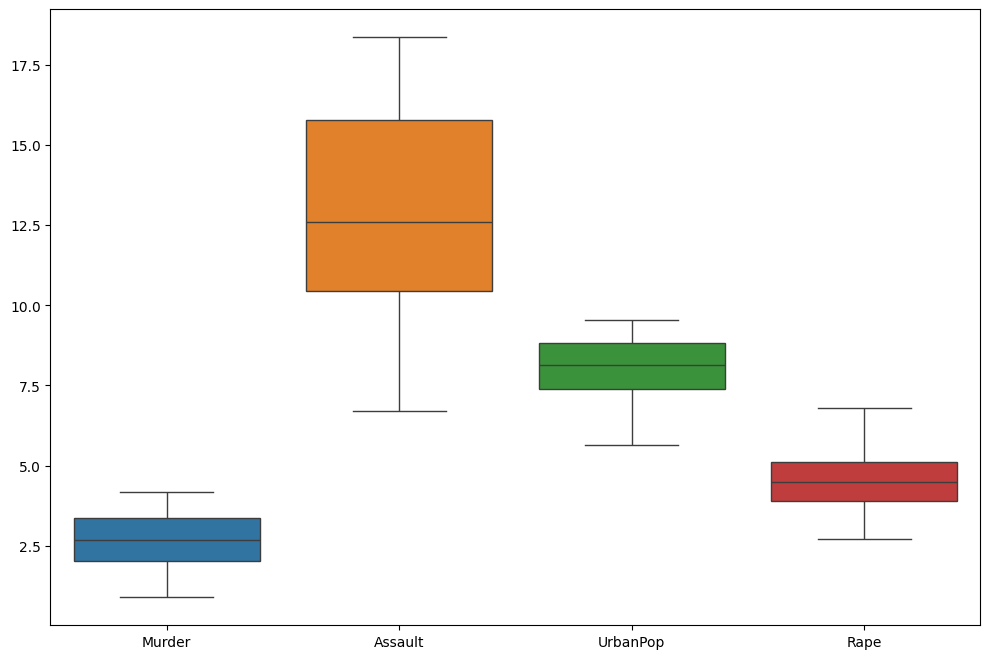

In [31]:
plt.figure(figsize = (12,8))
sns.boxplot(data = np.sqrt(data[numeric_features]))

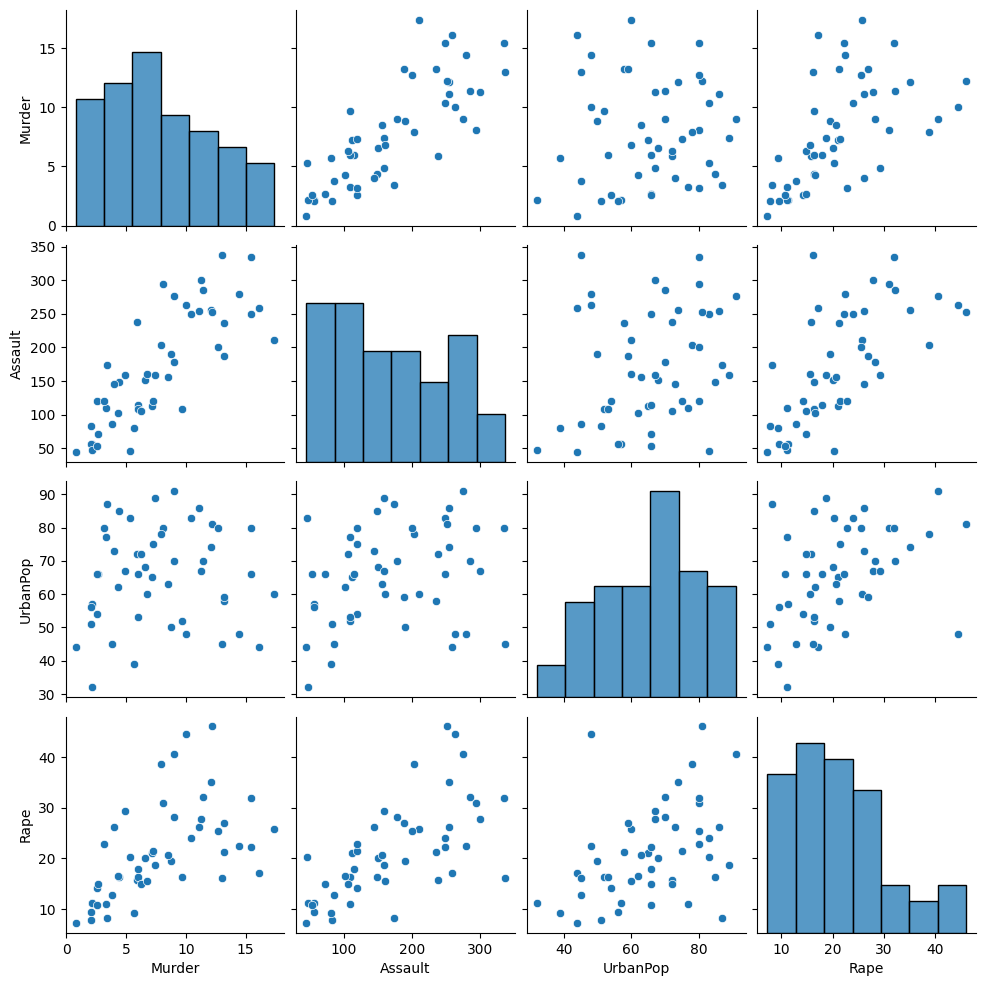

In [32]:
sns.pairplot(data)

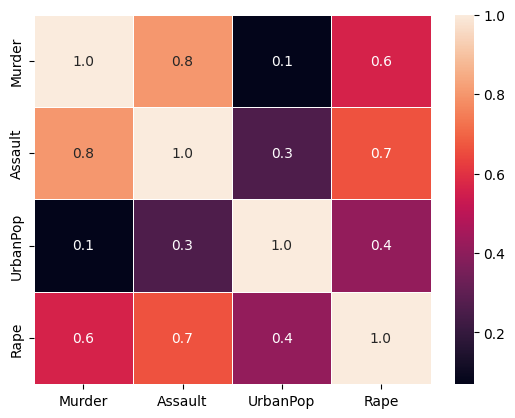

In [34]:
sns.heatmap(data[numeric_features].corr(), annot = True, lw = .5, fmt = '.1f')
plt.show()

## Murder Rate

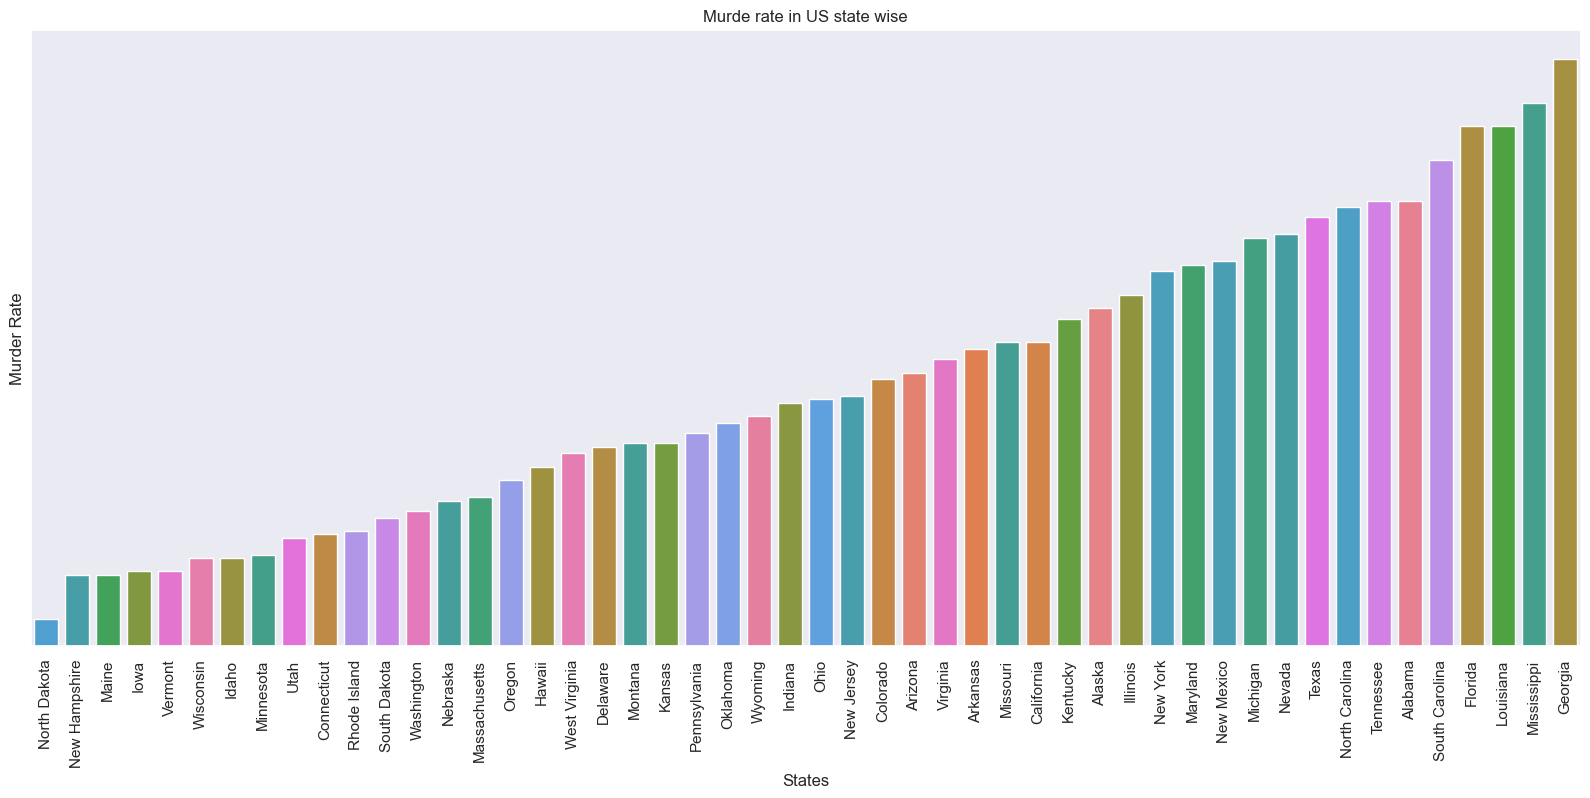

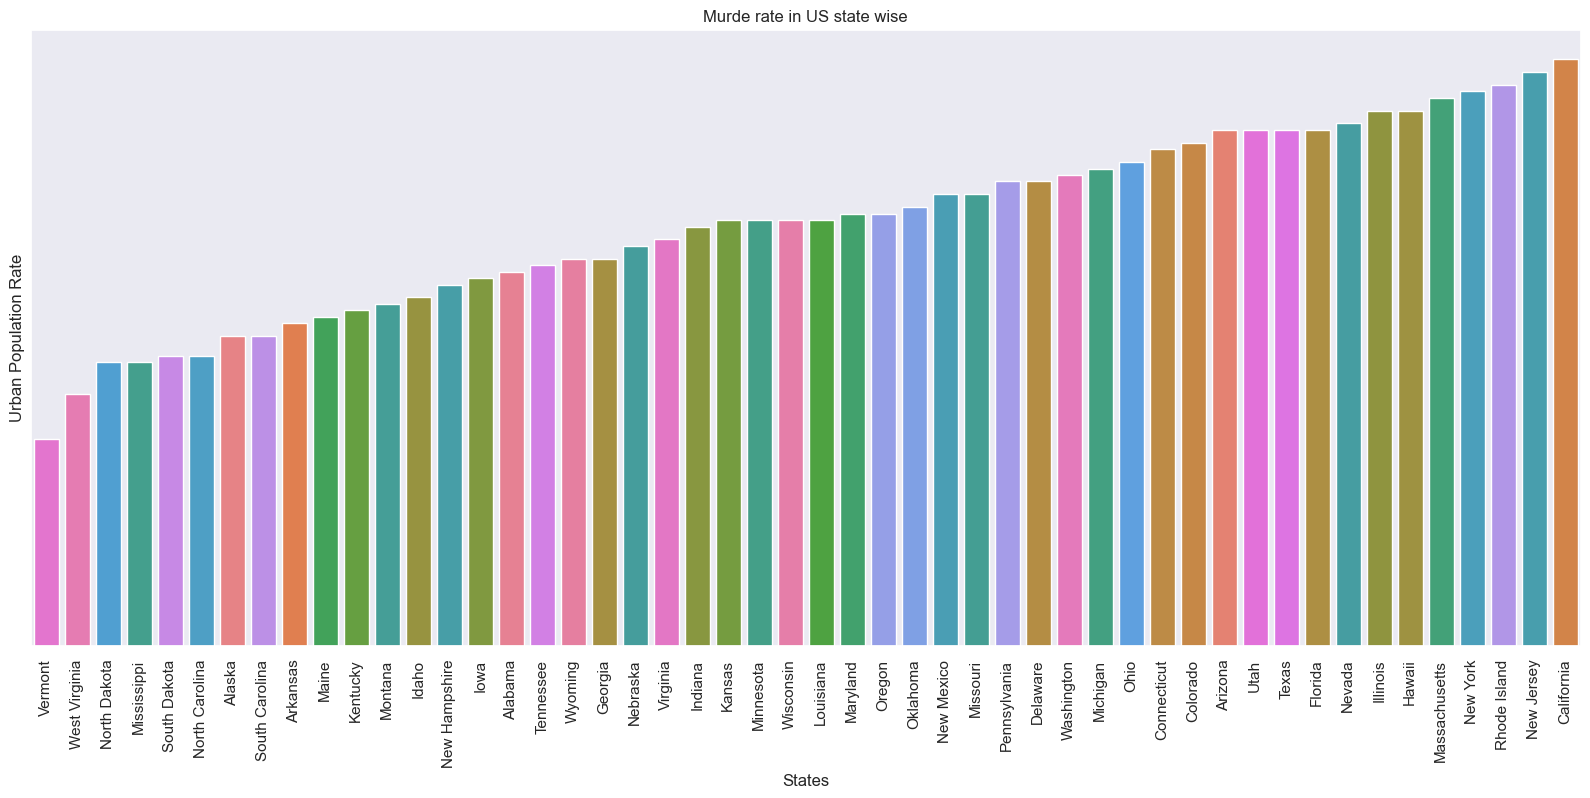

In [47]:
plt.figure(figsize = (20,8))
sns.set(color_codes = True)

sns.barplot(x = 'States',
            y = 'Murder',
            data = data,
            order = data.sort_values('Murder').States,
            hue = 'States')

plt.xlabel('States')
plt.ylabel('Murder Rate')
plt.yticks([])
plt.xticks(rotation = 90)
plt.title('Murde rate in US state wise')
plt.show()

plt.figure(figsize = (20,8))
sns.barplot(x = 'States',
            y = 'UrbanPop',
            data = data,
            order = data.sort_values('UrbanPop').States,
           hue = 'States')

plt.xlabel('States')
plt.ylabel('Urban Population Rate')
plt.yticks([])
plt.xticks(rotation = 90)
plt.title('Murde rate in US state wise')
plt.show()

In [50]:
print('Top 10 states with highest murder rate')
data.sort_values('Murder',ascending = False, ignore_index = True).head(10)

Top 10 states with highest murder rate


States  Murder  Assault  UrbanPop  Rape
0         Georgia    17.4      211        60  25.8
1     Mississippi    16.1      259        44  17.1
2         Florida    15.4      335        80  31.9
3       Louisiana    15.4      249        66  22.2
4  South Carolina    14.4      279        48  22.5
5         Alabama    13.2      236        58  21.2
6       Tennessee    13.2      188        59  26.9
7  North Carolina    13.0      337        45  16.1
8           Texas    12.7      201        80  25.5
9          Nevada    12.2      252        81  46.0

In [57]:
murder = data.sort_values('Murder', ascending = False, ignore_index = True)

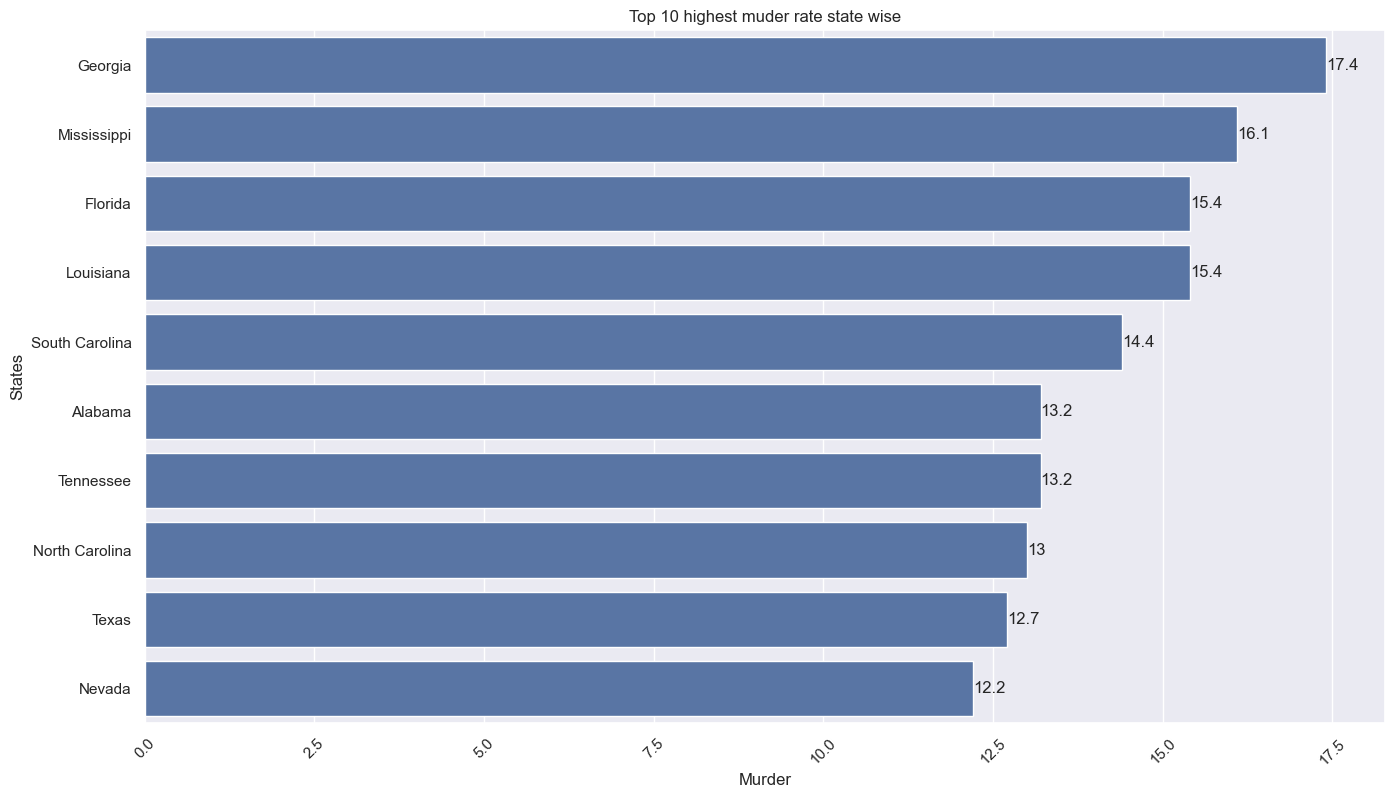

In [58]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = murder.Murder[:10], y = murder.States[:10])
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)
plt.title('Top 10 highest muder rate state wise')
for i in ax.containers:
    ax.bar_label(i,)

In [51]:
print('Top 10 states with lowest murder rate')
data.sort_values('Murder',ascending = True, ignore_index = True).head(10)

Top 10 states with lowest murder rate


States  Murder  Assault  UrbanPop  Rape
0   North Dakota     0.8       45        44   7.3
1  New Hampshire     2.1       57        56   9.5
2          Maine     2.1       83        51   7.8
3           Iowa     2.2       56        57  11.3
4        Vermont     2.2       48        32  11.2
5      Wisconsin     2.6       53        66  10.8
6          Idaho     2.6      120        54  14.2
7      Minnesota     2.7       72        66  14.9
8           Utah     3.2      120        80  22.9
9    Connecticut     3.3      110        77  11.1

In [60]:
murder = data.sort_values('Murder', ascending = True, ignore_index = True)
murder.head()

States  Murder  Assault  UrbanPop  Rape
0   North Dakota     0.8       45        44   7.3
1  New Hampshire     2.1       57        56   9.5
2          Maine     2.1       83        51   7.8
3           Iowa     2.2       56        57  11.3
4        Vermont     2.2       48        32  11.2

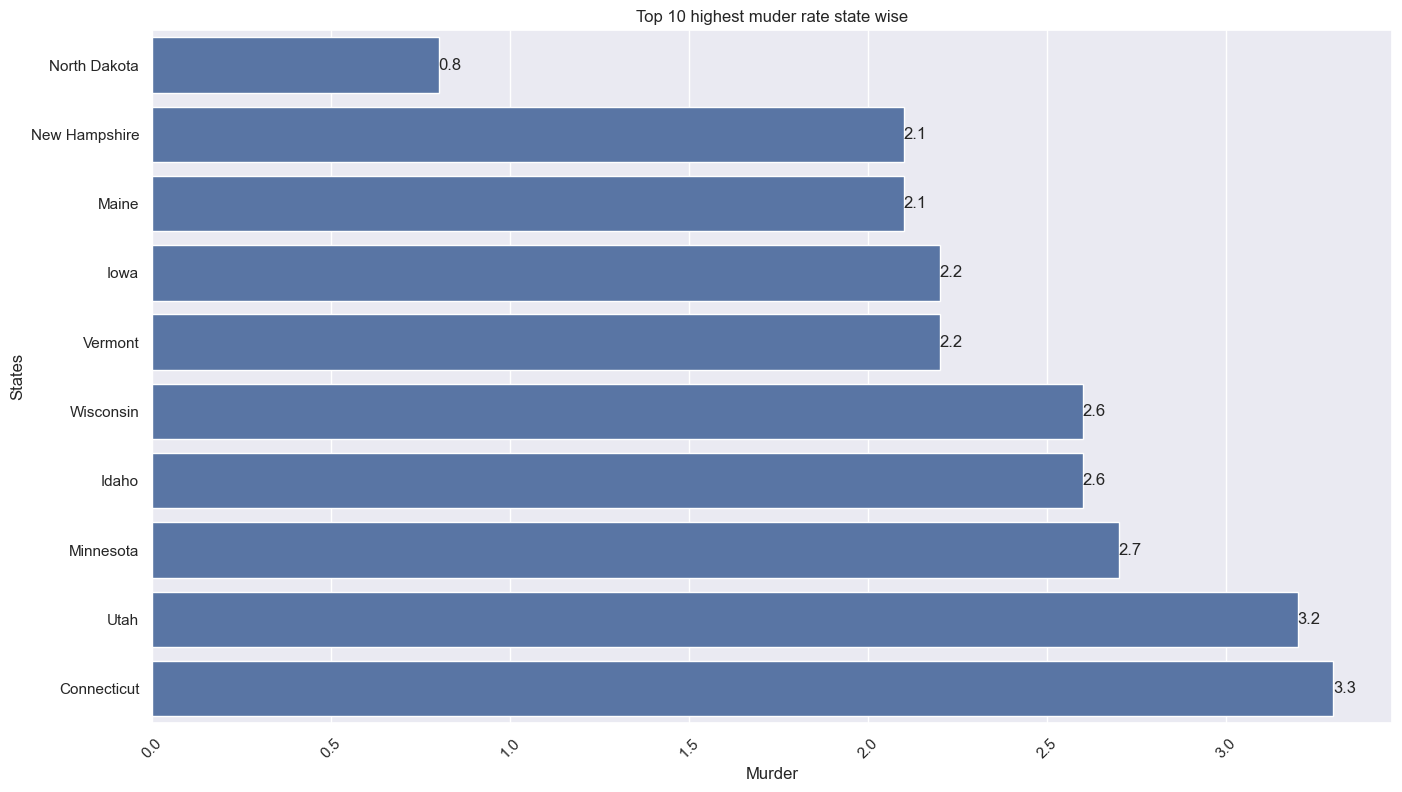

In [61]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = murder.Murder[:10], y = murder.States[:10])
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)
plt.title('Top 10 highest muder rate state wise')
for i in ax.containers:
    ax.bar_label(i,)

## Assault Rate

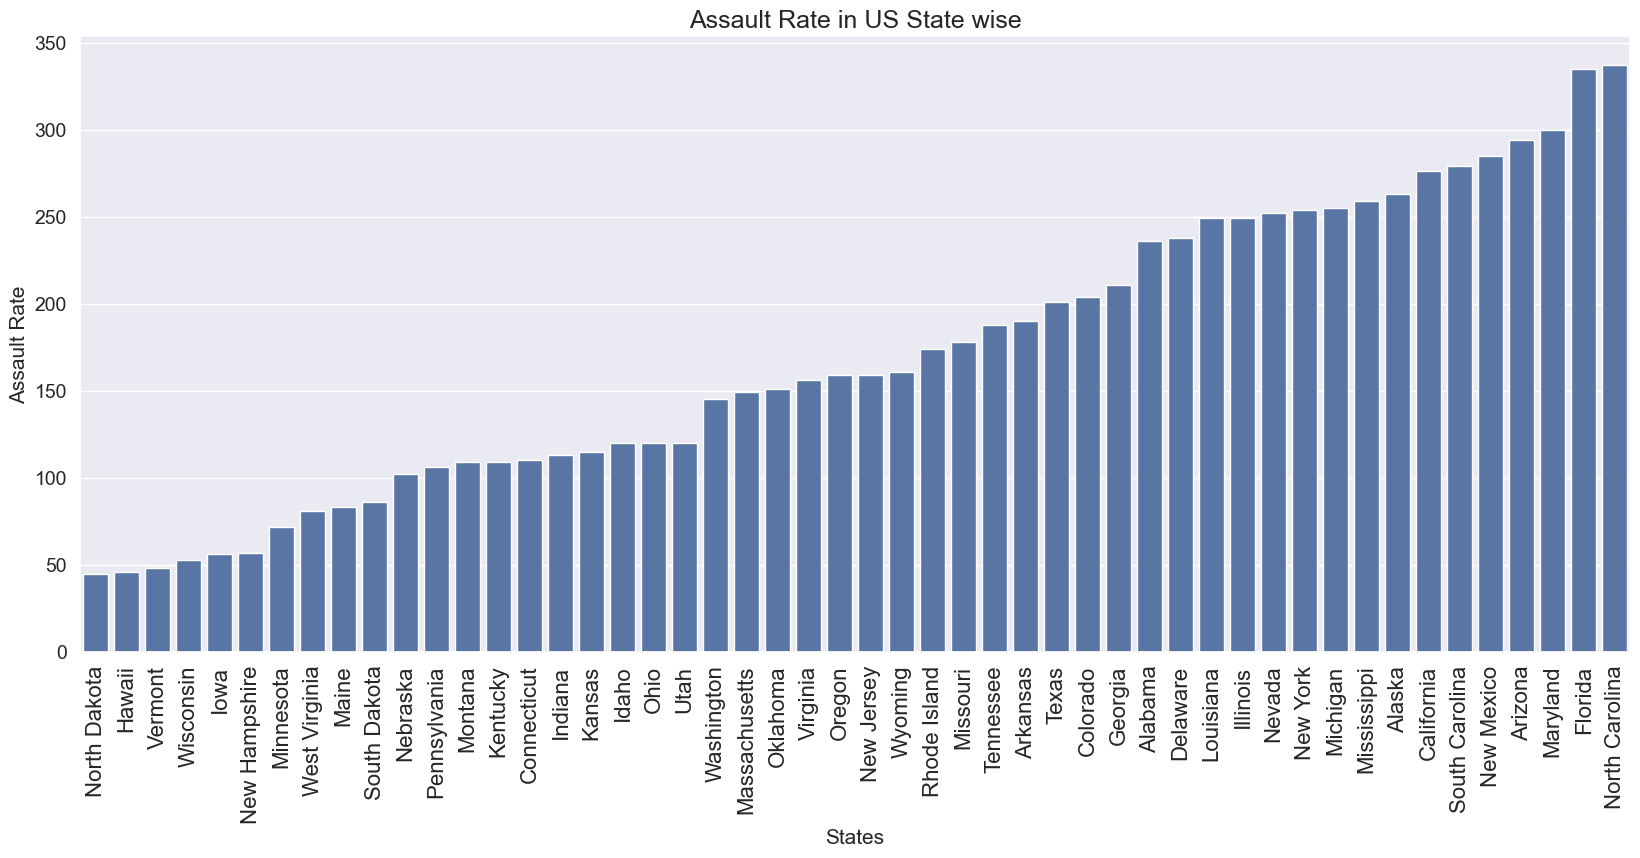

In [62]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='States',
            y="Assault", 
            data=data, 
            order=data.sort_values('Assault').States)
# set labels
plt.xlabel("States", size=15)
plt.ylabel("Assault Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Assault Rate in US State wise", size=18)
plt.show()

In [63]:
print('Top 10 States with Highest Assault Rate')
data.sort_values('Assault',ascending=False, ignore_index=True).head(10)

Top 10 States with Highest Assault Rate


States  Murder  Assault  UrbanPop  Rape
0  North Carolina    13.0      337        45  16.1
1         Florida    15.4      335        80  31.9
2        Maryland    11.3      300        67  27.8
3         Arizona     8.1      294        80  31.0
4      New Mexico    11.4      285        70  32.1
5  South Carolina    14.4      279        48  22.5
6      California     9.0      276        91  40.6
7          Alaska    10.0      263        48  44.5
8     Mississippi    16.1      259        44  17.1
9        Michigan    12.1      255        74  35.1

In [64]:
print('Top 10 States with Lowest Assault Rate')
data.sort_values('Assault',ascending=True, ignore_index=True).head(10)

Top 10 States with Lowest Assault Rate


States  Murder  Assault  UrbanPop  Rape
0   North Dakota     0.8       45        44   7.3
1         Hawaii     5.3       46        83  20.2
2        Vermont     2.2       48        32  11.2
3      Wisconsin     2.6       53        66  10.8
4           Iowa     2.2       56        57  11.3
5  New Hampshire     2.1       57        56   9.5
6      Minnesota     2.7       72        66  14.9
7  West Virginia     5.7       81        39   9.3
8          Maine     2.1       83        51   7.8
9   South Dakota     3.8       86        45  12.8

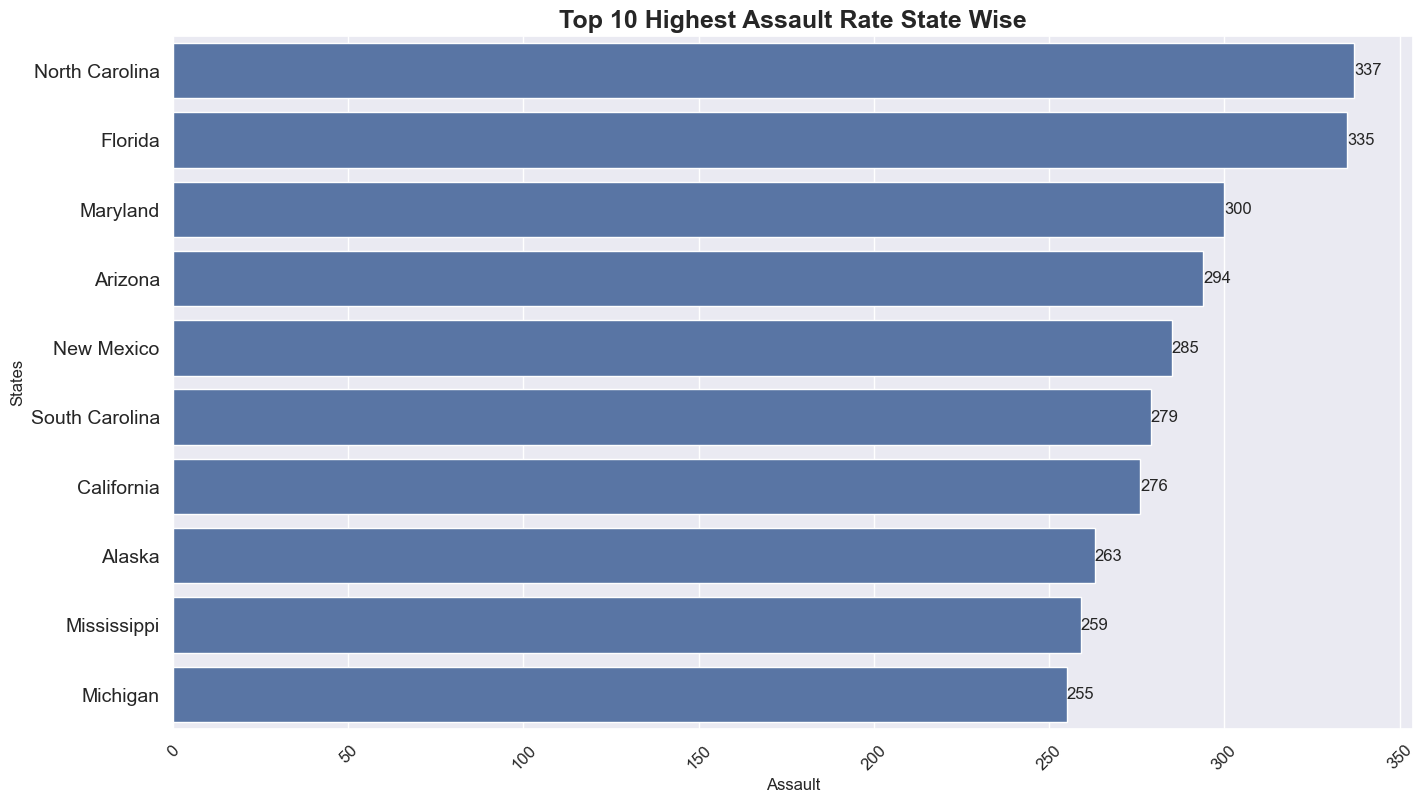

In [65]:
Assault = data.sort_values('Assault', ascending = False)

plt.figure(figsize = (16,9))
ax = sns.barplot(x = Assault.Assault[:10], y = Assault.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Highest Assault Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

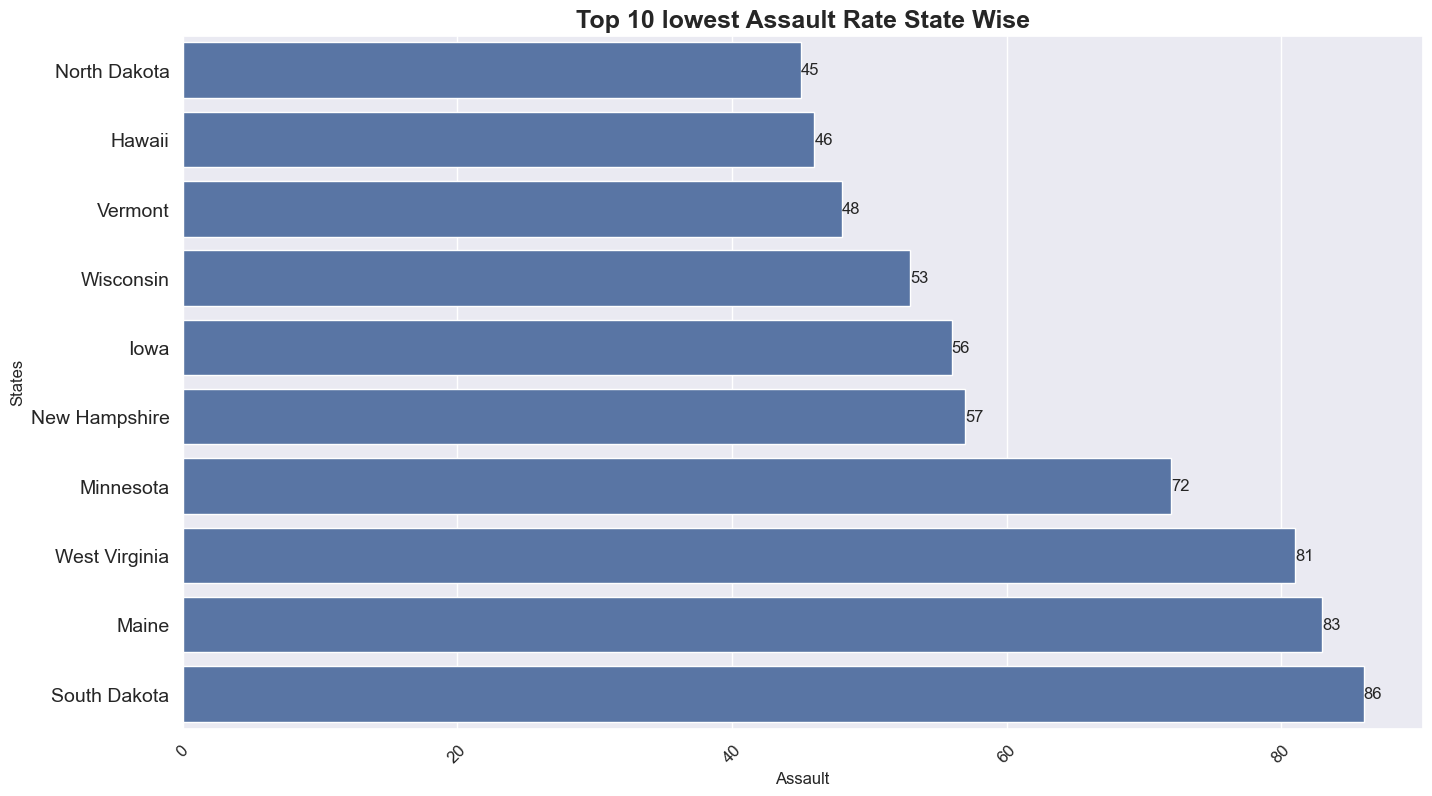

In [66]:
Assault = data.sort_values('Assault', ascending = True)

plt.figure(figsize = (16,9))
ax = sns.barplot(x = Assault.Assault[:10], y = Assault.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 lowest Assault Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

## Rape Rate

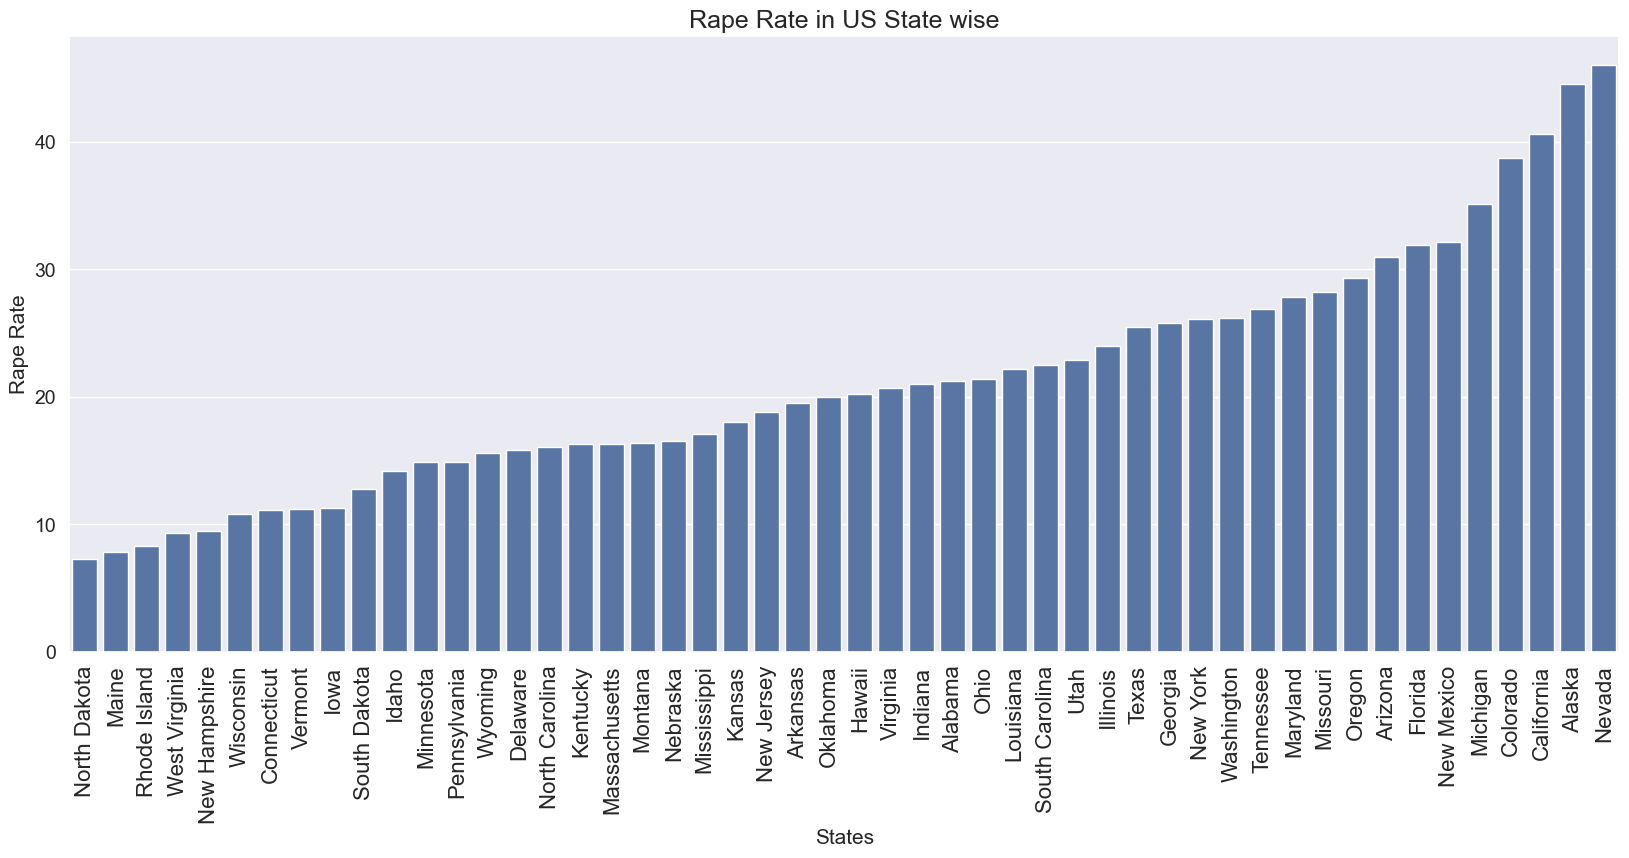

In [67]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='States',
            y="Rape", 
            data=data, 
            order=data.sort_values('Rape').States)
# set labels
plt.xlabel("States", size=15)
plt.ylabel("Rape Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Rape Rate in US State wise", size=18)
plt.show()

In [68]:
print('Top 10 States with Highest Rape Rate')
data.sort_values('Rape',ascending=False, ignore_index=True).head(10)

Top 10 States with Highest Rape Rate


States  Murder  Assault  UrbanPop  Rape
0      Nevada    12.2      252        81  46.0
1      Alaska    10.0      263        48  44.5
2  California     9.0      276        91  40.6
3    Colorado     7.9      204        78  38.7
4    Michigan    12.1      255        74  35.1
5  New Mexico    11.4      285        70  32.1
6     Florida    15.4      335        80  31.9
7     Arizona     8.1      294        80  31.0
8      Oregon     4.9      159        67  29.3
9    Missouri     9.0      178        70  28.2

In [69]:
print('Top 10 States with Lowest Rape Rate')
data.sort_values('Rape',ascending=True, ignore_index=True).head(10)

Top 10 States with Lowest Rape Rate


States  Murder  Assault  UrbanPop  Rape
0   North Dakota     0.8       45        44   7.3
1          Maine     2.1       83        51   7.8
2   Rhode Island     3.4      174        87   8.3
3  West Virginia     5.7       81        39   9.3
4  New Hampshire     2.1       57        56   9.5
5      Wisconsin     2.6       53        66  10.8
6    Connecticut     3.3      110        77  11.1
7        Vermont     2.2       48        32  11.2
8           Iowa     2.2       56        57  11.3
9   South Dakota     3.8       86        45  12.8

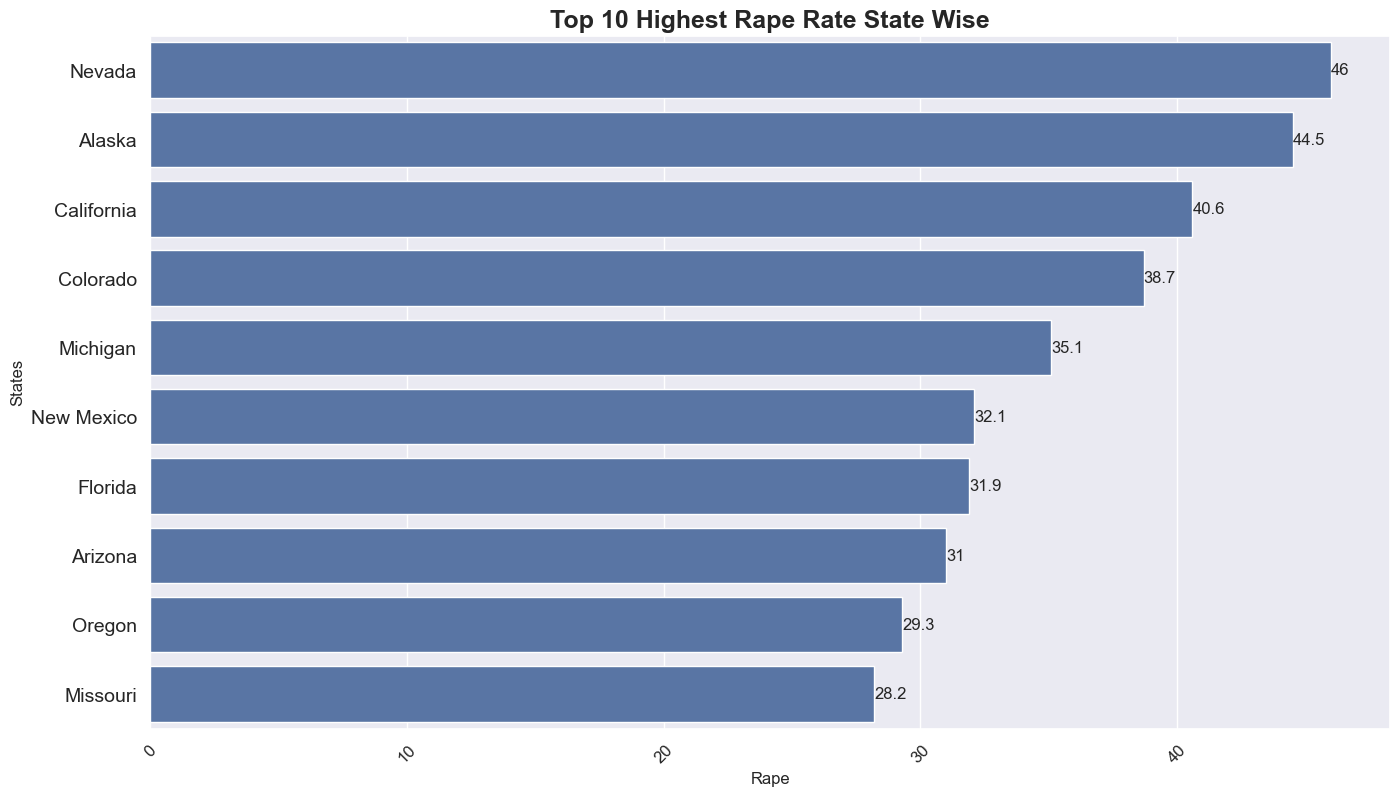

In [70]:
Rape = data.sort_values('Rape', ascending = False)

plt.figure(figsize = (16,9))
ax = sns.barplot(x = Rape.Rape[:10], y = Rape.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Highest Rape Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

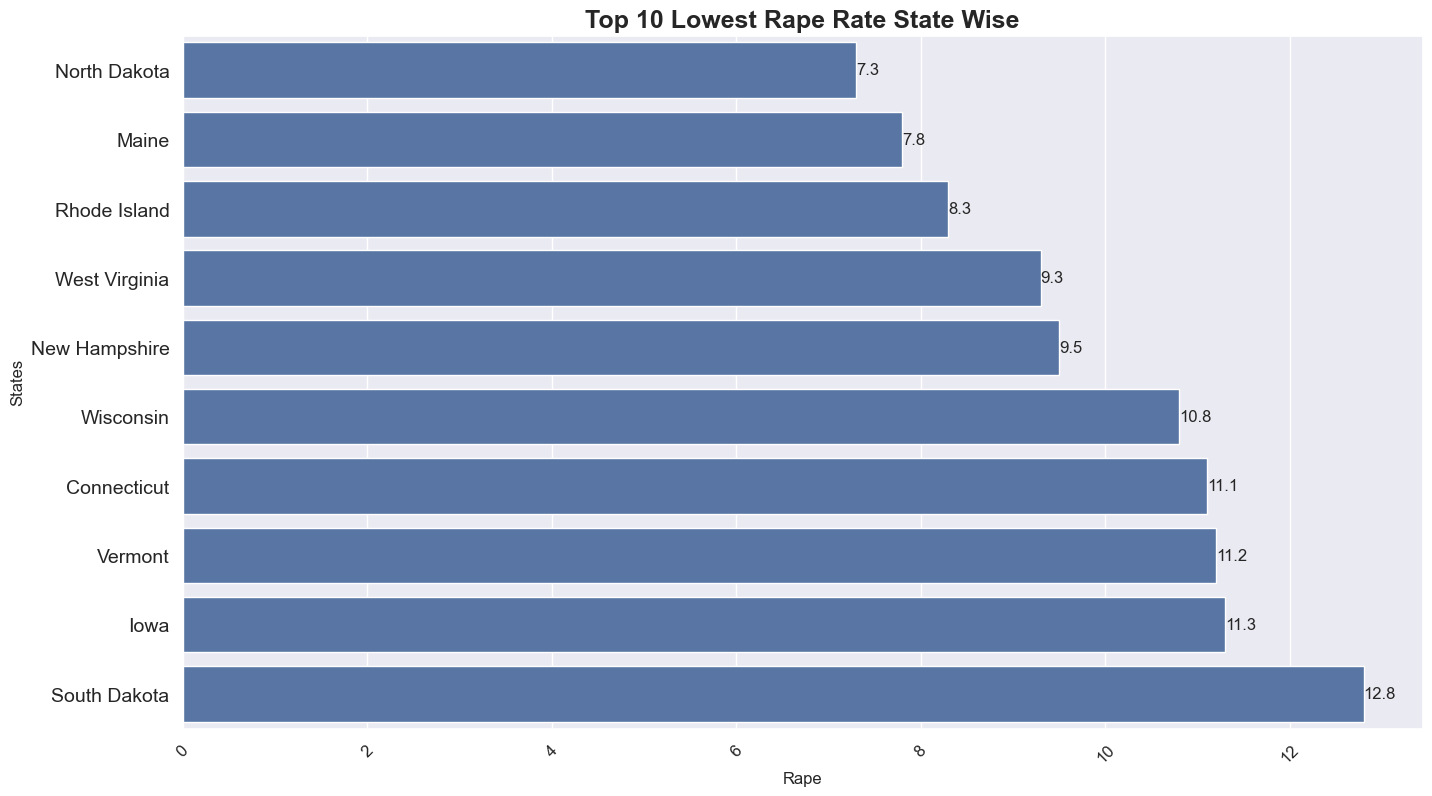

In [71]:
Rape = data.sort_values('Rape', ascending = True)

plt.figure(figsize = (16,9))
ax = sns.barplot(x = Rape.Rape[:10], y = Rape.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Lowest Rape Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

## Urban Population Rate

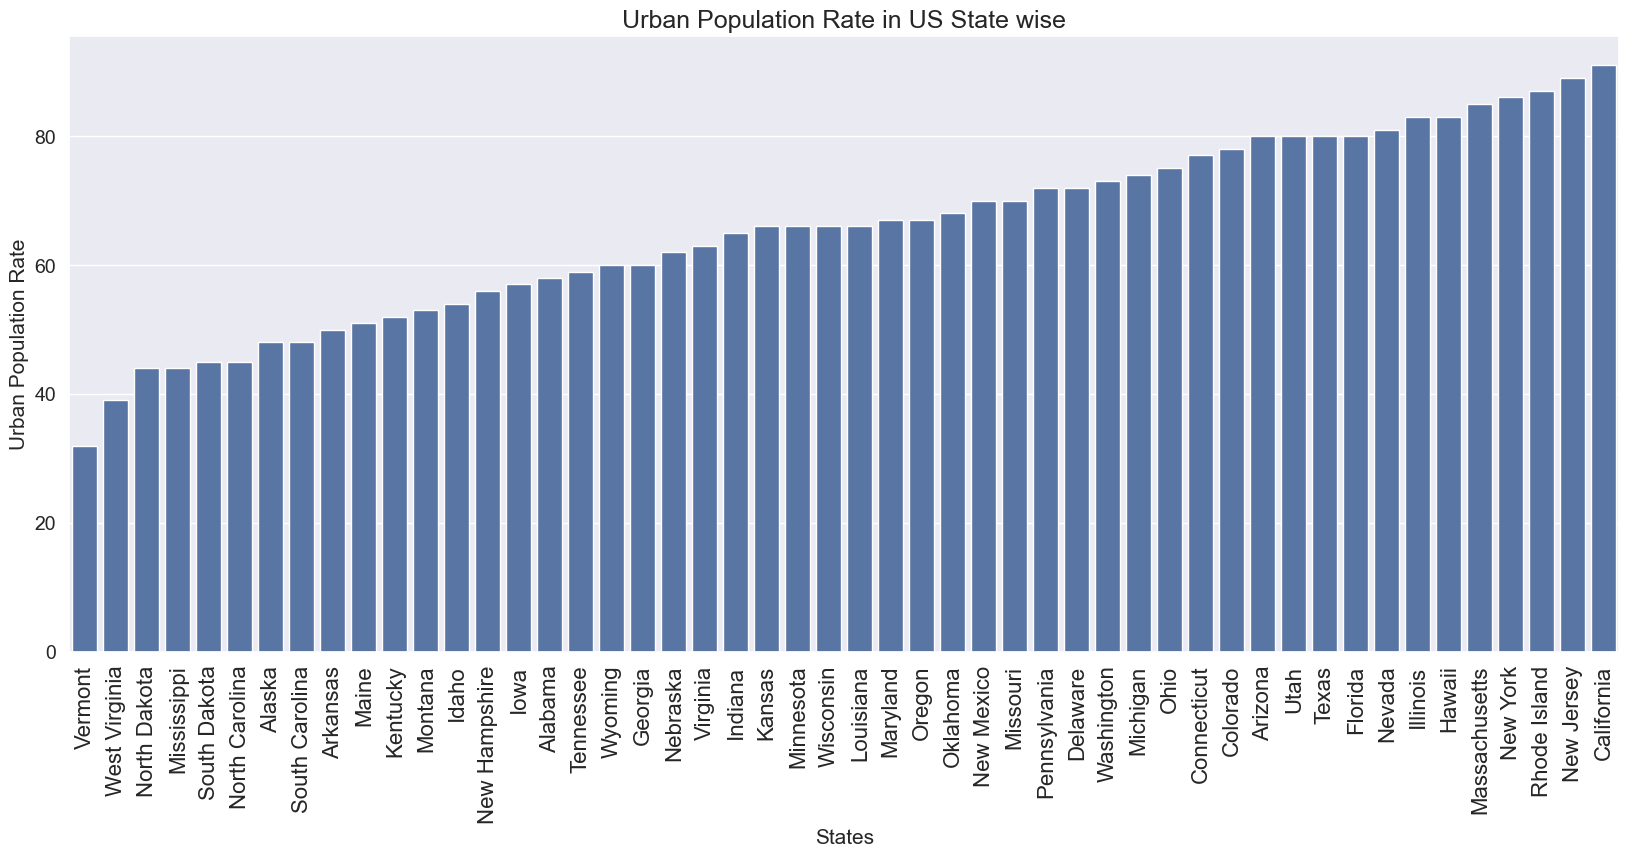

In [72]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='States',
            y="UrbanPop", 
            data=data, 
            order=data.sort_values('UrbanPop').States)
# set labels
plt.xlabel("States", size=15)
plt.ylabel("Urban Population Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Urban Population Rate in US State wise", size=18)
plt.show()

In [73]:
print('Top 10 States with Highest Urban Population Rate')
data.sort_values('UrbanPop',ascending=False, ignore_index=True).head(10)

Top 10 States with Highest Urban Population Rate


States  Murder  Assault  UrbanPop  Rape
0     California     9.0      276        91  40.6
1     New Jersey     7.4      159        89  18.8
2   Rhode Island     3.4      174        87   8.3
3       New York    11.1      254        86  26.1
4  Massachusetts     4.4      149        85  16.3
5         Hawaii     5.3       46        83  20.2
6       Illinois    10.4      249        83  24.0
7         Nevada    12.2      252        81  46.0
8          Texas    12.7      201        80  25.5
9        Arizona     8.1      294        80  31.0

In [74]:
print('Top 10 States with Lowest Urban Population Rate')
data.sort_values('UrbanPop',ascending=True, ignore_index=True).head(10)

Top 10 States with Lowest Urban Population Rate


States  Murder  Assault  UrbanPop  Rape
0         Vermont     2.2       48        32  11.2
1   West Virginia     5.7       81        39   9.3
2    North Dakota     0.8       45        44   7.3
3     Mississippi    16.1      259        44  17.1
4    South Dakota     3.8       86        45  12.8
5  North Carolina    13.0      337        45  16.1
6          Alaska    10.0      263        48  44.5
7  South Carolina    14.4      279        48  22.5
8        Arkansas     8.8      190        50  19.5
9           Maine     2.1       83        51   7.8

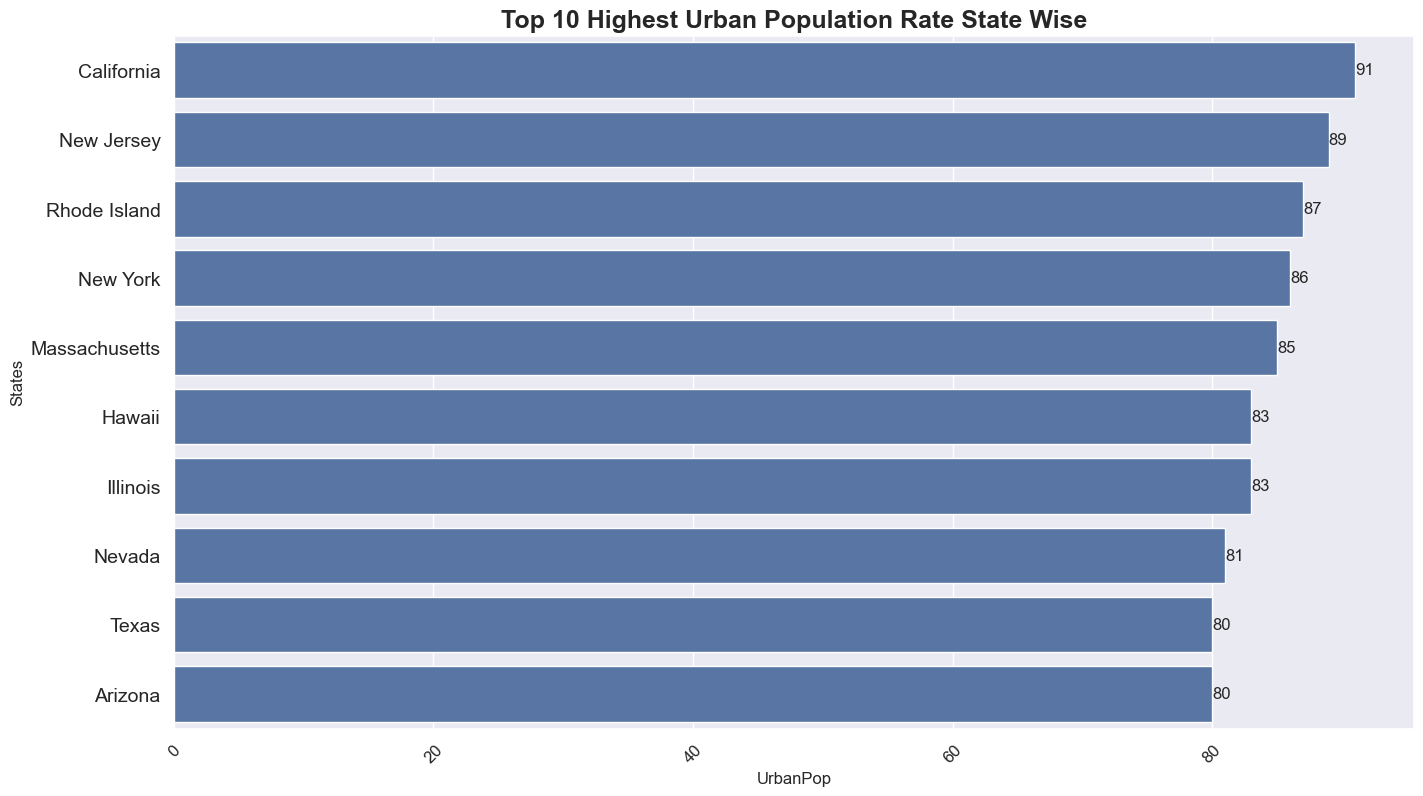

In [75]:
urbanpop = data.sort_values('UrbanPop', ascending = False)

plt.figure(figsize = (16,9))
ax = sns.barplot(x = urbanpop.UrbanPop[:10], y = urbanpop.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Highest Urban Population Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

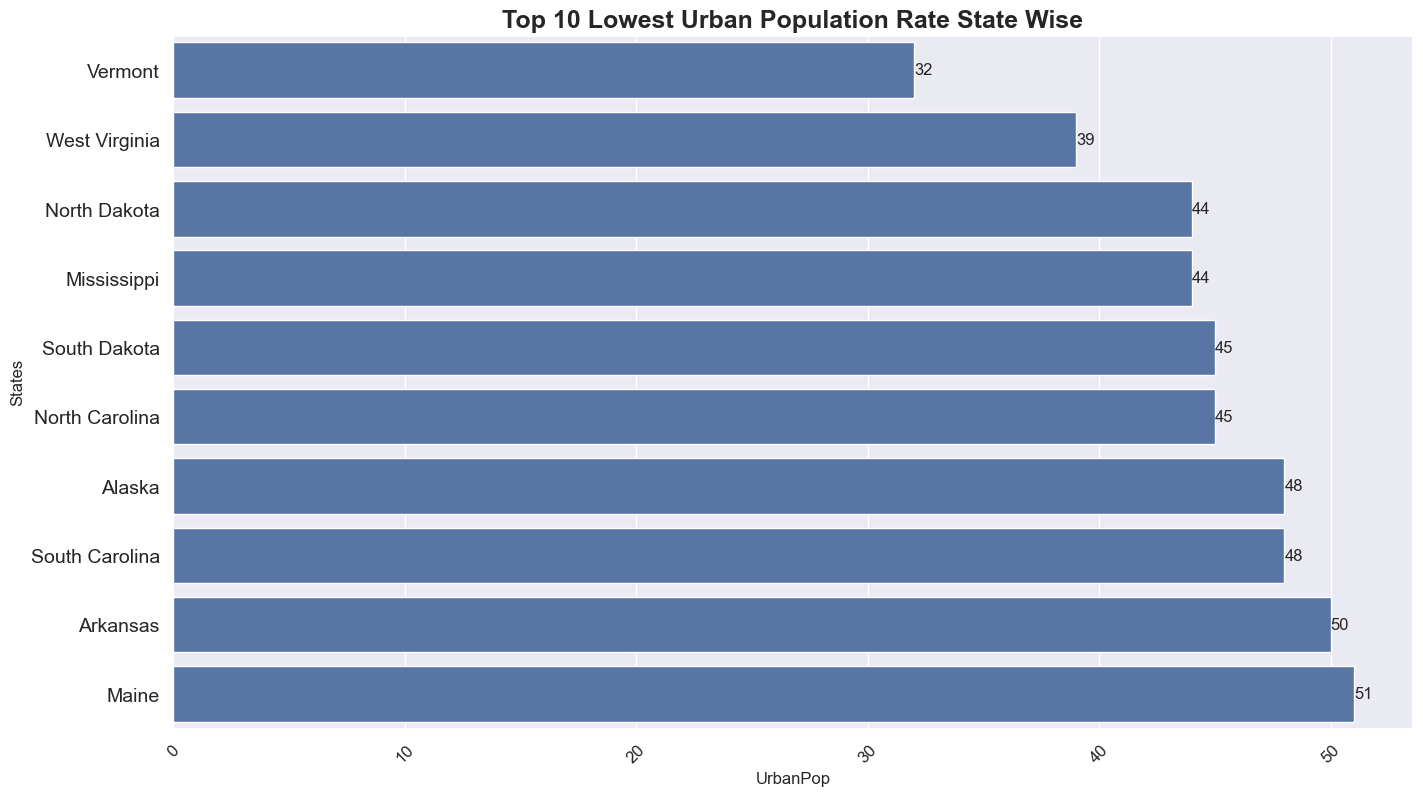

In [76]:
urbanpop = data.sort_values('UrbanPop', ascending = True)

plt.figure(figsize = (16,9))
ax = sns.barplot(x = urbanpop.UrbanPop[:10], y = urbanpop.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Lowest Urban Population Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

# Data Pre-processing

## Standardization of the data

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
df = data.set_index('States')
df.head()

Murder  Assault  UrbanPop  Rape
States                                     
Alabama       13.2      236        58  21.2
Alaska        10.0      263        48  44.5
Arizona        8.1      294        80  31.0
Arkansas       8.8      190        50  19.5
California     9.0      276        91  40.6

In [79]:
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(df)
std_df.shape

(50, 4)

## Normalization of the data

In [80]:
from sklearn.preprocessing import MinMaxScaler

In [82]:
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(df)
minmax_df.shape

(50, 4)

# KMeans Clustering

## Elbow method for determining cluster amount

### Standard Scaler Applied data

In [88]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

In [92]:
cluster_range = range(1,15)
cluster_error = []

for n in cluster_range:
    model = KMeans(n_clusters = n, n_init = 10)
    model.fit(std_df)
    labels = model.labels_
    centroids = model.cluster_centers_
    cluster_error.append(model.inertia_)
cluster_df = pd.DataFrame({'num_clusters':cluster_range, 'cluster_errors':cluster_error})
cluster_df

num_clusters  cluster_errors
0              1      200.000000
1              2      104.961633
2              3       79.921703
3              4       57.667578
4              5       49.969203
5              6       44.211714
6              7       39.166517
7              8       35.410306
8              9       31.313114
9             10       28.382700
10            11       25.810265
11            12       22.823538
12            13       21.174328
13            14       19.879467

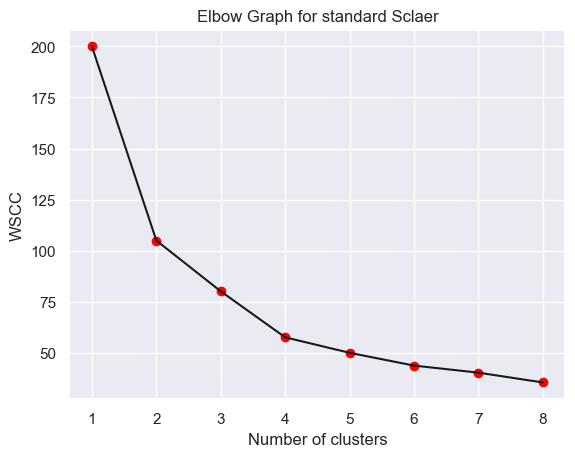

In [99]:
# within cluster sum of squares criterion

wcss = []
for i in range(1,9):
    kmeans = KMeans(n_clusters = i, random_state = 2)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,9), wcss, color = 'k')
plt.scatter(range(1,9), wcss, color = 'red')
plt.title('Elbow Graph for standard Sclaer')
plt.xlabel('Number of clusters')
plt.ylabel('WSCC')
plt.show()

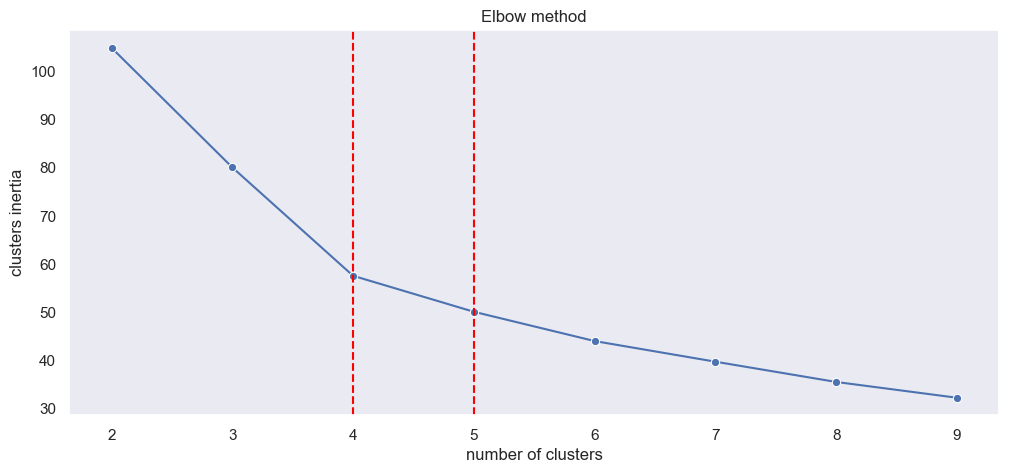

In [104]:
n_clusters = range(2, 10)
clusters_inertia = []
s_scores = []

for n in n_clusters:
    kmeans = KMeans(n_clusters = n, init = 'k-means++').fit(std_df)
    clusters_inertia.append(kmeans.inertia_)
    silhouette_avg = sil(std_df, kmeans.labels_)
    s_scores.append(silhouette_avg)

fig, ax = plt.subplots(figsize = (12, 5))
ax = sns.lineplot(x = n_clusters, y = clusters_inertia, marker = 'o', ax = ax)
ax.set_title('Elbow method')
ax.set_xlabel('number of clusters')
ax.set_ylabel('clusters inertia')
ax.axvline(4, ls = '--', c = 'red')
ax.axvline(5, ls = '--', c = 'red')
plt.grid()
plt.show()

There is no clear 'elbow' visible, therefore, a choice of 4 or 5 clusters seems to be fair.

### Silhouette Score

In [106]:
from yellowbrick.cluster import KElbowVisualizer

Elbow plot for standard scaler data


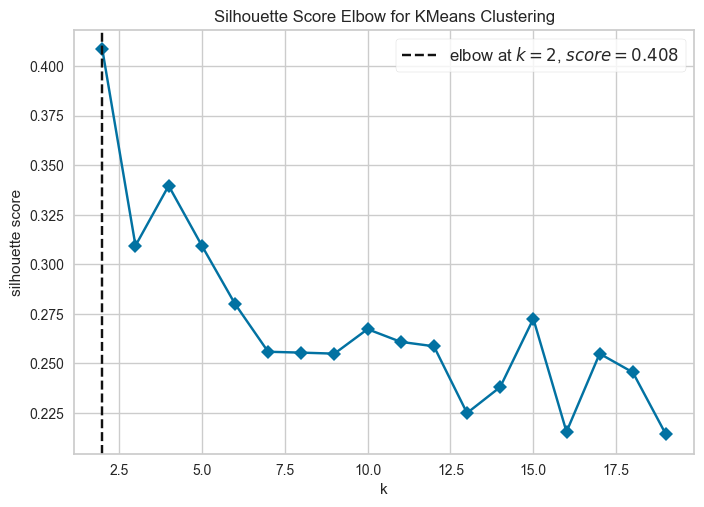

In [110]:
model = KMeans(random_state = 10, max_iter = 500, init = 'k-means++')

visualizer = KElbowVisualizer(model, k = (2,20), metric = 'silhouette', timings = False)
print('Elbow plot for standard scaler data')
visualizer.fit(std_df)
visualizer.poof()
plt.show()

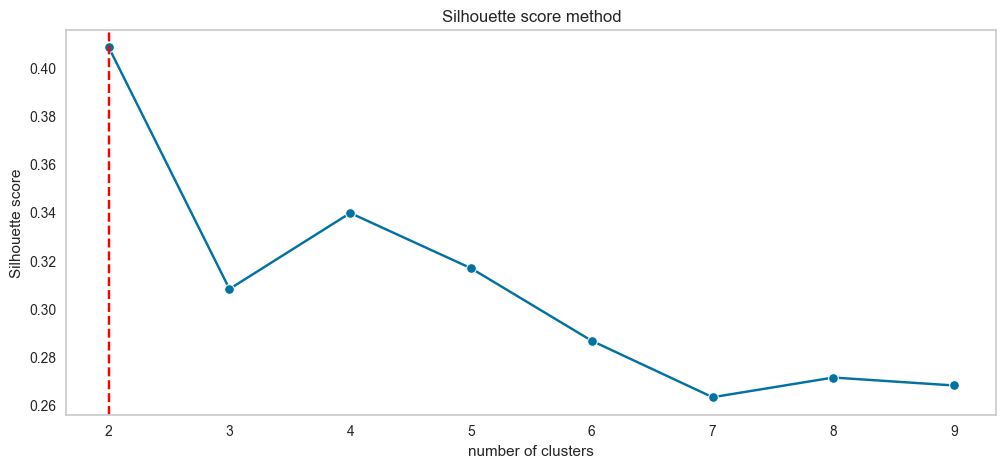

In [113]:
fig, ax = plt.subplots(figsize = (12,5))
ax = sns.lineplot(x = n_clusters, y = s_scores, marker = 'o', ax = ax)
ax.set_title('Silhouette score method')
ax.set_xlabel('number of clusters')
ax.set_ylabel('Silhouette score')
ax.axvline(2, ls = '--', color = 'red')
plt.grid()
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.4084890326217641
For n_clusters = 3 The average silhouette_score is : 0.30813622648945616
For n_clusters = 4 The average silhouette_score is : 0.33968891433344395
For n_clusters = 5 The average silhouette_score is : 0.3068468000198128
For n_clusters = 6 The average silhouette_score is : 0.2811951614918648
For n_clusters = 7 The average silhouette_score is : 0.2775072951373062
For n_clusters = 8 The average silhouette_score is : 0.24471865342863663
For n_clusters = 9 The average silhouette_score is : 0.26142196370721515


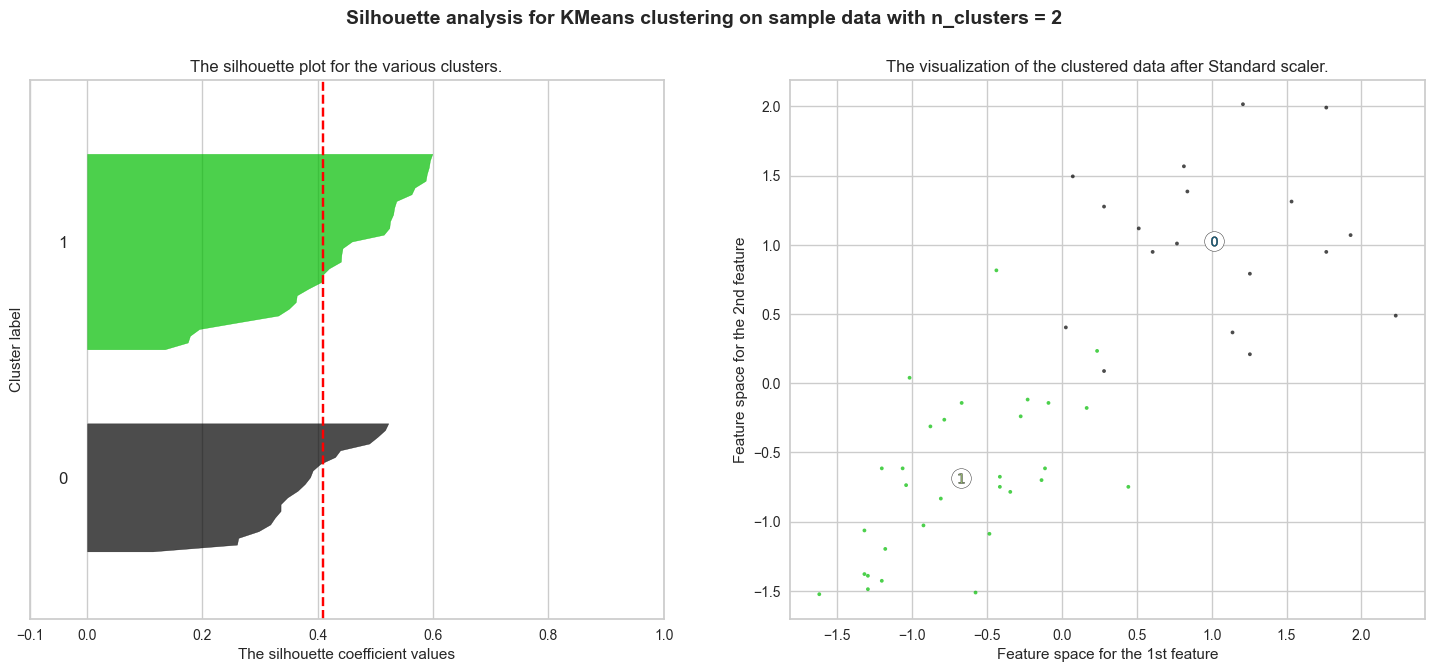

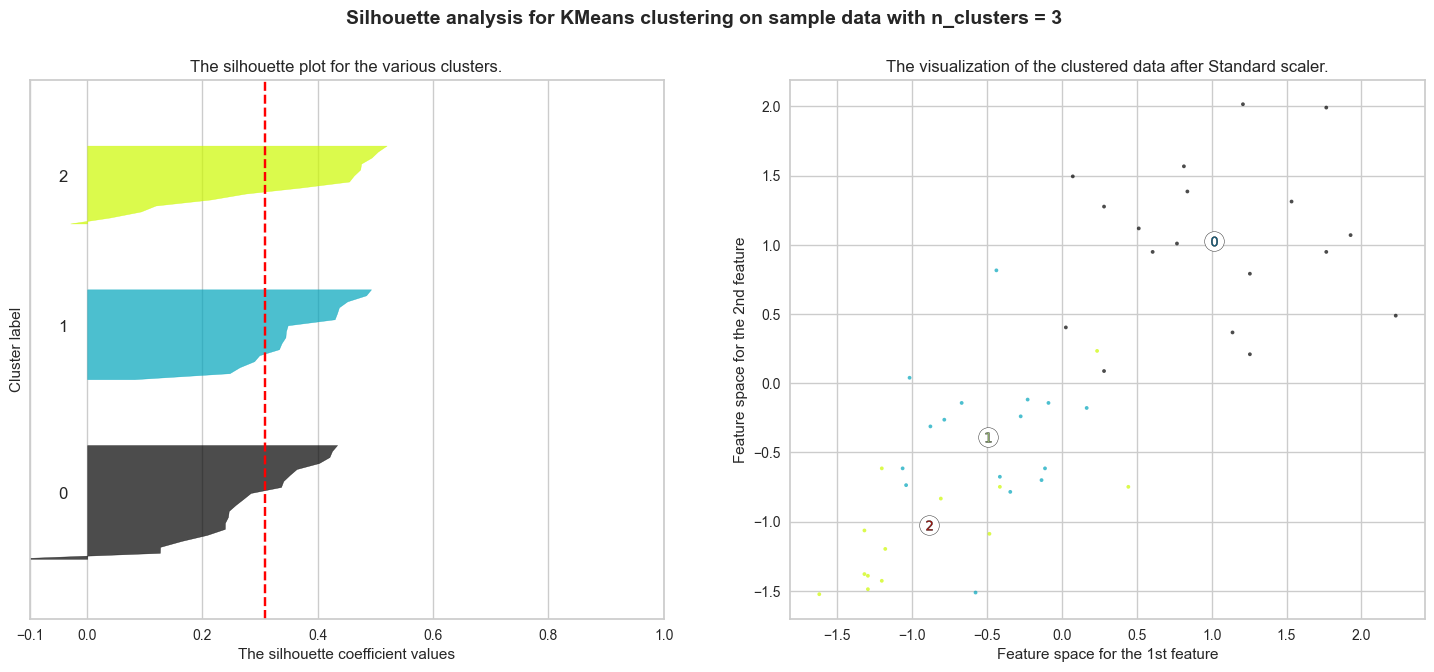

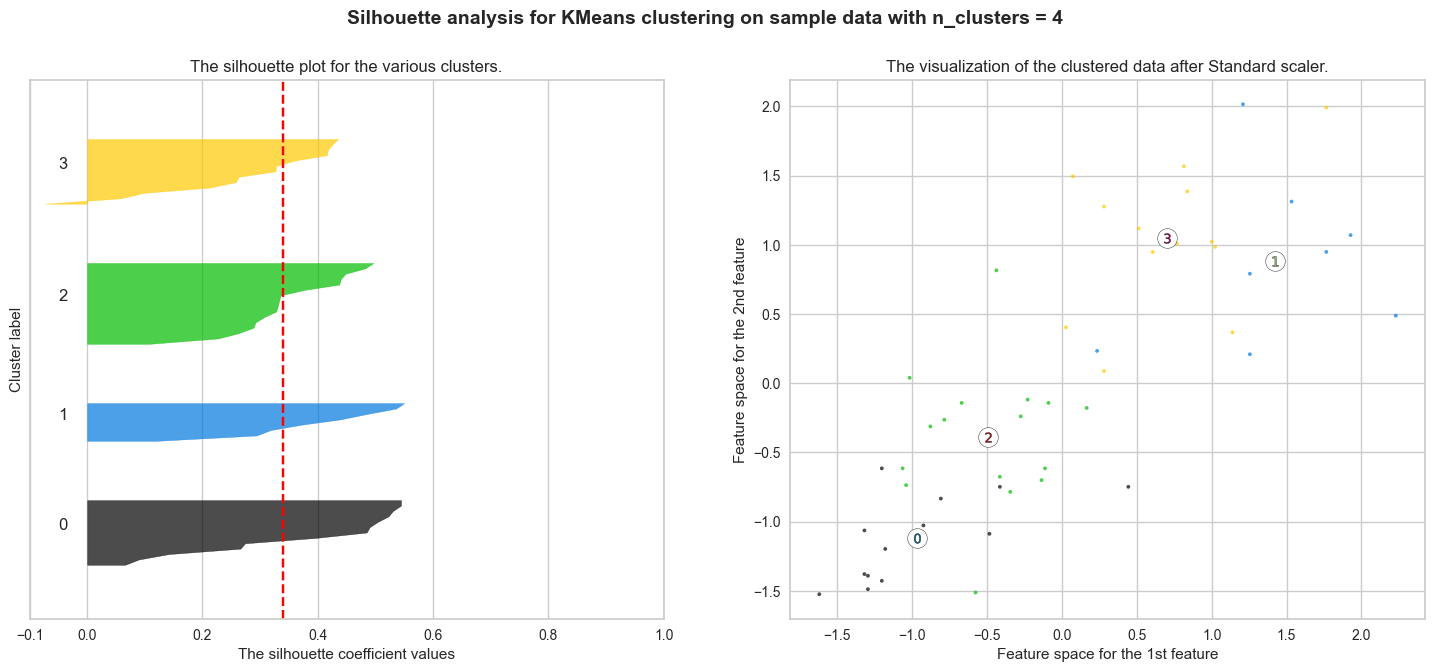

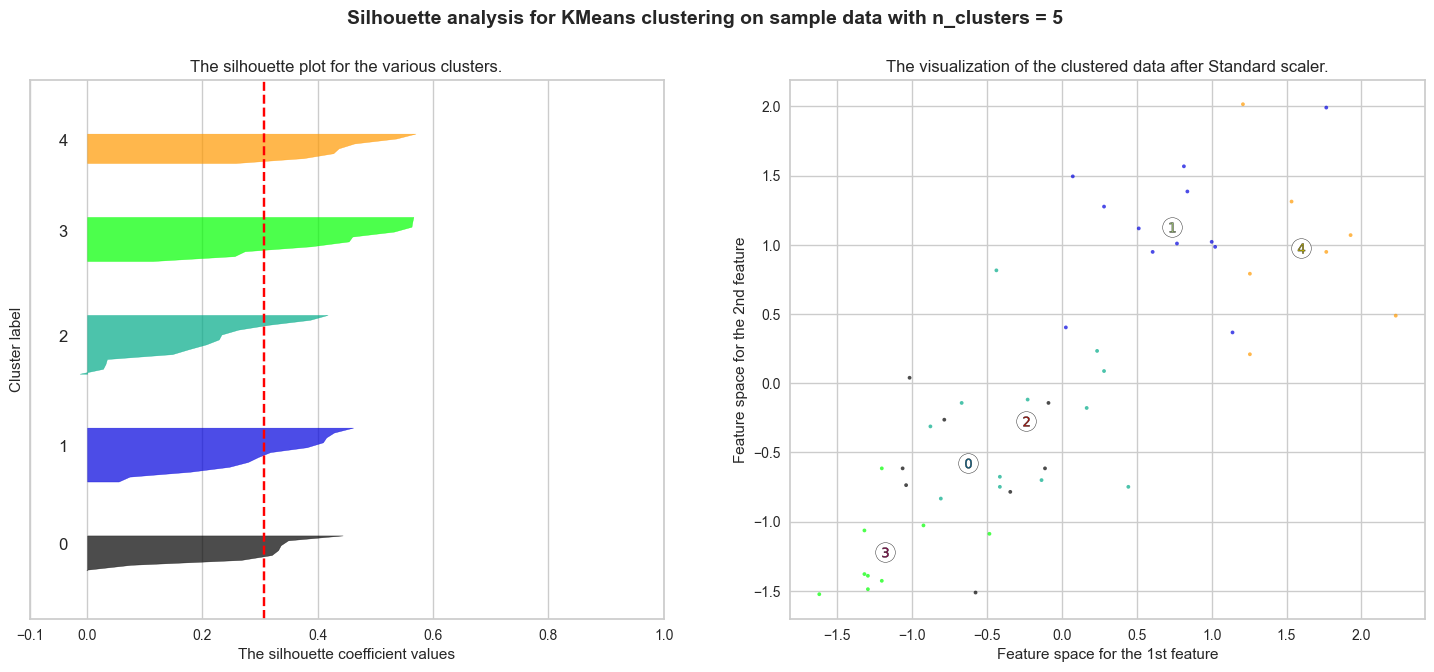

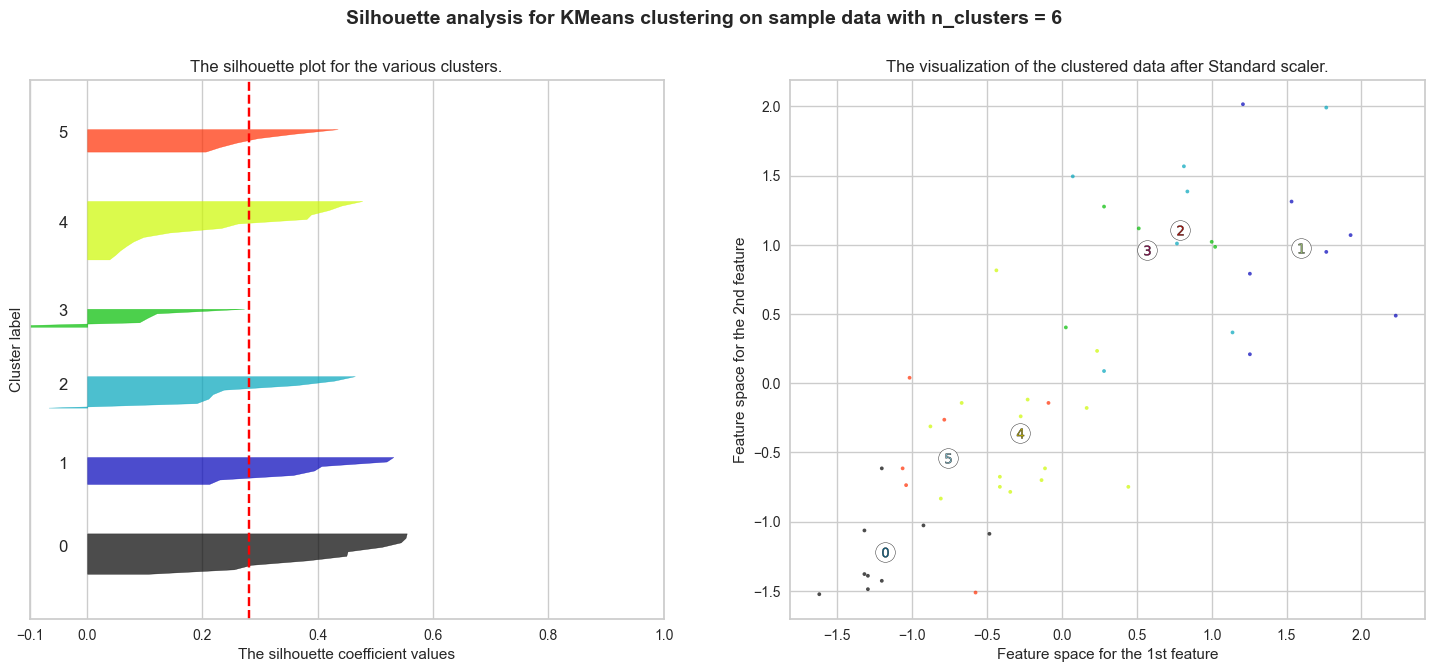

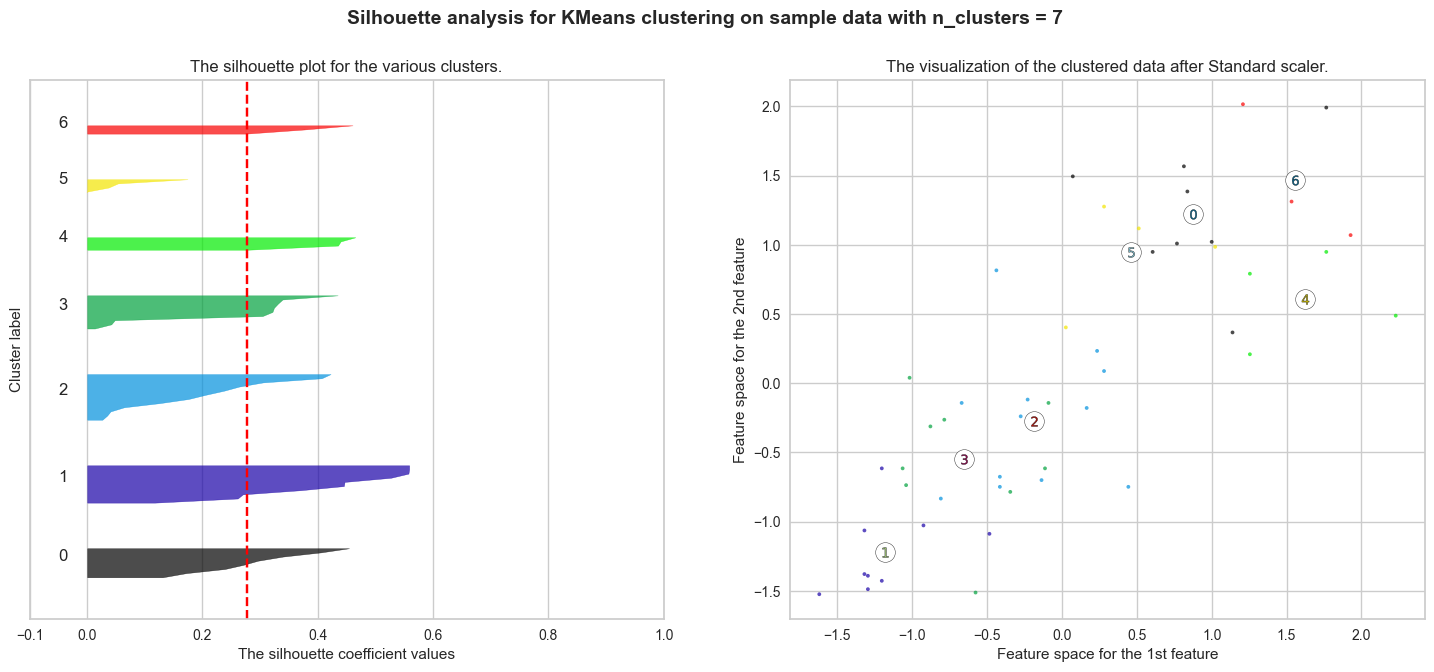

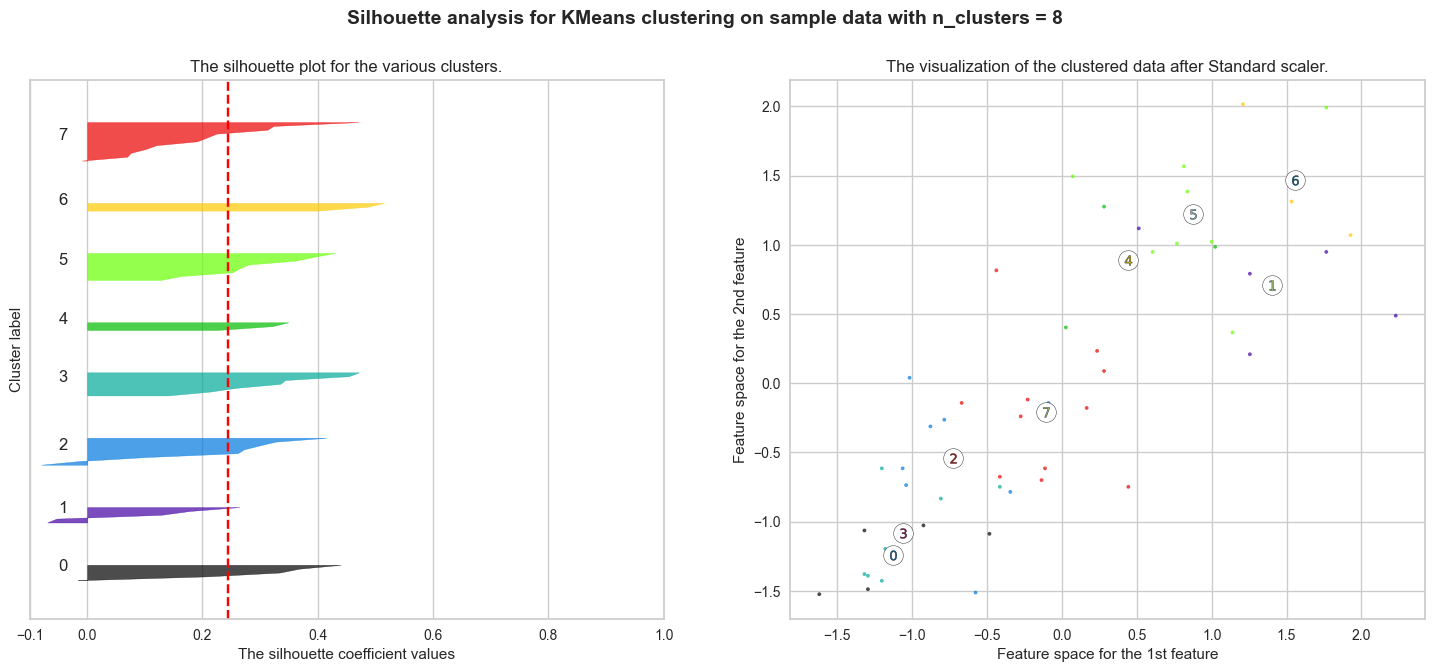

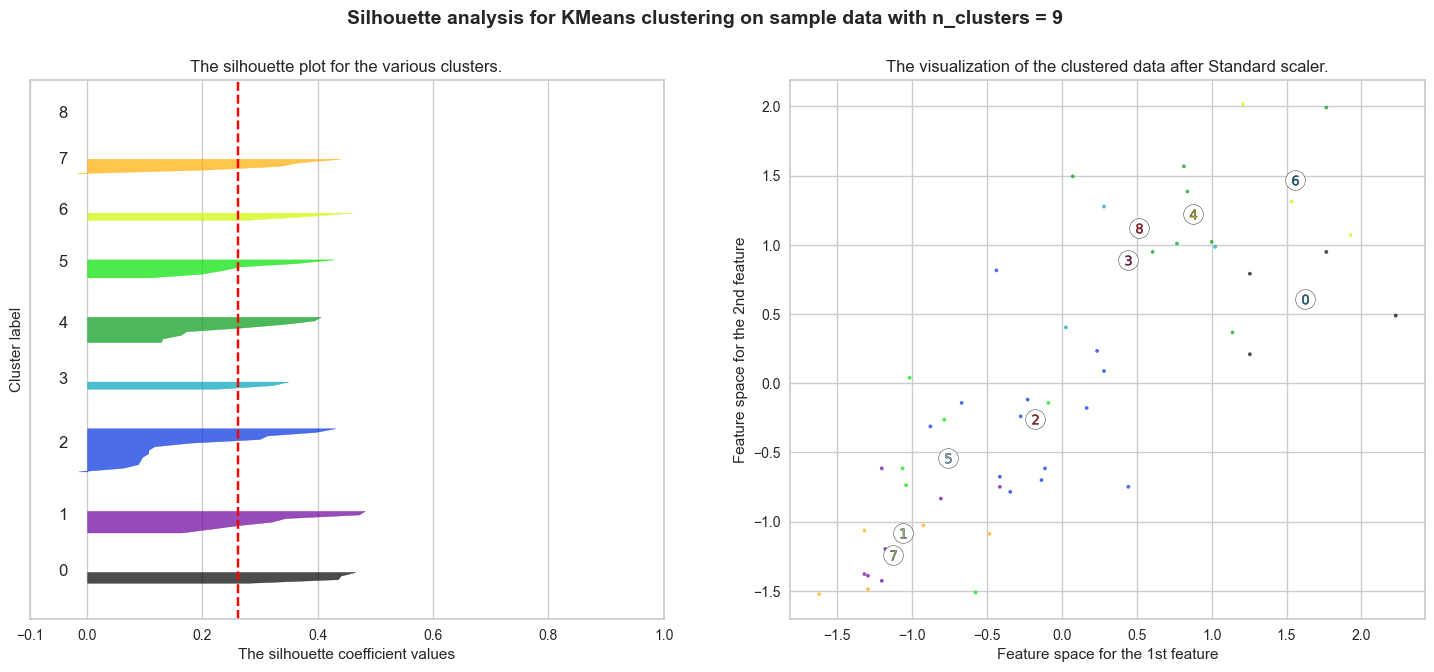

In [114]:
range_n_clusters = [2,3,4,5,6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(std_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(std_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = sil(std_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(std_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(std_df[:,0], std_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,0], centers[:,1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data after Standard scaler.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

__Conclusion:__

Therefore, we are going to build our model using number of clusters =2, bevause the silhouette is highest. 

### Building KMeans algorithm using K =2 on Standard scaler applied dataset

In [117]:
model = KMeans(n_clusters = 2, random_state = 0, init = 'k-means++')
y_pred = model.fit_predict(std_df)
y_pred.shape

(50,)

In [118]:
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

In [119]:
model.labels_

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

In [120]:
model.cluster_centers_

array([[ 1.01513667,  1.02412028,  0.19959126,  0.85556386],
       [-0.67675778, -0.68274685, -0.13306084, -0.57037591]])

In [121]:
# within cluster sum of squared 

model.inertia_

104.96163315756871

In [122]:
# Assign clusters to the data set
df['Kmeans_label'] = model.labels_

In [123]:
df.groupby('Kmeans_label').agg(['mean'])

Murder     Assault   UrbanPop       Rape
                mean        mean       mean       mean
Kmeans_label                                          
0             12.165  255.250000  68.400000  29.165000
1              4.870  114.433333  63.633333  15.943333

In [124]:
df[df['Kmeans_label'] ==0]

Murder  Assault  UrbanPop  Rape  Kmeans_label
States                                                       
Alabama           13.2      236        58  21.2             0
Alaska            10.0      263        48  44.5             0
Arizona            8.1      294        80  31.0             0
California         9.0      276        91  40.6             0
Colorado           7.9      204        78  38.7             0
Florida           15.4      335        80  31.9             0
Georgia           17.4      211        60  25.8             0
Illinois          10.4      249        83  24.0             0
Louisiana         15.4      249        66  22.2             0
Maryland          11.3      300        67  27.8             0
Michigan          12.1      255        74  35.1             0
Mississippi       16.1      259        44  17.1             0
Missouri           9.0      178        70  28.2             0
Nevada            12.2      252        81  46.0             0
New Mexico        11.4      285        70  32.1             0
New York          11.1      254        86  26.1             0
North Carolina    13.0      337        45  16.1             0
South Carolina    14.4      279        48  22.5             0
Tennessee         13.2      188        59  26.9             0
Texas             12.7      201        80  25.5             0

In [125]:
df[df['Kmeans_label']==1]

Murder  Assault  UrbanPop  Rape  Kmeans_label
States                                                      
Arkansas          8.8      190        50  19.5             1
Connecticut       3.3      110        77  11.1             1
Delaware          5.9      238        72  15.8             1
Hawaii            5.3       46        83  20.2             1
Idaho             2.6      120        54  14.2             1
Indiana           7.2      113        65  21.0             1
Iowa              2.2       56        57  11.3             1
Kansas            6.0      115        66  18.0             1
Kentucky          9.7      109        52  16.3             1
Maine             2.1       83        51   7.8             1
Massachusetts     4.4      149        85  16.3             1
Minnesota         2.7       72        66  14.9             1
Montana           6.0      109        53  16.4             1
Nebraska          4.3      102        62  16.5             1
New Hampshire     2.1       57        56   9.5             1
New Jersey        7.4      159        89  18.8             1
North Dakota      0.8       45        44   7.3             1
Ohio              7.3      120        75  21.4             1
Oklahoma          6.6      151        68  20.0             1
Oregon            4.9      159        67  29.3             1
Pennsylvania      6.3      106        72  14.9             1
Rhode Island      3.4      174        87   8.3             1
South Dakota      3.8       86        45  12.8             1
Utah              3.2      120        80  22.9             1
Vermont           2.2       48        32  11.2             1
Virginia          8.5      156        63  20.7             1
Washington        4.0      145        73  26.2             1
West Virginia     5.7       81        39   9.3             1
Wisconsin         2.6       53        66  10.8             1
Wyoming           6.8      161        60  15.6             1

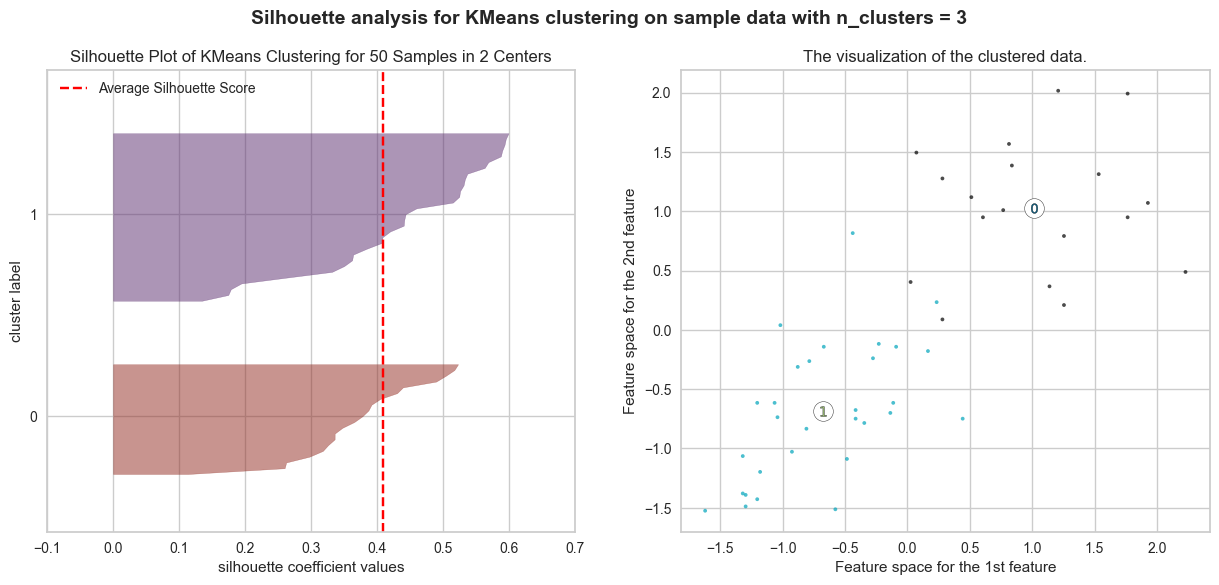

In [127]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)



sil_visualizer1 = SilhouetteVisualizer(model,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a'])
sil_visualizer1.fit(std_df)


# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model.labels_.astype(float) / 3) # 6 is number of clusters
ax2.scatter(std_df[:, 0], std_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')


ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 3),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

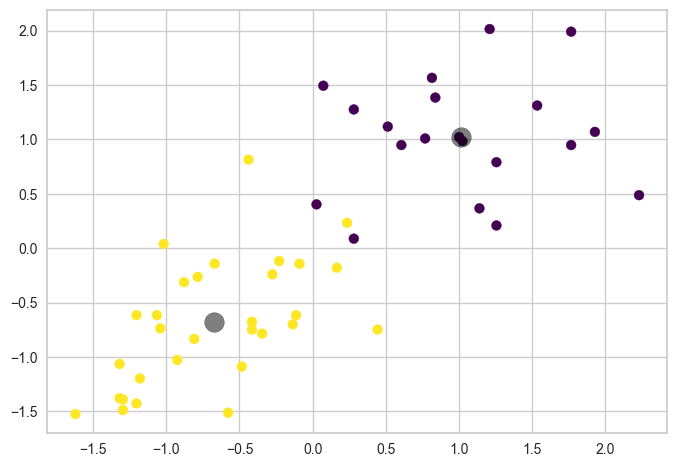

In [128]:
plt.scatter(std_df[:,0],std_df[:,1], c = model.labels_, s = 50, cmap = 'viridis')

centers = model.cluster_centers_

plt.scatter(centers[:,0], centers[:,1], c = 'black', s = 200, alpha = 0.5)

__Conclusion:__

States in the cluster 0 seems to have higher crime rate, whereas states in the cluster 1 seems to have lower crime rate.

### Elbow method and silhouette score on MinMaxScaler Applied data

In [129]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(minmax_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

num_clusters  cluster_errors
0              1       13.184123
1              2        6.596894
2              3        5.016389
3              4        3.683456
4              5        3.184262
5              6        2.825169
6              7        2.647689
7              8        2.353964
8              9        2.126829
9             10        1.844370
10            11        1.652704
11            12        1.528674
12            13        1.363180
13            14        1.325981

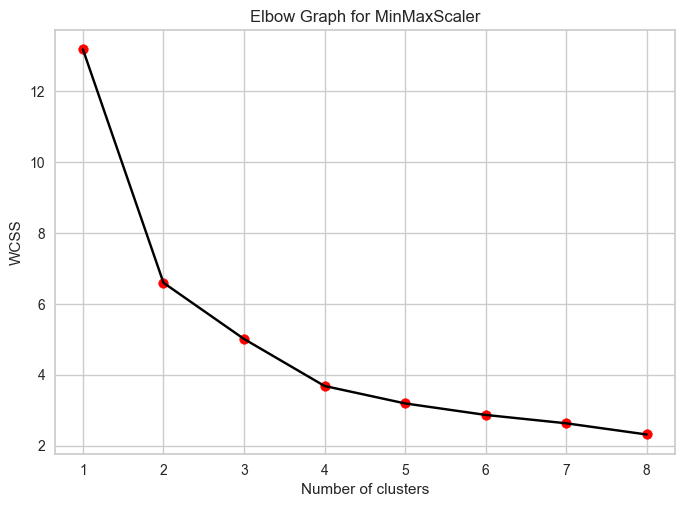

In [130]:
wcss=[]
for i in range (1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(minmax_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for MinMaxScaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Elbow Plot for MinMaxScaler data


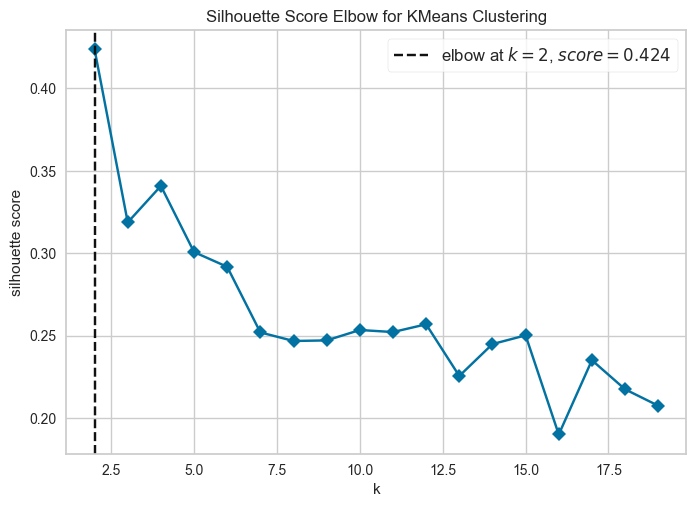

In [131]:
# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
# Fit the data and visualize
print('Elbow Plot for MinMaxScaler data')
visualizer.fit(minmax_df)    
visualizer.poof()
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.42364457559625074
For n_clusters = 3 The average silhouette_score is : 0.3187755079997931
For n_clusters = 4 The average silhouette_score is : 0.34089035600743633
For n_clusters = 5 The average silhouette_score is : 0.30076261721222347
For n_clusters = 6 The average silhouette_score is : 0.2918285820526902
For n_clusters = 7 The average silhouette_score is : 0.2520461655275077
For n_clusters = 8 The average silhouette_score is : 0.2468420517258156
For n_clusters = 9 The average silhouette_score is : 0.24719031981372122


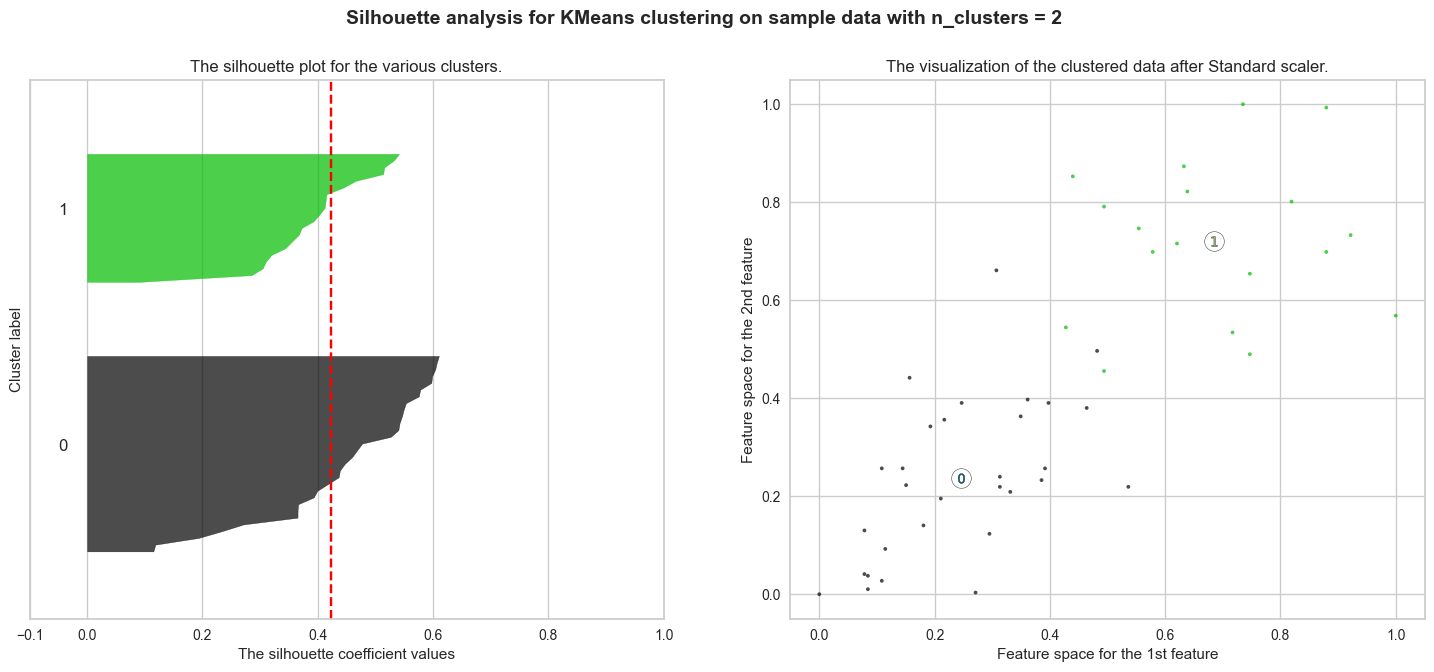

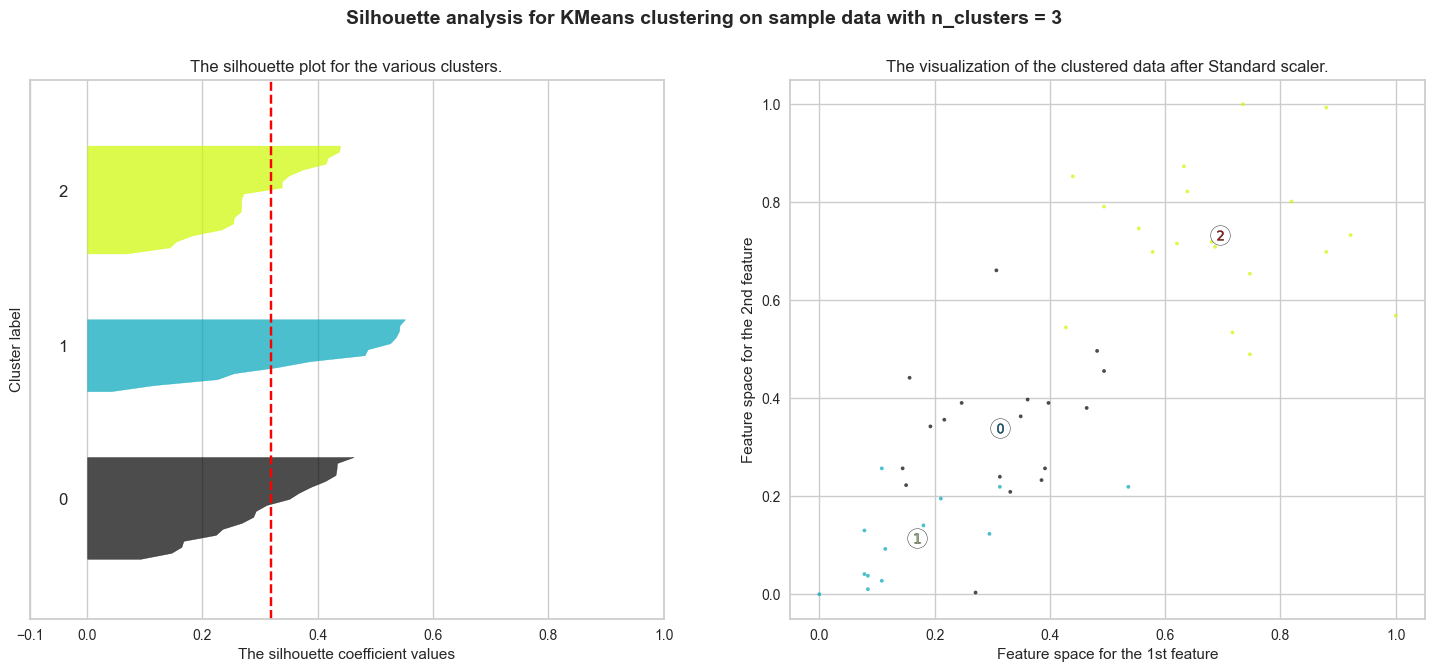

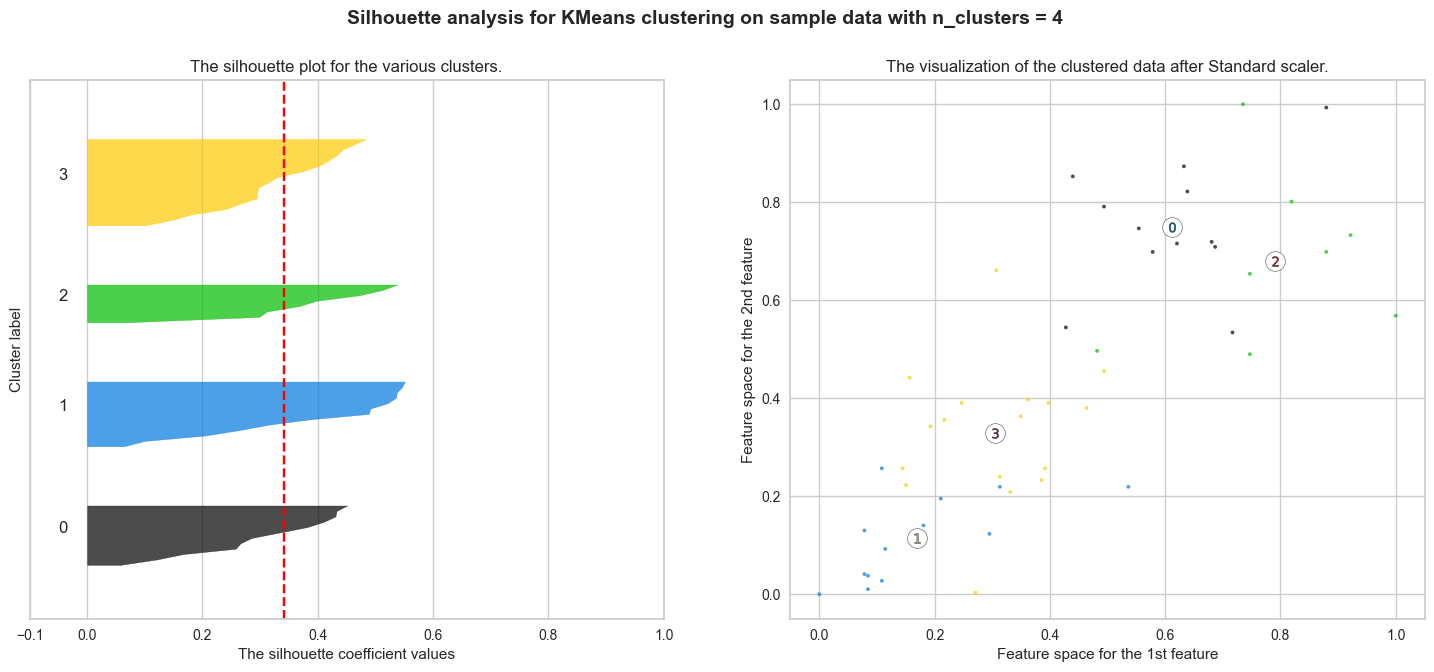

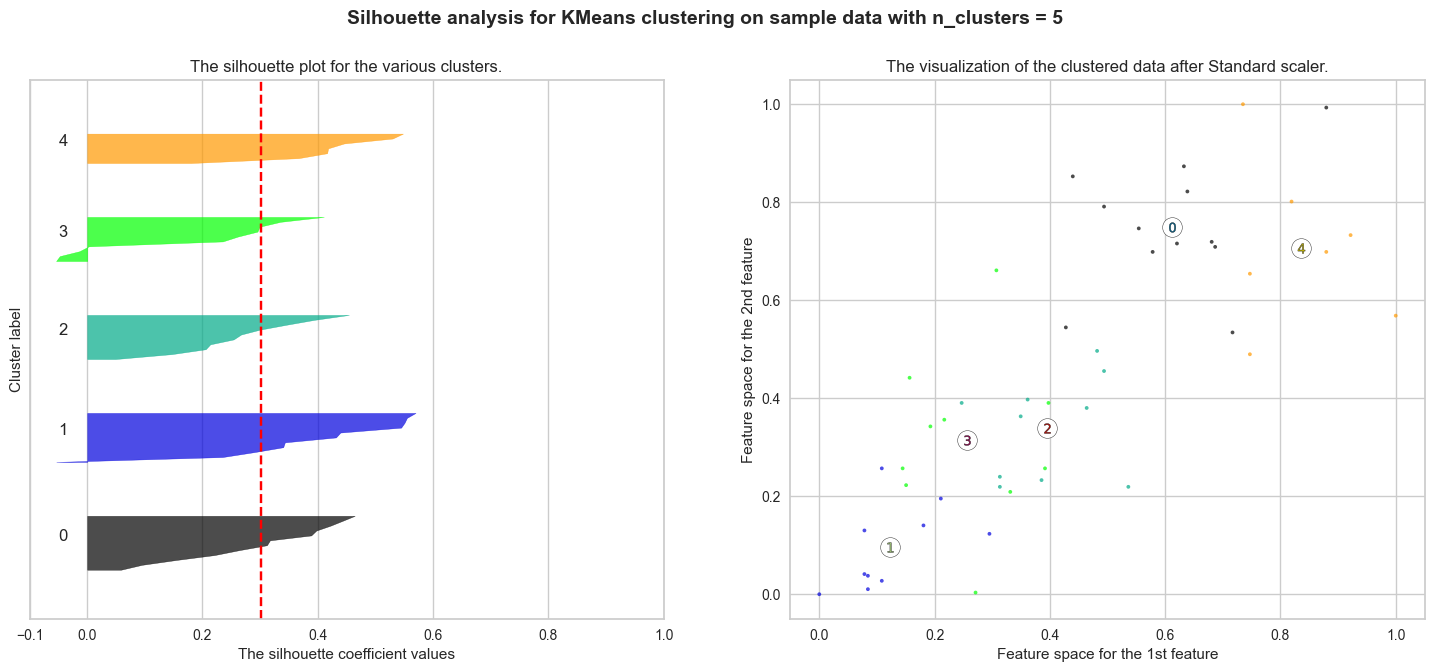

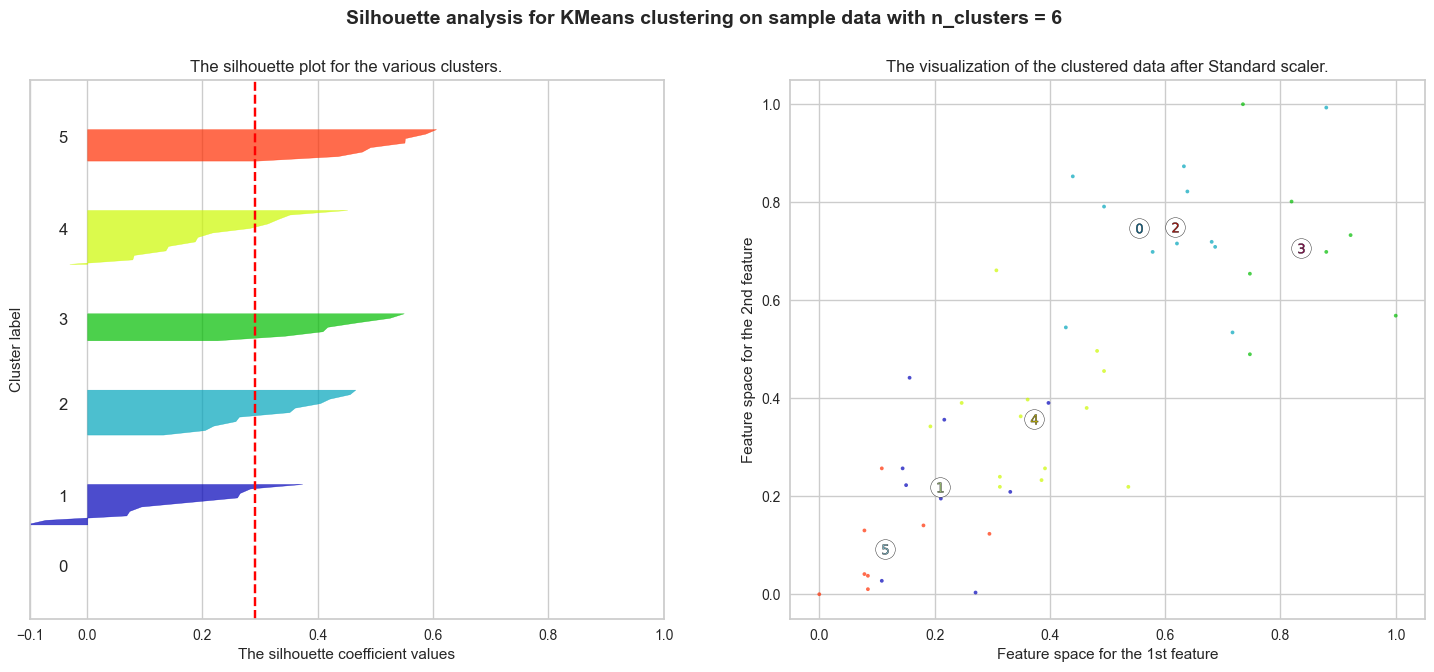

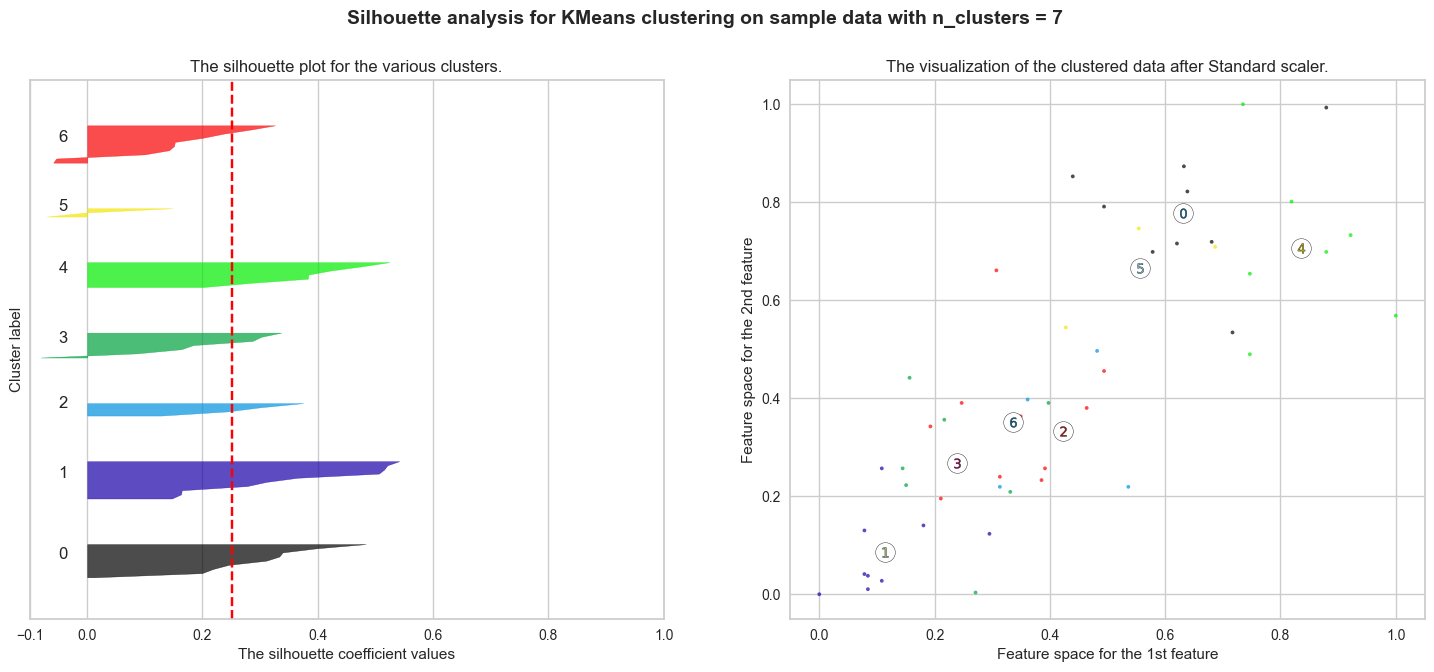

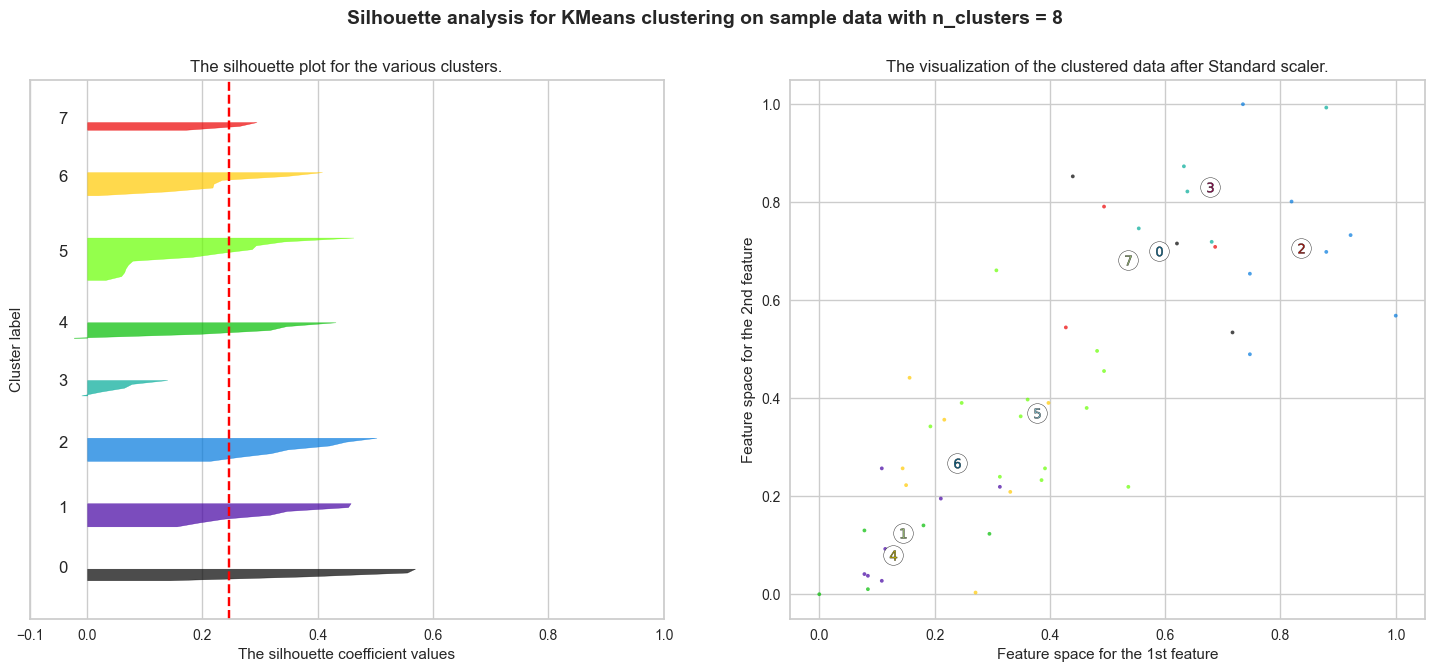

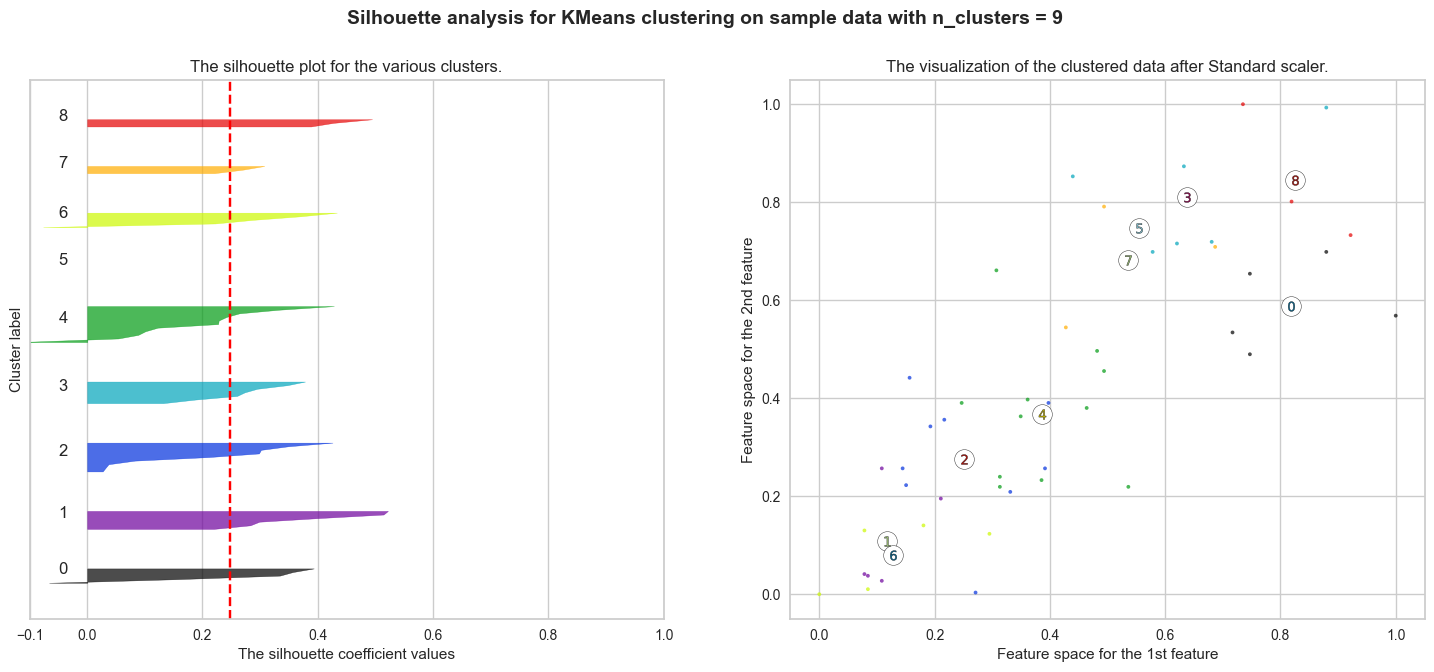

In [132]:
range_n_clusters = [2,3,4,5,6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(minmax_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(minmax_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = sil(minmax_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(minmax_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(minmax_df[:,0], minmax_df[:,1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,0], centers[:,1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data after Standard scaler.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Here, the best silhouette score is for k = 2, so we would build the model using K = 2.

### Building KMeans algorithm using K = 2 on MinMax scaled data

In [134]:
model = KMeans(n_clusters = 2, random_state = 0, init = 'k-means++')
y_pred = model.fit_predict(minmax_df)
y_pred.shape

(50,)

In [135]:
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

In [136]:
model.labels_

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

In [137]:
model.cluster_centers_

array([[0.68463855, 0.72003425, 0.61694915, 0.56498708],
       [0.24518072, 0.23778539, 0.53615819, 0.22334195]])

In [138]:
# within cluster sum of squared

model.inertia_

6.596893867946196

In [139]:
df['Kmeans_label_m']= model.labels_

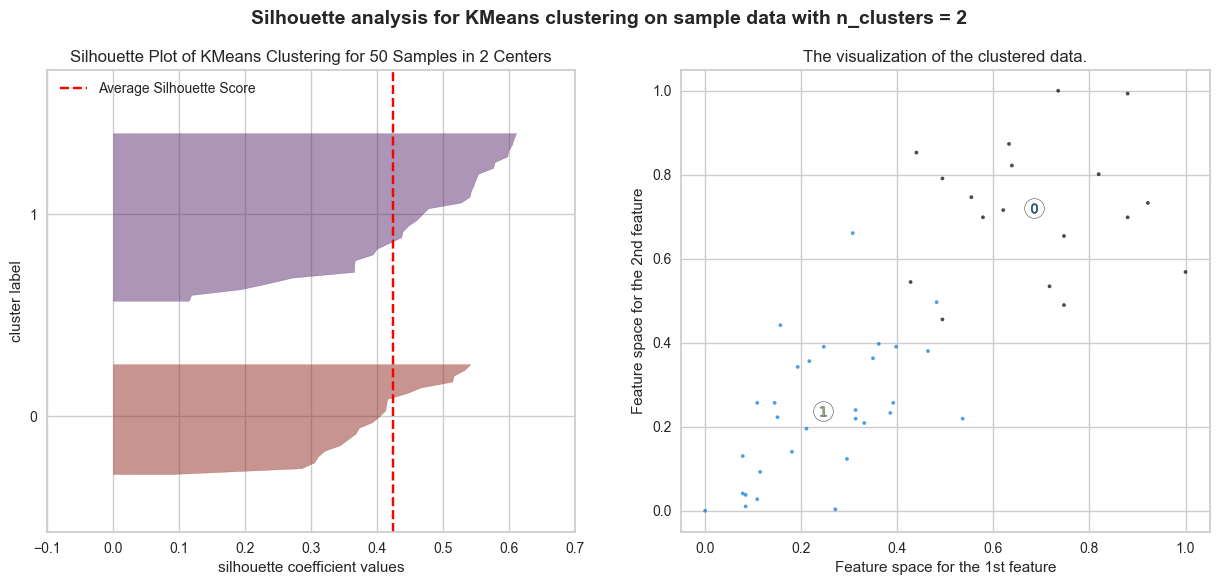

In [140]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)



sil_visualizer1 = SilhouetteVisualizer(model,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a'])
sil_visualizer1.fit(minmax_df)


# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model.labels_.astype(float) / 4) # 6 is number of clusters
ax2.scatter(minmax_df[:, 0], minmax_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')


ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 2),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

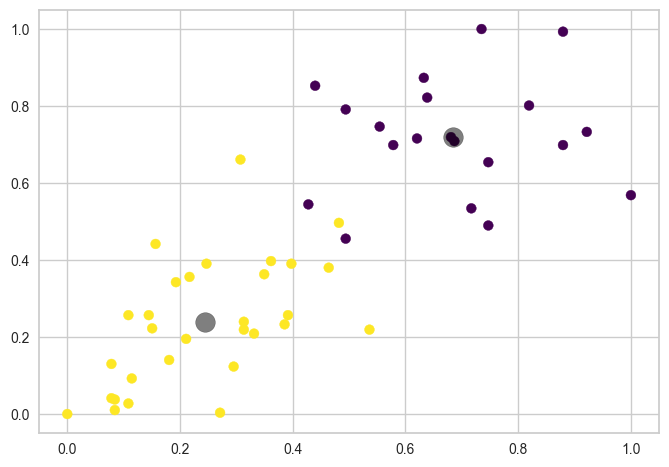

In [142]:
# Let's visualize the data we reduced to 2 sets.

plt.scatter(minmax_df[:,0], minmax_df[:,1], c = model.labels_, s = 50, cmap = "viridis")

centers = model.cluster_centers_                                 
# We want to create 2 centers and show them on the visual.

plt.scatter(centers[:,0], centers[:,1], c = "black", s = 200, alpha = 0.5)

In [144]:
df.groupby('Kmeans_label_m').agg(['mean'])

Murder     Assault   UrbanPop       Rape Kmeans_label
                  mean        mean       mean       mean         mean
Kmeans_label_m                                                       
0               12.165  255.250000  68.400000  29.165000          0.0
1                4.870  114.433333  63.633333  15.943333          1.0

Looks like the labeling using two different data set (standardized and normalized) have same labeling. 

In [148]:
df[df['Kmeans_label'] == df['Kmeans_label_m']].count()

Murder            50
Assault           50
UrbanPop          50
Rape              50
Kmeans_label      50
Kmeans_label_m    50
dtype: int64

In [149]:
# so it wont matter if we drop one column

df.drop('Kmeans_label_m', axis = 1, inplace = True)

In [150]:
df.head()

Murder  Assault  UrbanPop  Rape  Kmeans_label
States                                                   
Alabama       13.2      236        58  21.2             0
Alaska        10.0      263        48  44.5             0
Arizona        8.1      294        80  31.0             0
Arkansas       8.8      190        50  19.5             1
California     9.0      276        91  40.6             0

# Hierarchical Clustering Algorithm

## Dendogram on MixMax scaled applied on dataset

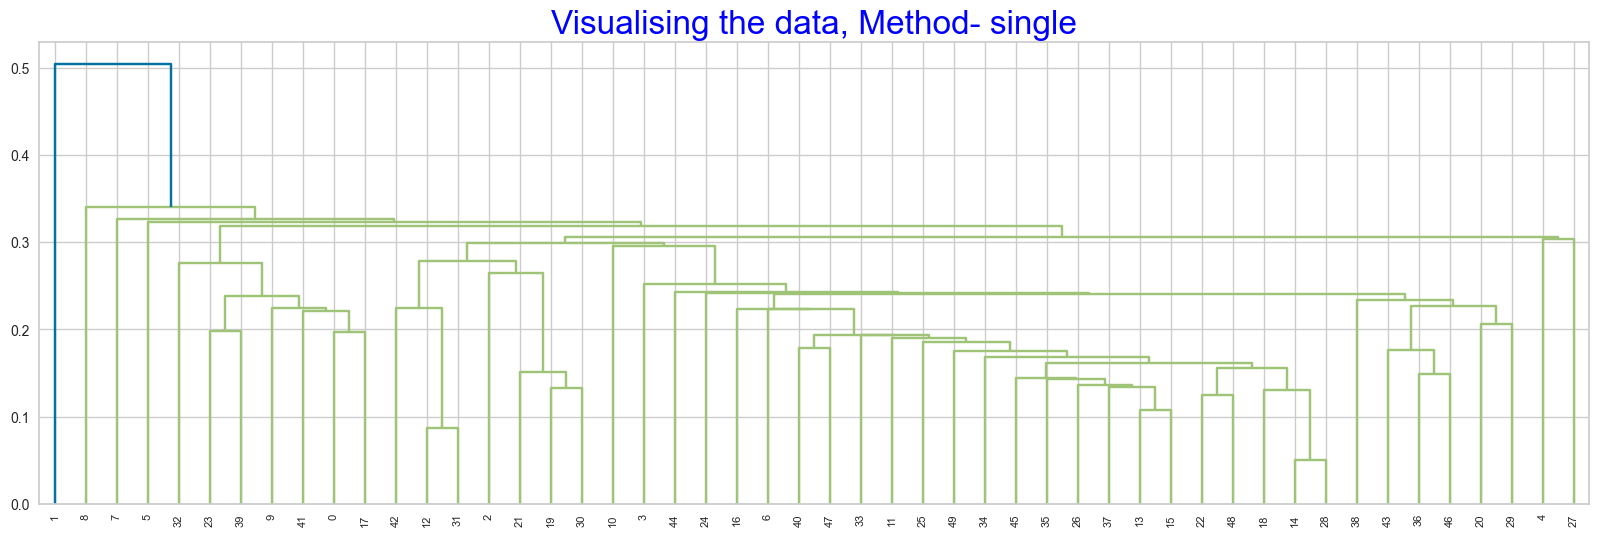

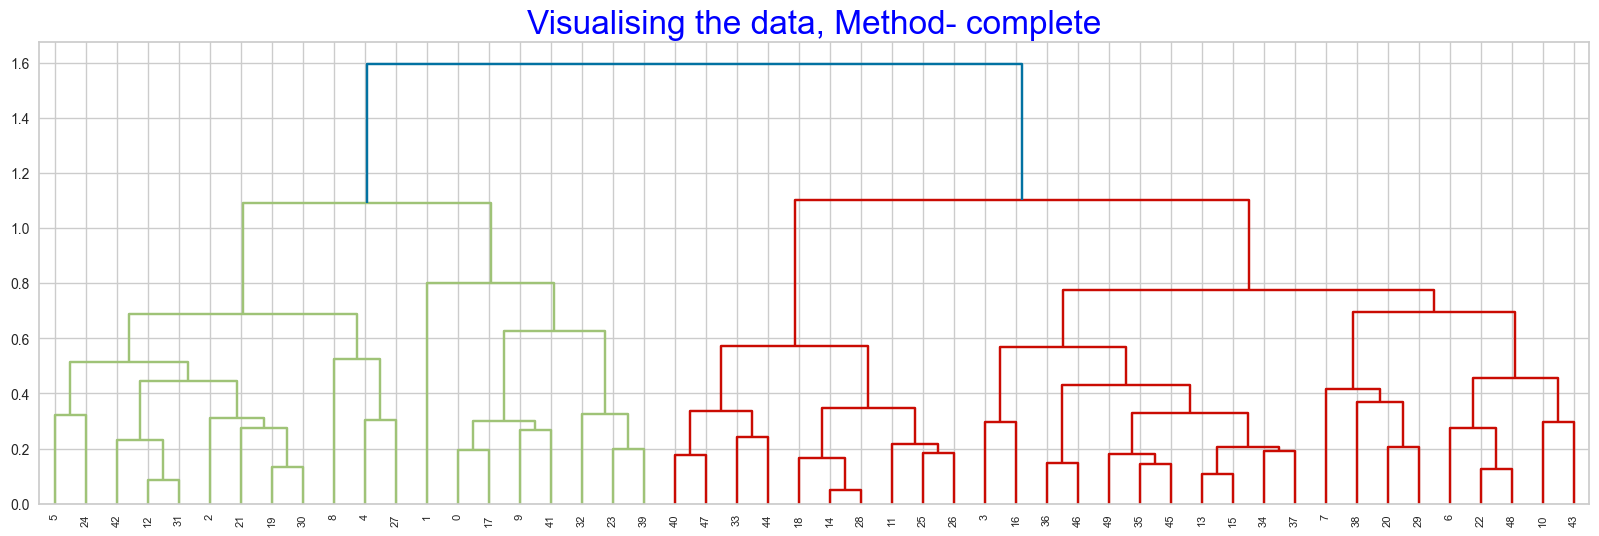

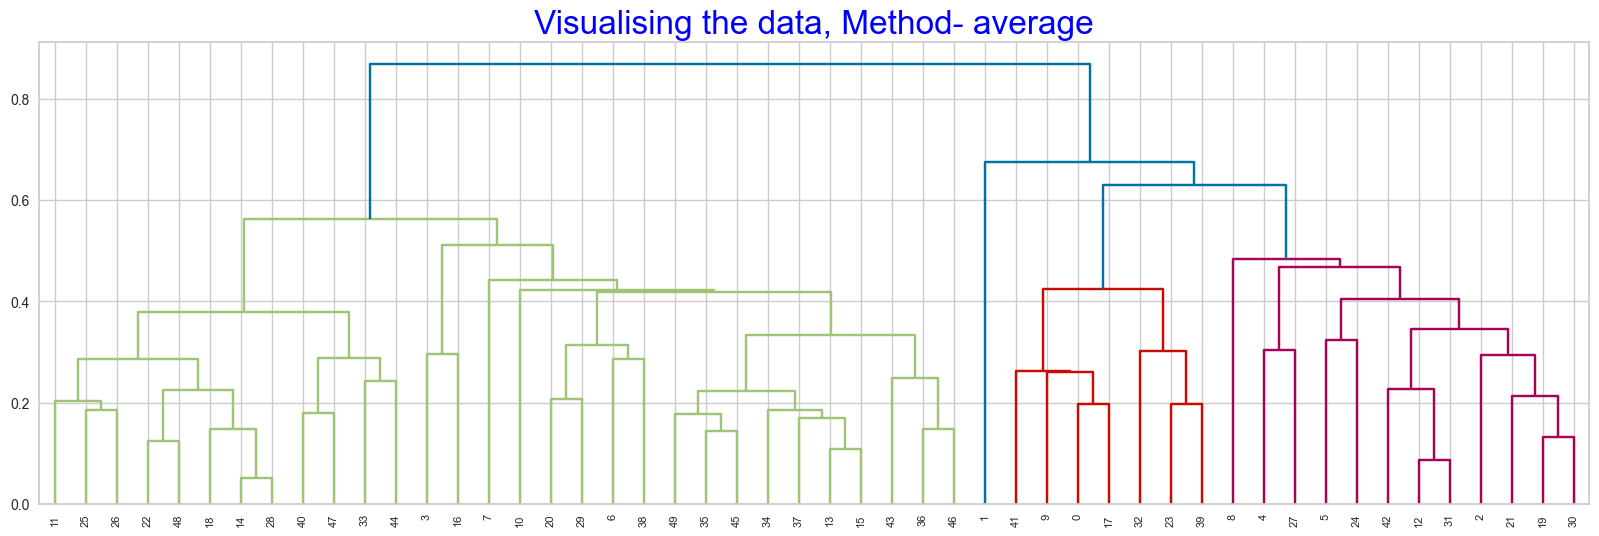

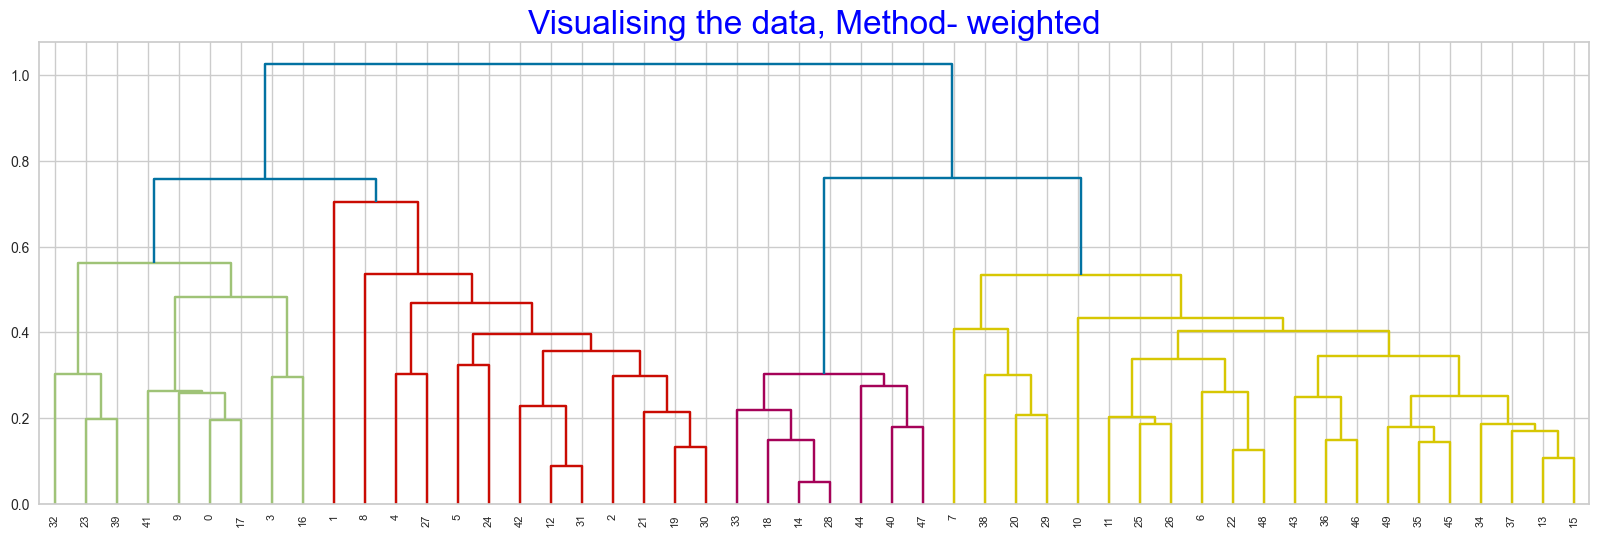

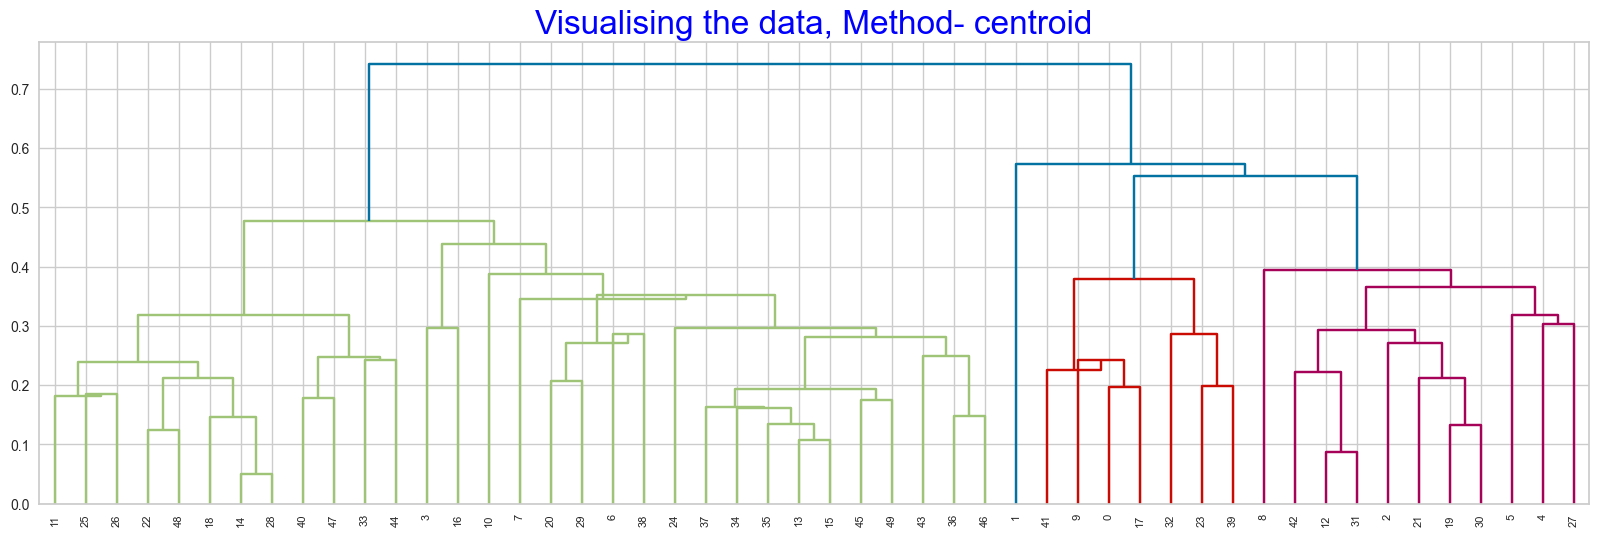

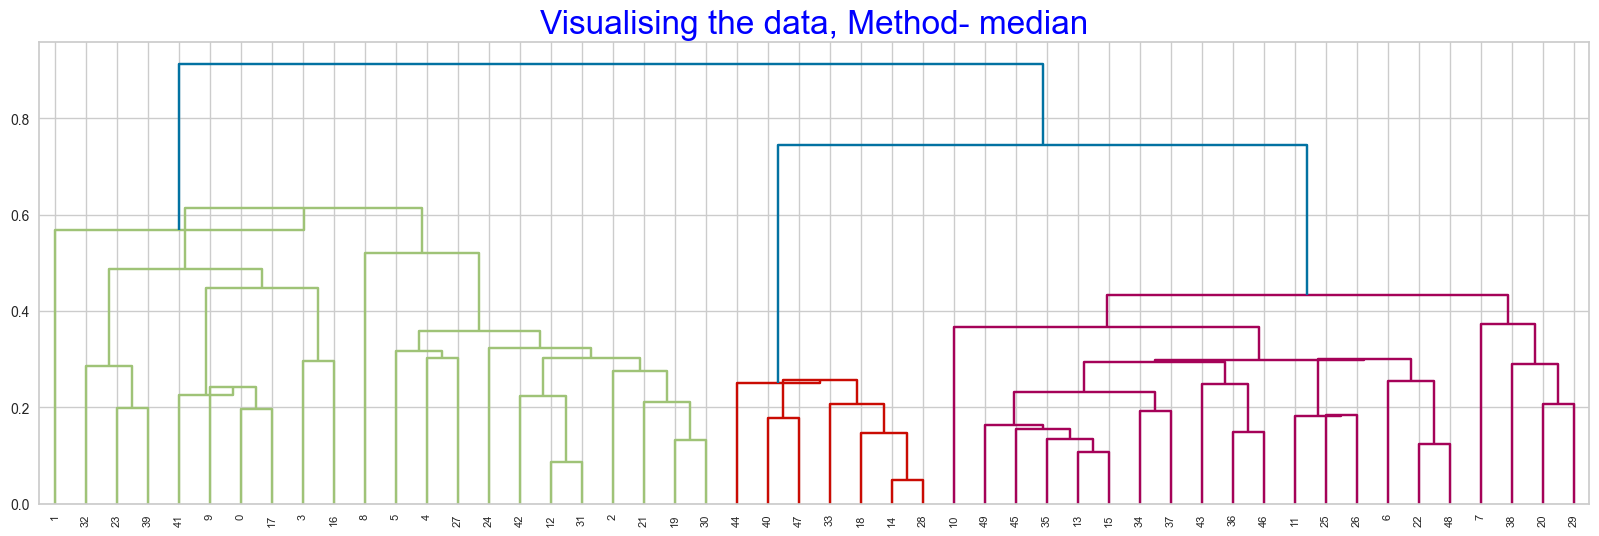

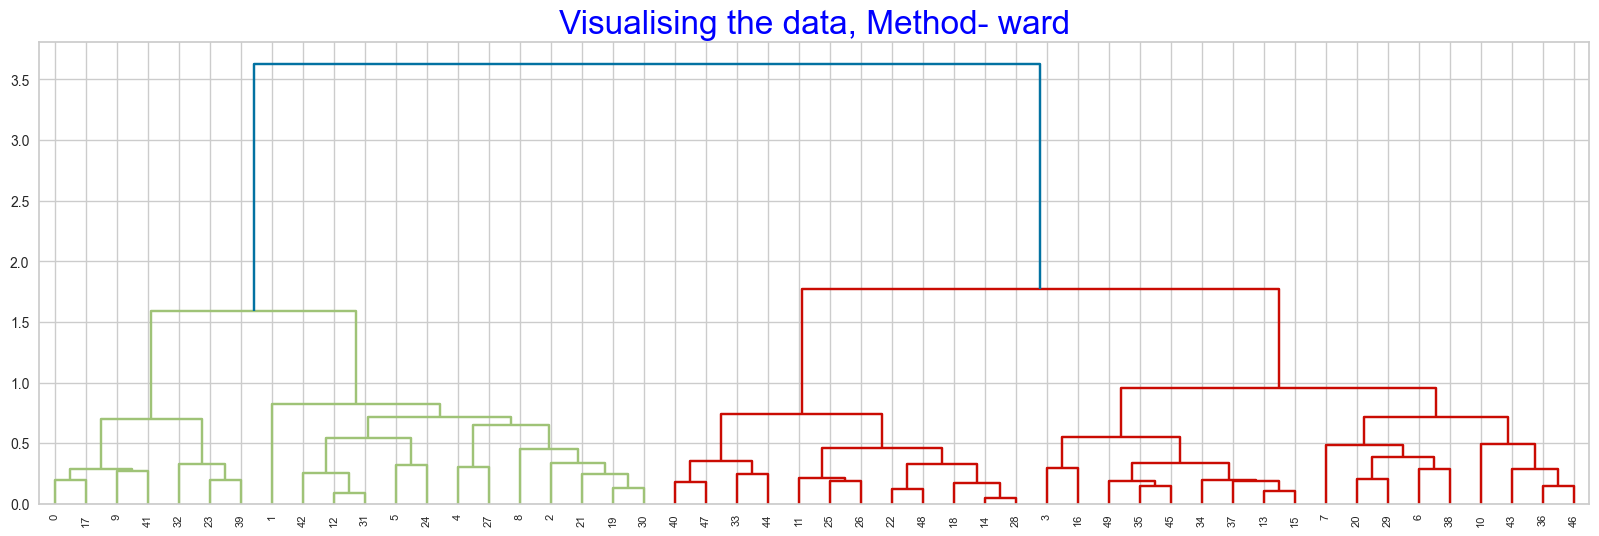

In [152]:
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(minmax_df, method = methods,optimal_ordering=False))

In [153]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for linkages in ["ward", "complete", "average", "single"]:
    for n in n_clusters:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(minmax_df)
        silhouette_score1 = sil(minmax_df, hie_labels1)
        print("For n_clusters =", n,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.42364457559625074
For n_clusters = 3 The average silhouette_score with linkage- ward : 0.31916915428121284
For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3298707379986785
For n_clusters = 5 The average silhouette_score with linkage- ward : 0.28290124293256447
For n_clusters = 6 The average silhouette_score with linkage- ward : 0.28134198599501803
For n_clusters = 7 The average silhouette_score with linkage- ward : 0.26010746919769046
For n_clusters = 8 The average silhouette_score with linkage- ward : 0.23007745711627264

For n_clusters = 2 The average silhouette_score with linkage- complete : 0.42364457559625074
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.30877213909512063
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.3060729442426308
For n_clusters = 5 The average silhouette_score with linkage- complete : 0.3056360903608855
For n_c

The sepearation in Each Method indicate that 2 is the optimal number for clusters. 

## Dendrogram on Standard Scaler Applied on Data

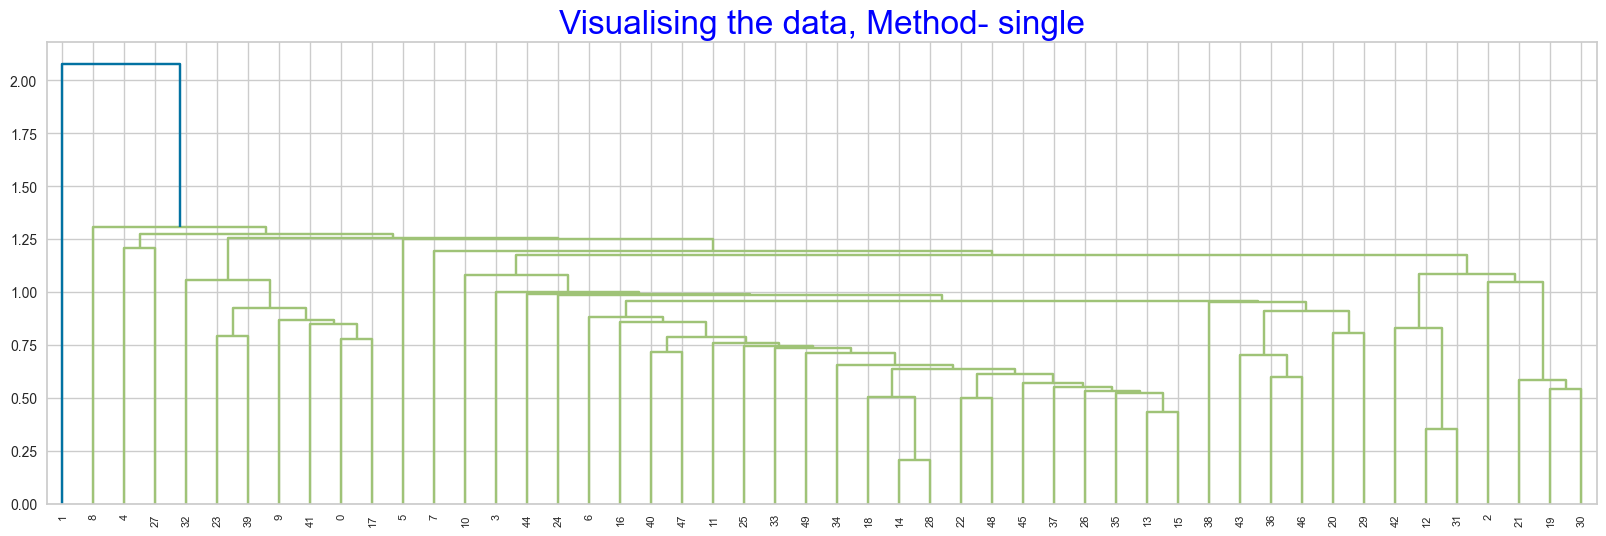

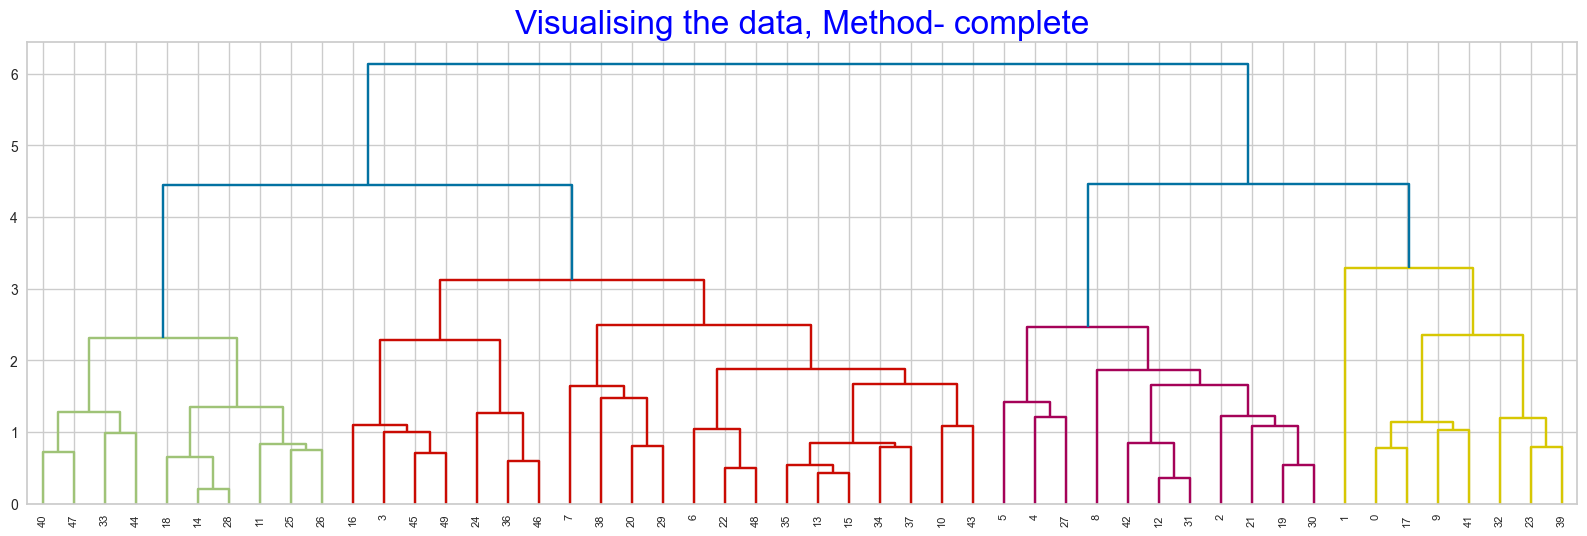

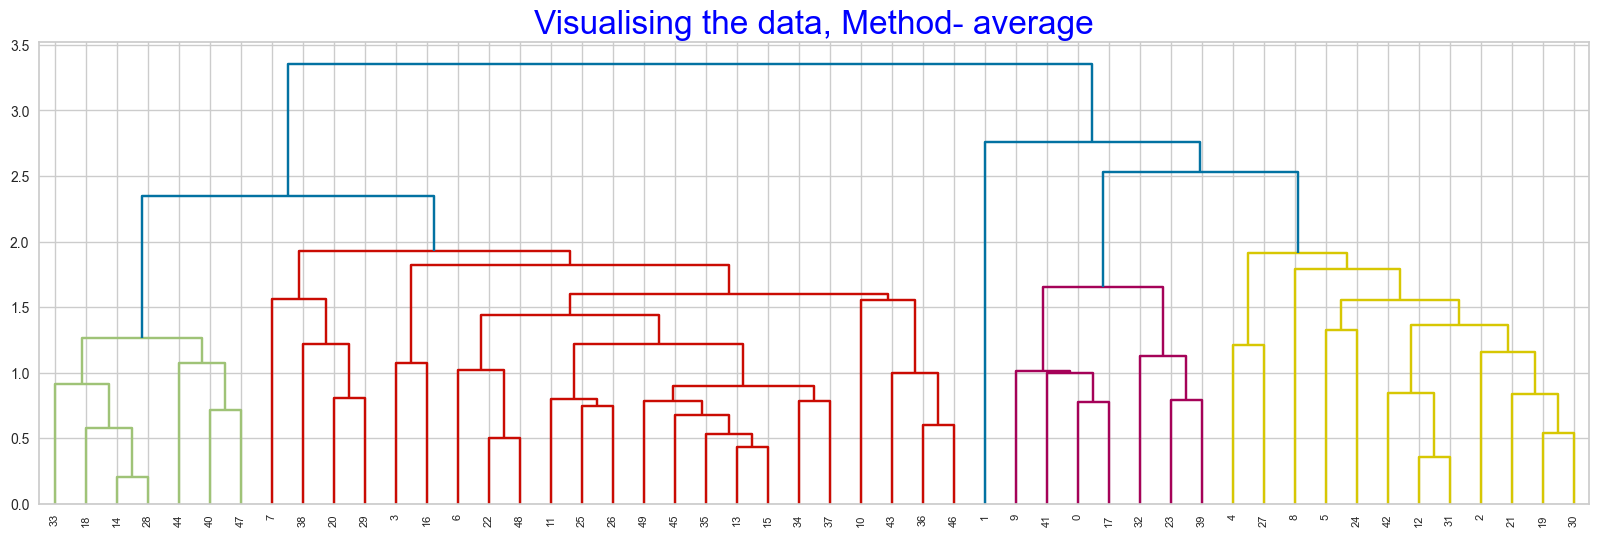

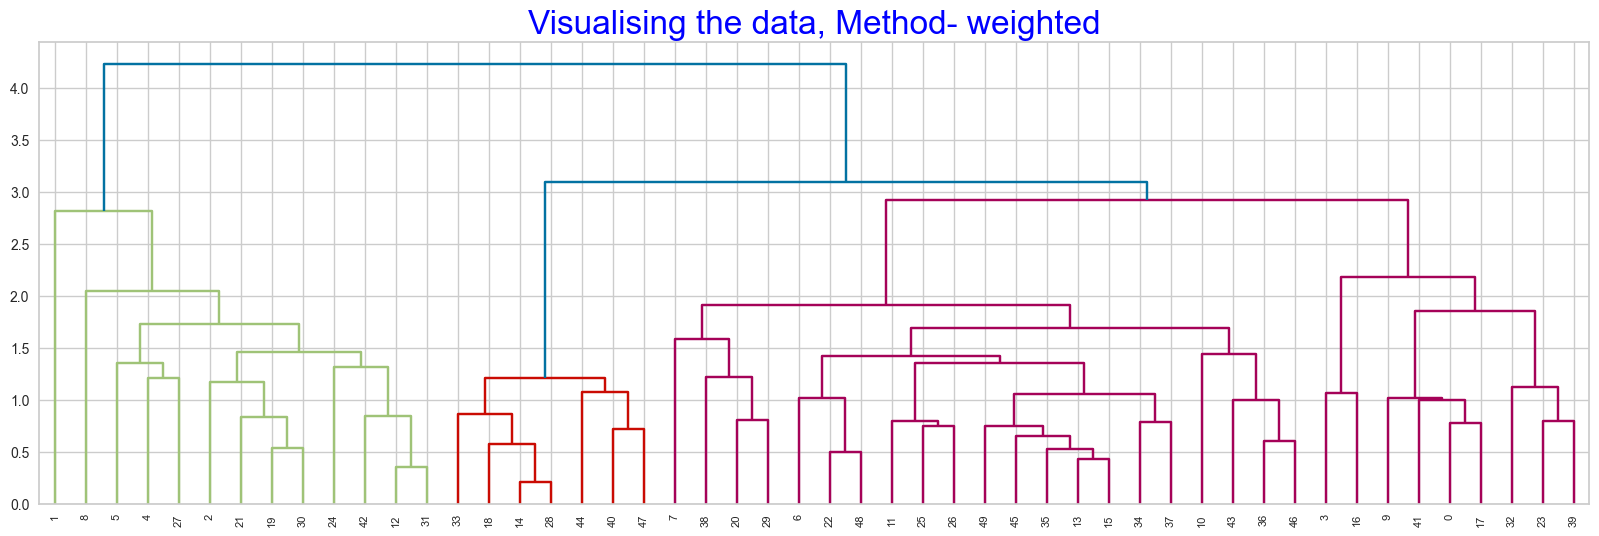

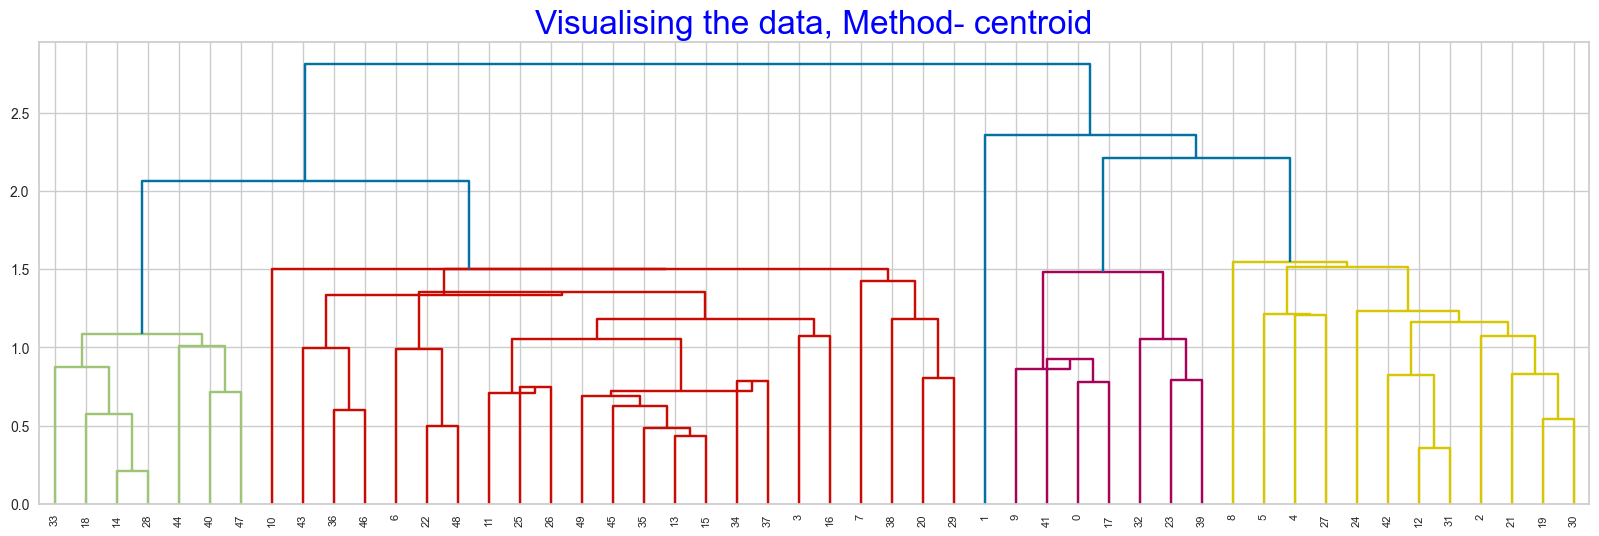

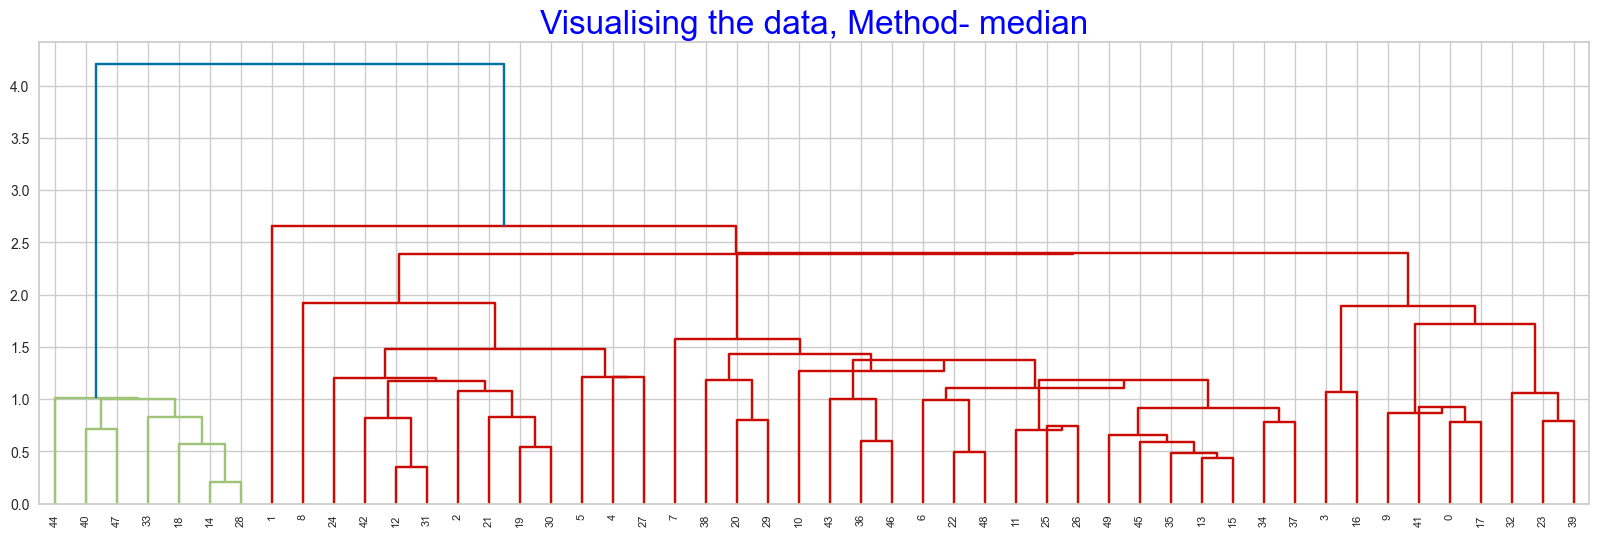

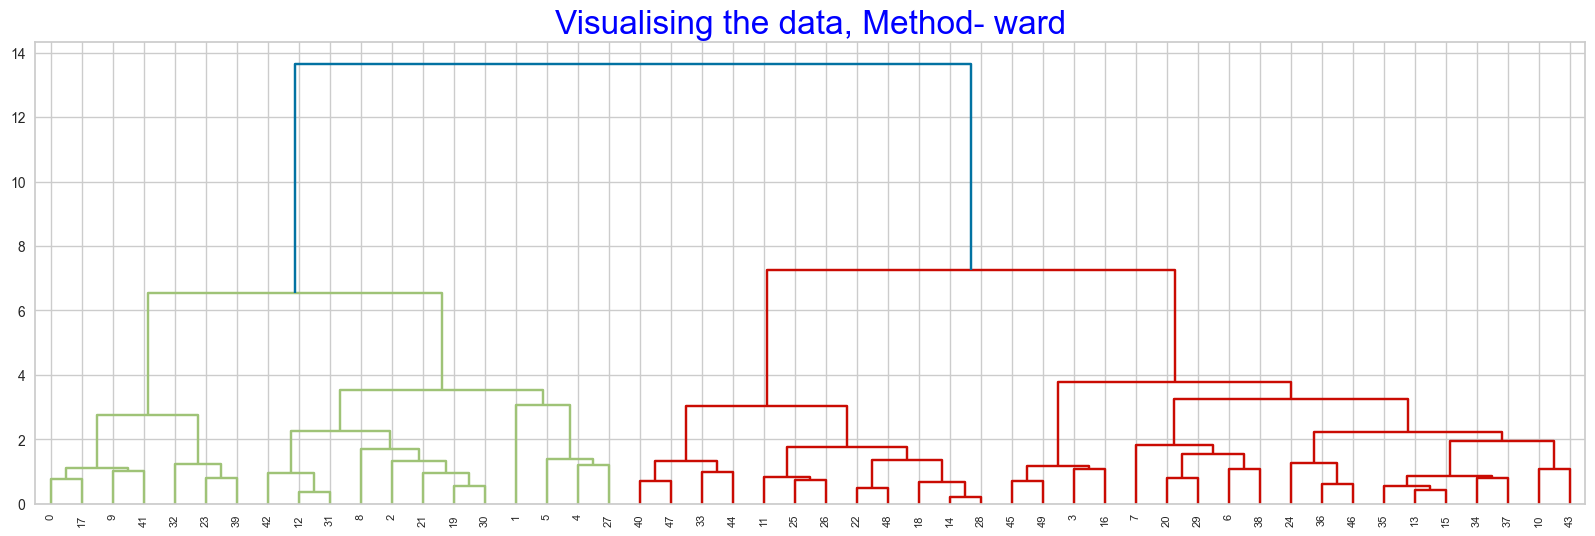

In [155]:
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(std_df, method = methods,optimal_ordering=False))

In [154]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(minmax_df)
        silhouette_score1 = sil(minmax_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- average : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- single : 0.21033337025958487

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.31916915428121284
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.30877213909512063
For n_clusters = 3 The average silhouette_score with linkage- average : 0.35149572430421583
For n_clusters = 3 The average silhouette_score with linkage- single : 0.14223288708185444

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3298707379986785
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.3060729442426308
For n_clusters = 4 The average silhouette_score with linkage- average : 0.36992391140277

__Conclusion:__

Max score is with cluster number 2 in both standard scaler transformation and min max scaler transformation. 

## Run Hierarchical Clustering (Agglomerative Clustering)

In [156]:
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred = agg_clustering.fit_predict(minmax_df)
print(y_pred.shape)
y_pred

(50,)


array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [157]:
agg_clustering.n_clusters_

2

In [158]:
(sil(minmax_df, agg_clustering.labels_)*100).round(3)

42.364

In [159]:
agg_clustering_s = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred_s= agg_clustering_s.fit_predict(std_df)
print(y_pred_s.shape)
y_pred_s

(50,)


array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [170]:
y_pred == y_pred_s

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

so for one sample, the label is different. Well,, it is a very minor difference. So, we'd add only one of these to the dataset

In [171]:
df['Hie_labels'] = agg_clustering.labels_

In [172]:
df.groupby('Hie_labels').agg(['mean'])

Murder     Assault   UrbanPop       Rape Kmeans_label
              mean        mean       mean       mean         mean
Hie_labels                                                       
0            4.870  114.433333  63.633333  15.943333          1.0
1           12.165  255.250000  68.400000  29.165000          0.0

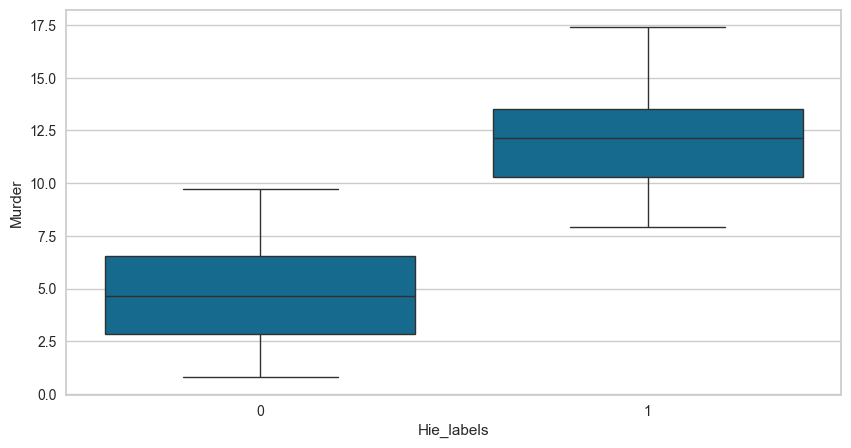

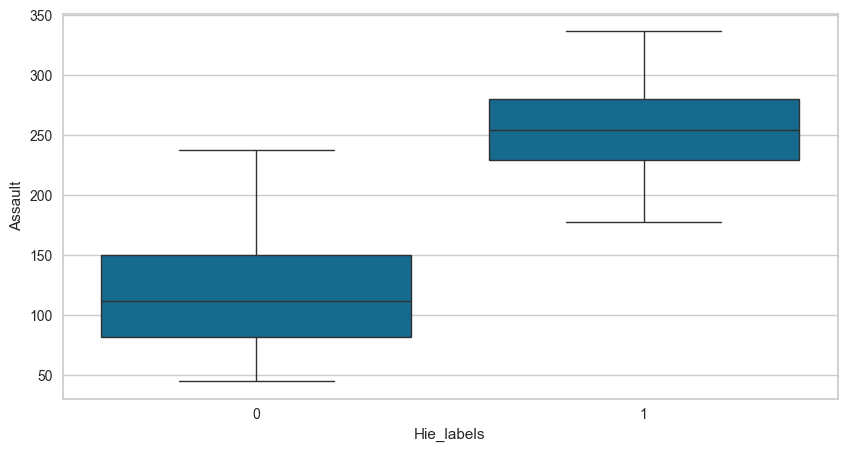

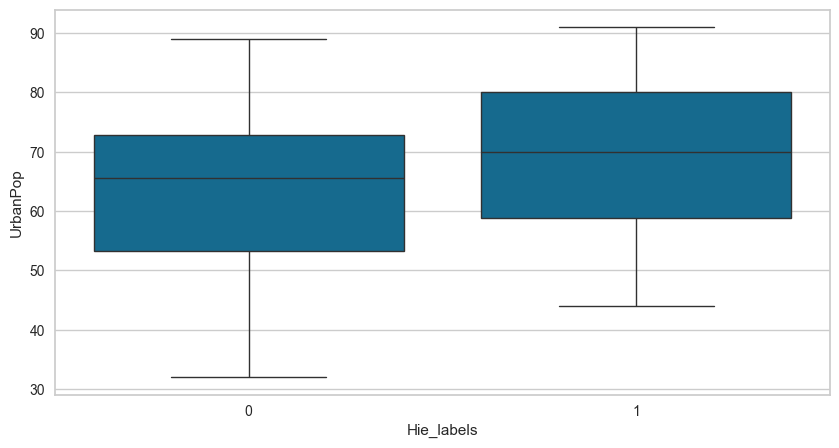

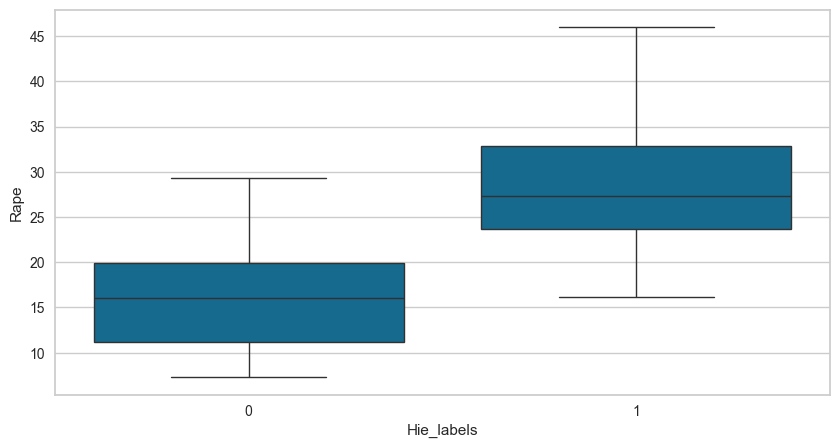

In [175]:
for n in numeric_features:
    plt.figure(figsize = (10,5))
    sns.boxplot(x = 'Hie_labels', y = n , data = df)

__Conclusion:__

The cities in cluster 0 seems to be in the safe zone as compared to the cities in the cluster 1

also, the labeling for the two sets in opposite in the KMeans and Hiearchical clustering. 

# DBSCAN

## DBSCAN of Standard Scaled Data

In [176]:
from itertools import product

In [182]:
eps_values = np.arange(0.25, 2, 0.25)
min_samples = np.arange(1,3)
DBSCAN_params = list(product(eps_values, min_samples))

In [183]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples = p[1]).fit(std_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(sil(std_df, DBS_clustering.labels_))

A heatplot below shows how many clusters were generated by the algorithm for the respective parameters combinations.


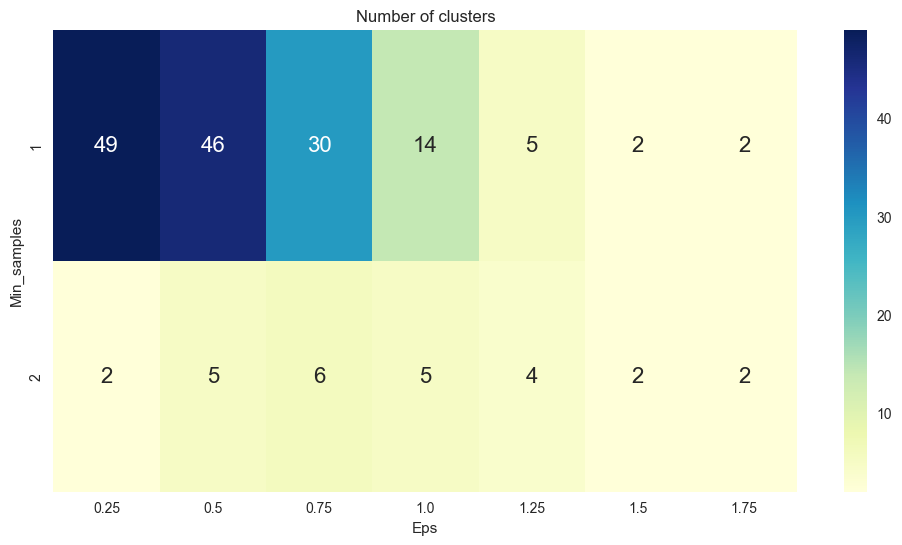

In [184]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns = ['Eps','Min_samples'])
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values = 'No_of_clusters', index = 'Min_samples',columns = 'Eps')

fig, ax = plt.subplots(figsize = (12, 6))
sns.heatmap(pivot_1, annot = True, annot_kws = {'size': 16}, cmap = 'YlGnBu', ax =ax)
ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were generated by the algorithm for the respective parameters combinations.')
plt.show()

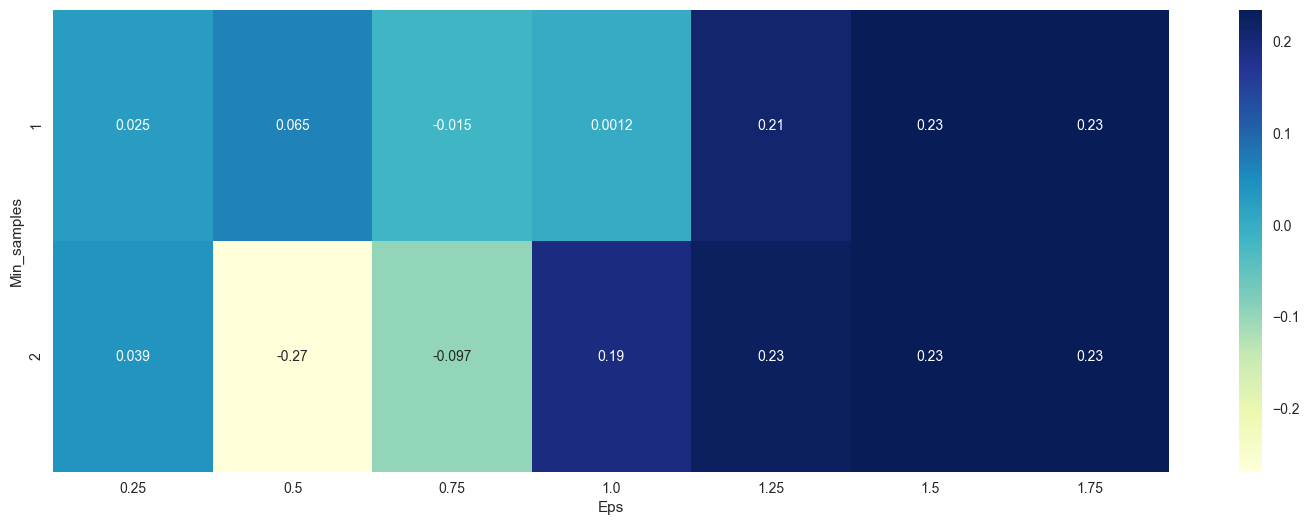

In [186]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns = ['Eps','Min_samples'])
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values = 'Sil_score',index = 'Min_samples', columns = 'Eps')

fig, ax = plt.subplots(figsize = (18, 6))
sns.heatmap(pivot_1, annot = True, annot_kws = {'size': 10}, cmap = 'YlGnBu', ax = ax)
plt.show()

__Global maximum is 0.23 for eps = 1.25 and min_samples = 2__

In [187]:
epsilon = [0.25,0.50,0.75,1,1.25,1.50,1.75,2]
min_samples = [1,2]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(std_df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(std_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 1.5 
min_sample= 1 
number of clusters= 2 
average silhouette score= 0.2346


__Run DBSCAN on standard scaled data with optimal min_sample and epsilon values__

In [188]:
dbscan = DBSCAN(eps = 1.5, min_samples = 1)
dbscan.fit(std_df)

DBSCAN(eps=1.5, min_samples=1)

In [189]:
dbscan.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [190]:
df['DBSCAN_labels'] = dbscan.labels_
df.head()

Murder  Assault  UrbanPop  Rape  Kmeans_label  Hie_labels  \
States                                                                  
Alabama       13.2      236        58  21.2             0           1   
Alaska        10.0      263        48  44.5             0           1   
Arizona        8.1      294        80  31.0             0           1   
Arkansas       8.8      190        50  19.5             1           0   
California     9.0      276        91  40.6             0           1   

            DBSCAN_labels  
States                     
Alabama                 0  
Alaska                  1  
Arizona                 0  
Arkansas                0  
California              0

In [192]:
df.groupby('DBSCAN_labels').agg(['mean'])

Murder     Assault   UrbanPop       Rape Kmeans_label  \
                    mean        mean       mean       mean         mean   
DBSCAN_labels                                                             
0               7.742857  168.877551  65.897959  20.757143     0.612245   
1              10.000000  263.000000  48.000000  44.500000     0.000000   

              Hie_labels  
                    mean  
DBSCAN_labels             
0               0.387755  
1               1.000000

In [193]:
print('Silhouette Coefficient: %0.3f' % sil(std_df, dbscan.labels_))

Silhouette Coefficient: 0.235


## DBSCAN on MinMax Scaled Data

In [217]:
eps_values = np.arange(0.25, 0.75, 0.25)
min_samples = np.arange(1,3)
DBSCAN_params = list(product(eps_values, min_samples))

In [221]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples = p[1]).fit(minmax_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(sil(minmax_df, DBS_clustering.labels_))

A heatplot below shows how many clusters were generated by the algorithm for the respective parameters combinations.


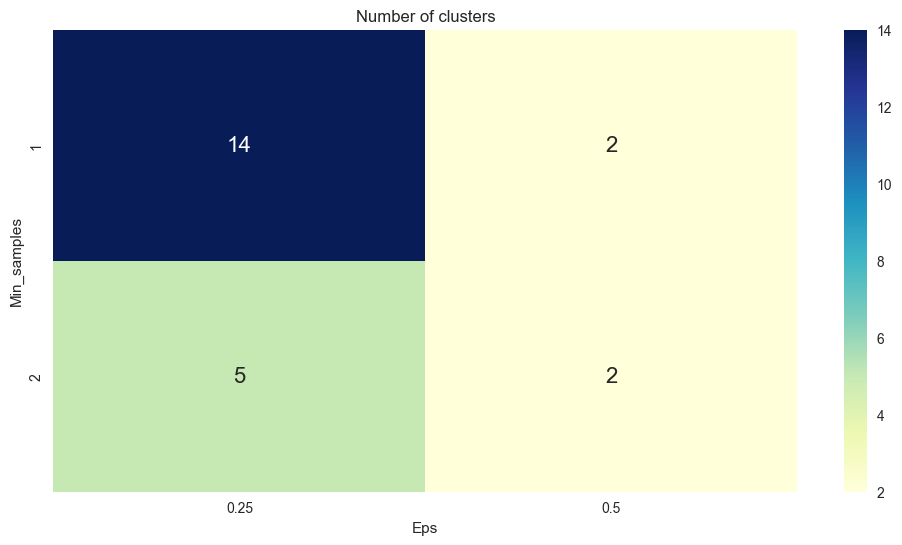

In [222]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns = ['Eps','Min_samples'])
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values = 'No_of_clusters', index = 'Min_samples',columns = 'Eps')

fig, ax = plt.subplots(figsize = (12, 6))
sns.heatmap(pivot_1, annot = True, annot_kws = {'size': 16}, cmap = 'YlGnBu', ax =ax)
ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were generated by the algorithm for the respective parameters combinations.')
plt.show()

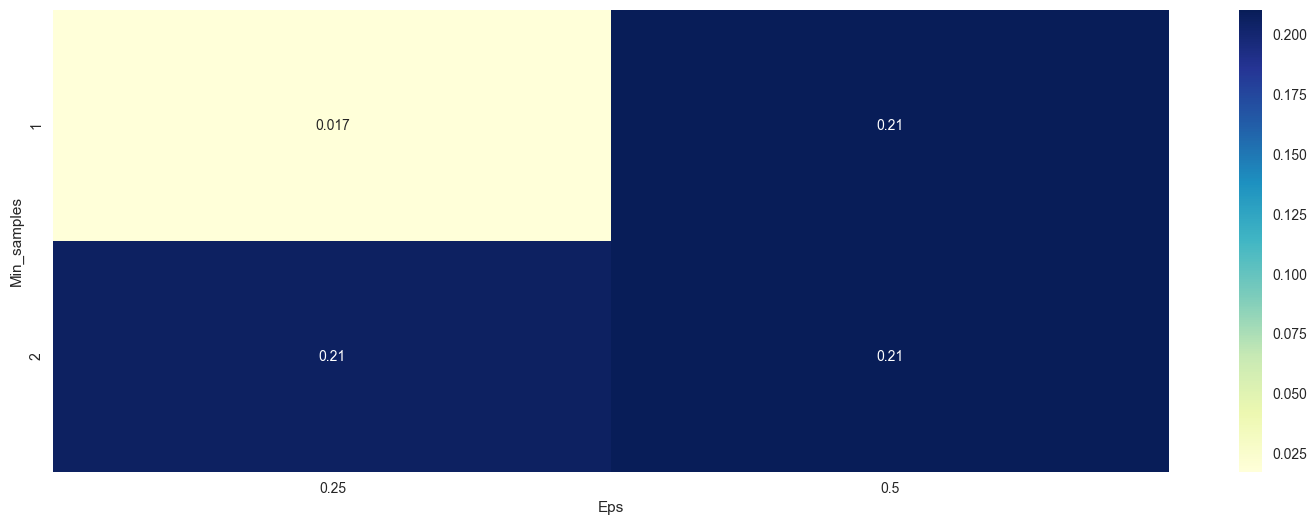

In [223]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns = ['Eps','Min_samples'])
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values = 'Sil_score',index = 'Min_samples', columns = 'Eps')

fig, ax = plt.subplots(figsize = (18, 6))
sns.heatmap(pivot_1, annot = True, annot_kws = {'size': 10}, cmap = 'YlGnBu', ax = ax)
plt.show()

__Global maximum is 0.21 for eps = 0.5 and min_samples =2__

In [224]:
epsilon = [0.25,0.5]
min_samples = [1,2]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(minmax_df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(minmax_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 0.5 
min_sample= 1 
number of clusters= 2 
average silhouette score= 0.2103


__Run DBSCAN on the MinMax Scaled data with the optimal min_sample and epsilon values__

In [225]:
dbscan = DBSCAN(eps = 0.5, min_samples = 1)
dbscan.fit(minmax_df)

DBSCAN(min_samples=1)

In [226]:
dbscan.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [227]:
df['DBSCAN_labels_'] = dbscan.labels_
df.head()

Murder  Assault  UrbanPop  Rape  Kmeans_label  Hie_labels  \
States                                                                  
Alabama       13.2      236        58  21.2             0           1   
Alaska        10.0      263        48  44.5             0           1   
Arizona        8.1      294        80  31.0             0           1   
Arkansas       8.8      190        50  19.5             1           0   
California     9.0      276        91  40.6             0           1   

            DBSCAN_labels  DBSCAN_labels_  
States                                     
Alabama                 0               0  
Alaska                  1               1  
Arizona                 0               0  
Arkansas                0               0  
California              0               0

In [228]:
df.groupby('DBSCAN_labels').agg(['mean'])

Murder     Assault   UrbanPop       Rape Kmeans_label  \
                    mean        mean       mean       mean         mean   
DBSCAN_labels                                                             
0               7.742857  168.877551  65.897959  20.757143     0.612245   
1              10.000000  263.000000  48.000000  44.500000     0.000000   

              Hie_labels DBSCAN_labels_  
                    mean           mean  
DBSCAN_labels                            
0               0.387755            0.0  
1               1.000000            1.0

In [234]:
[df['DBSCAN_labels']==df['DBSCAN_labels_']]

[States
 Alabama           True
 Alaska            True
 Arizona           True
 Arkansas          True
 California        True
 Colorado          True
 Connecticut       True
 Delaware          True
 Florida           True
 Georgia           True
 Hawaii            True
 Idaho             True
 Illinois          True
 Indiana           True
 Iowa              True
 Kansas            True
 Kentucky          True
 Louisiana         True
 Maine             True
 Maryland          True
 Massachusetts     True
 Michigan          True
 Minnesota         True
 Mississippi       True
 Missouri          True
 Montana           True
 Nebraska          True
 Nevada            True
 New Hampshire     True
 New Jersey        True
 New Mexico        True
 New York          True
 North Carolina    True
 North Dakota      True
 Ohio              True
 Oklahoma          True
 Oregon            True
 Pennsylvania      True
 Rhode Island      True
 South Carolina    True
 South Dakota      True
 Tenness

Therefore, we can keep only one of the DBSCAN result's for the final analysis.

In [235]:
df.drop('DBSCAN_labels_', axis = 1, inplace = True)

In [236]:
df.head()

Murder  Assault  UrbanPop  Rape  Kmeans_label  Hie_labels  \
States                                                                  
Alabama       13.2      236        58  21.2             0           1   
Alaska        10.0      263        48  44.5             0           1   
Arizona        8.1      294        80  31.0             0           1   
Arkansas       8.8      190        50  19.5             1           0   
California     9.0      276        91  40.6             0           1   

            DBSCAN_labels  
States                     
Alabama                 0  
Alaska                  1  
Arizona                 0  
Arkansas                0  
California              0

In [241]:
df[df['DBSCAN_labels'] ==1]

Murder  Assault  UrbanPop  Rape  Kmeans_label  Hie_labels  \
States                                                              
Alaska    10.0      263        48  44.5             0           1   

        DBSCAN_labels  
States                 
Alaska              1

So, in one cluster there is 1 entry and in the other cluster there is all the remaining 49 enteries!

So, we can say that DBSCAN performed poorly on the crime_data. 

Also, if we look closely at the KMeans and Hierarchical labels then they shows more or less the same results. It's just that their labeling is opposite. 

In [242]:
df

Murder  Assault  UrbanPop  Rape  Kmeans_label  Hie_labels  \
States                                                                      
Alabama           13.2      236        58  21.2             0           1   
Alaska            10.0      263        48  44.5             0           1   
Arizona            8.1      294        80  31.0             0           1   
Arkansas           8.8      190        50  19.5             1           0   
California         9.0      276        91  40.6             0           1   
Colorado           7.9      204        78  38.7             0           1   
Connecticut        3.3      110        77  11.1             1           0   
Delaware           5.9      238        72  15.8             1           0   
Florida           15.4      335        80  31.9             0           1   
Georgia           17.4      211        60  25.8             0           1   
Hawaii             5.3       46        83  20.2             1           0   
Idaho              2.6      120        54  14.2             1           0   
Illinois          10.4      249        83  24.0             0           1   
Indiana            7.2      113        65  21.0             1           0   
Iowa               2.2       56        57  11.3             1           0   
Kansas             6.0      115        66  18.0             1           0   
Kentucky           9.7      109        52  16.3             1           0   
Louisiana         15.4      249        66  22.2             0           1   
Maine              2.1       83        51   7.8             1           0   
Maryland          11.3      300        67  27.8             0           1   
Massachusetts      4.4      149        85  16.3             1           0   
Michigan          12.1      255        74  35.1             0           1   
Minnesota          2.7       72        66  14.9             1           0   
Mississippi       16.1      259        44  17.1             0           1   
Missouri           9.0      178        70  28.2             0           1   
Montana            6.0      109        53  16.4             1           0   
Nebraska           4.3      102        62  16.5             1           0   
Nevada            12.2      252        81  46.0             0           1   
New Hampshire      2.1       57        56   9.5             1           0   
New Jersey         7.4      159        89  18.8             1           0   
New Mexico        11.4      285        70  32.1             0           1   
New York          11.1      254        86  26.1             0           1   
North Carolina    13.0      337        45  16.1             0           1   
North Dakota       0.8       45        44   7.3             1           0   
Ohio               7.3      120        75  21.4             1           0   
Oklahoma           6.6      151        68  20.0             1           0   
Oregon             4.9      159        67  29.3             1           0   
Pennsylvania       6.3      106        72  14.9             1           0   
Rhode Island       3.4      174        87   8.3             1           0   
South Carolina    14.4      279        48  22.5             0           1   
South Dakota       3.8       86        45  12.8             1           0   
Tennessee         13.2      188        59  26.9             0           1   
Texas             12.7      201        80  25.5             0           1   
Utah               3.2      120        80  22.9             1           0   
Vermont            2.2       48        32  11.2             1           0   
Virginia           8.5      156        63  20.7             1           0   
Washington         4.0      145        73  26.2             1           0   
West Virginia      5.7       81        39   9.3             1           0   
Wisconsin          2.6       53        66  10.8             1           0   
Wyoming            6.8      161        60  15.6             1           0   

           

__To analysis the final outcomes of the result we'd take either of the KMeans or Hierarchial clustering result and do the analysis.__

# Final Analysis

In [243]:
df_final = df.drop('DBSCAN_labels',  axis = 1).copy()

In [244]:
df_final.head()

Murder  Assault  UrbanPop  Rape  Kmeans_label  Hie_labels
States                                                               
Alabama       13.2      236        58  21.2             0           1
Alaska        10.0      263        48  44.5             0           1
Arizona        8.1      294        80  31.0             0           1
Arkansas       8.8      190        50  19.5             1           0
California     9.0      276        91  40.6             0           1

In [245]:
# Sorting elements based on cluster label assigned and taking average for insights.

cluster1 = pd.DataFrame(df_final.loc[df_final.Kmeans_label==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(df_final.loc[df_final.Kmeans_label==1].mean(),columns= ['Cluster2_avg'])

In [246]:
avg_df = pd.concat([cluster1, cluster2], axis = 1)
avg_df

Cluster1_avg  Cluster2_avg
Murder              12.165      4.870000
Assault            255.250    114.433333
UrbanPop            68.400     63.633333
Rape                29.165     15.943333
Kmeans_label         0.000      1.000000
Hie_labels           1.000      0.000000

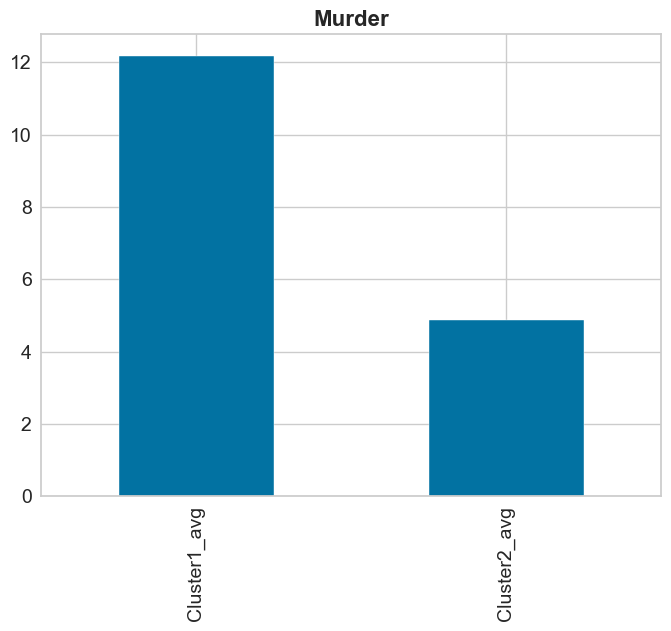

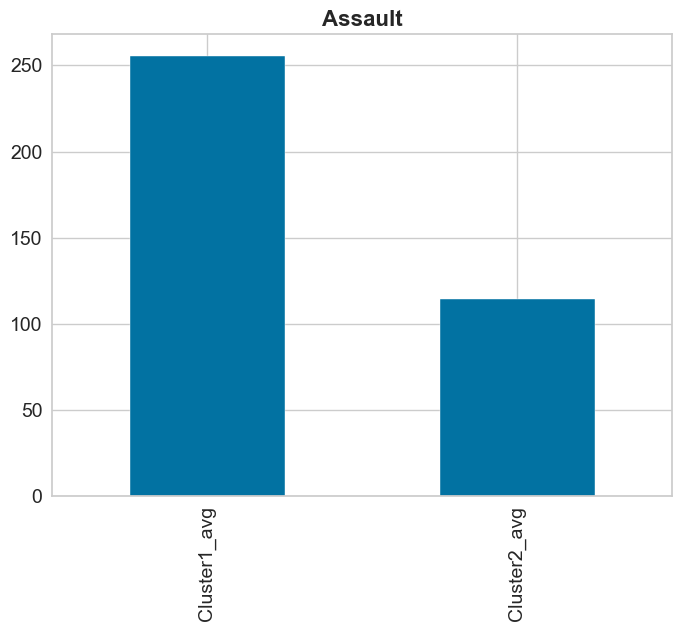

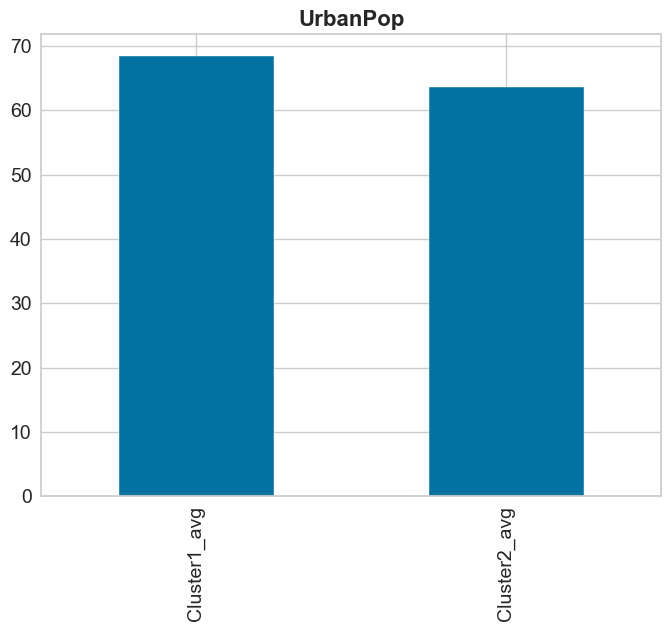

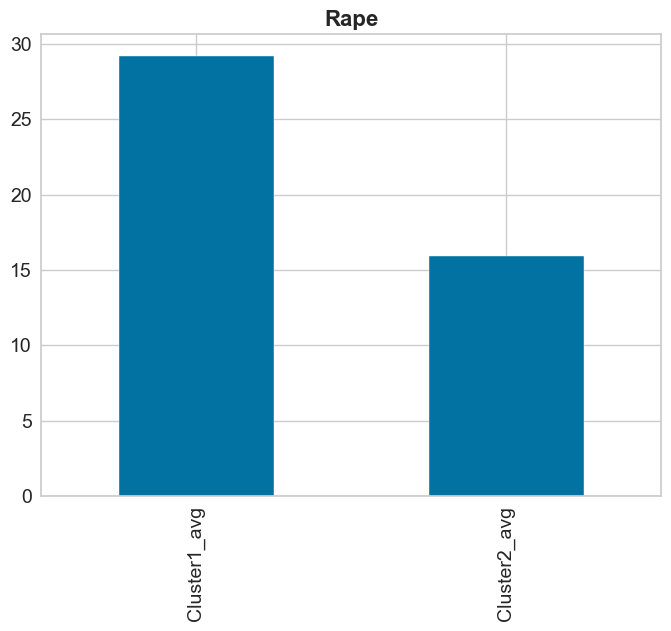

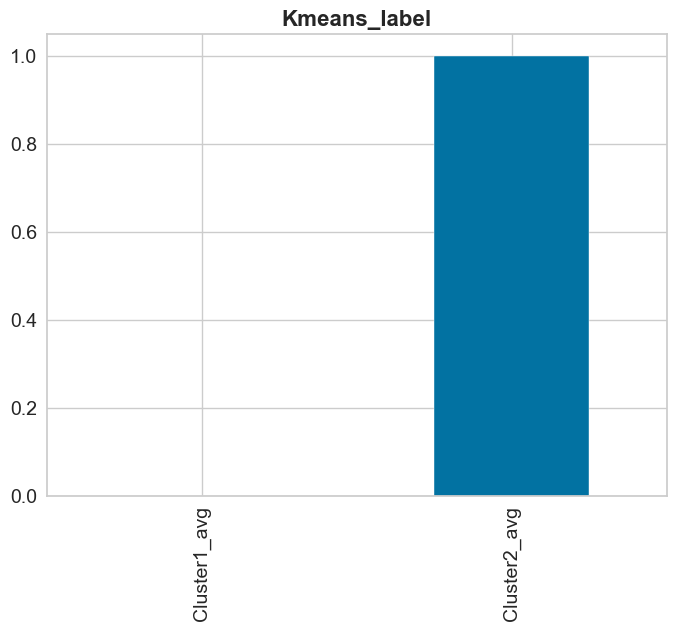

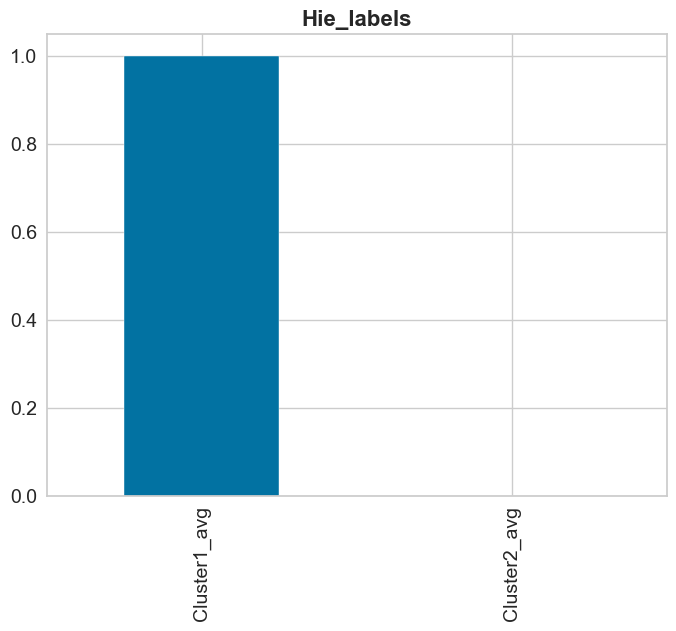

In [247]:
for i, row in avg_df.iterrows():
    fig = plt.subplots(figsize = (8,6))
    j = avg_df.xs(i, axis = 0)
    plt.title(i, fontsize = 16, fontweight = 'bold')
    j.plot(kind = 'bar', fontsize = 14)
    plt.show()
    print()

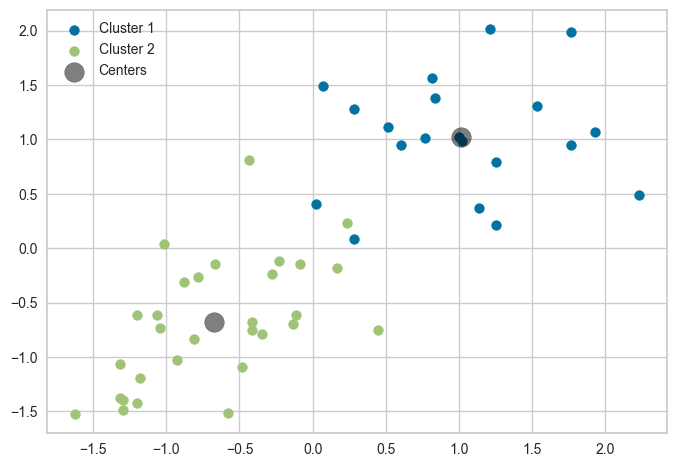

In [257]:
# KMeans clustering
model = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_pred = model.fit_predict(std_df)

# Scatter plot for Cluster 1
plt.scatter(std_df[y_pred == 0, 0], std_df[y_pred == 0, 1], label='Cluster 1', s=50, cmap='viridis')

# Scatter plot for Cluster 2
plt.scatter(std_df[y_pred == 1, 0], std_df[y_pred == 1, 1], label='Cluster 2', s=50, cmap='viridis')

# Plot cluster centers
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5, label='Centers')

# Add legend
plt.legend()
plt.show()


# Conclusion

States in the cluster1 have high crime rate and states in the cluster2 have low crime rate. 

That means that it is safer to stay in the cluster2 states, as compared to cluster1 states. This brings upon the need to tighten up security in the cluster1 states. 

In [262]:
data['Kmeans_label'] = model.labels_

In [263]:
data.head()

States  Murder  Assault  UrbanPop  Rape  Kmeans_label
0     Alabama    13.2      236        58  21.2             0
1      Alaska    10.0      263        48  44.5             0
2     Arizona     8.1      294        80  31.0             0
3    Arkansas     8.8      190        50  19.5             1
4  California     9.0      276        91  40.6             0

In [267]:
c1 = pd.DataFrame(data.States.loc[data.Kmeans_label == 0])
c2 = pd.DataFrame(data.States.loc[data.Kmeans_label == 1])

In [278]:
c1 # states at high risk

States
0          Alabama
1           Alaska
2          Arizona
4       California
5         Colorado
8          Florida
9          Georgia
12        Illinois
17       Louisiana
19        Maryland
21        Michigan
23     Mississippi
24        Missouri
27          Nevada
30      New Mexico
31        New York
32  North Carolina
39  South Carolina
41       Tennessee
42           Texas

In [279]:
c2 #states at low risk

States
3        Arkansas
6     Connecticut
7        Delaware
10         Hawaii
11          Idaho
13        Indiana
14           Iowa
15         Kansas
16       Kentucky
18          Maine
20  Massachusetts
22      Minnesota
25        Montana
26       Nebraska
28  New Hampshire
29     New Jersey
33   North Dakota
34           Ohio
35       Oklahoma
36         Oregon
37   Pennsylvania
38   Rhode Island
40   South Dakota
43           Utah
44        Vermont
45       Virginia
46     Washington
47  West Virginia
48      Wisconsin
49        Wyoming

__End of assignment__